FIRST OF ALL, you need a APIKEY from [website](https://www.alphavantage.co/support/#api-key) \\
so anywhere it appears *YOURKEY*-replace it with your key value, then it works.

In [ ]:
import fix_yahoo_finance
from pandas_datareader import data as web
import pandas as pd

In [ ]:
import numpy as np
import pandas as pd
from pandas_datareader import data as web
import fix_yahoo_finance
import random
from scipy import stats
from functools import reduce
from operator import mul
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
import math
from datetime import datetime
! pip install quandl
import quandl
from collections import defaultdict
import csv
from IPython.display import display

# to download csv preprocessed files later
from IPython.display import HTML
pointer = 0
def create_download_link(title = "Download CSV file", filename = "data.csv"):
    html = '<a href={filename}>{title}</a>'
    html = html.format(title=title,filename=filename)
    return HTML(html)

In [ ]:
####################################################
#      A. data preprocessed by investing.com       #
####################################################

##############################
#   1. Check data's format   #
##############################
# > 91 stocks were selected related to technology, along with 8 criteria: "Market Cap","P/E Ratio","Revenue","Average Vol. (3m)","EPS","Beta","Dividend","Yield"
# > However the parsing wasn't accurate and led to the following .csv data file which needs to be preprocessed

stocks = pd.read_csv("fundamental.csv", delimiter=',')
# to be able to see the whole names
pd.set_option('display.max_colwidth', -1)
# to check the 5 columns
stocks.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  del sys.path[0]


Name,"Market Cap","P/E Ratio","Revenue","Average Vol. (3m)","EPS","Beta","Dividend","Yield"
0  Apple,"912.44B","17.01","258.49B","29.29M","11.67","1.23","3.08","1.55%"                  
1  Microsoft,"1.03","30.14","122.21B","23.69M","4.48","1.23","1.84","1.36%"                  
2  Intel,"213.24B","10.86","70.84B","23.77M","4.36","0.83","1.26","2.66%"                    
3  Cisco,"240.92B","20.47","51.32B","20.06M","2.74","1.19","1.40","2.50%"                    
4  Broadcom,"110.29B","33.95","21.31B","2.79M","8.19","0.91","10.60","3.81%"

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
########################################################################################
#   2. Preprocess csv files & Combine fundamental, technical and performance analysis  #
########################################################################################
# Step 1: For all 91 stocks extract the criteria results.
fundamental = open("fundamental.csv",mode= 'r')
fundamental = csv.reader(fundamental, delimiter=',')
fields_fundamenttal = next(fundamental)[0].split(',')

performance = open("performance.csv",mode= 'r')
performance = csv.reader(performance, delimiter=',')
fields_performance = next(performance)[0].split(',')

technical = open("technical.csv",mode= 'r')
technical = csv.reader(technical, delimiter=',')
technical_dic = {"Strong Sell": 0, "Sell": 1, "Neutral": 2, "Buy": 3, "Strong Buy": 4}
fields_technical = next(technical)[0].split(',')


# Step 2: Choose the criteria necessary for our analysis
# > choose performance criteria: YTD, 1 Year, 3 Year
# > choosse technical criteria: Weekly, Monthly
fields = fields_fundamenttal + fields_performance[-3:] + fields_technical[-2:]
fields = [fields[0]] + [i[1:-1] for i in fields[1:]]


# Step 3: parse simutanously all the stocks, keep the criteria results necessary,
# combine them, and create a new whole analysis stock csv with all the criteria
# combined

stocksCSV = open("stocks.csv", mode= 'w')
stocksCSV = csv.DictWriter(stocksCSV, fieldnames = fields)
stocksCSV.writeheader()

for f, p, t in zip(fundamental, performance, technical):
  ##################### FUNDAMENTAL #####################
  f = f[0].split(",")
  stock_name = f[0]
  f = [i[1:-1] for i in f[1:]]

  # edit 'Market Cap'
  if f[0][-1] == "B":
    f[0] = float(f[0][:-1]) * 10**9
  elif f[0][-1] == "M":
    f[0] = float(f[0][:-1]) * 10**6
  elif f[0][-1] == "K":
    f[0] = float(f[0][:-1]) * 10**3
  else :
    f[0] = float(f[0][:-1]) * 10**12

  # edit 'Revenue'
  if f[2][-1] == "B":
    f[2] = float(f[2][:-1]) * 10**9
  elif f[2][-1] == "M":
    f[2] = float(f[2][:-1]) * 10**6
  elif row[2][-1] == "K":
    f[2] = float(f[2][:-1]) * 10**3
  else :
    f[2] = float(f[2][:-1])

  # edit 'Average Vol.'
  if f[3][-1] == "M":
    f[3] = float(f[3][:-1]) * 10**6
  elif f[3][-1] == "K":
    f[3] = float(f[3][:-1]) * 10**3
  else :
    f[3] = float(f[3][:-1])

  # edit 'Yield' : convert percentage to decia
  f[-1] = float(f[-1][:-1]) / 10

  # edit rest fields as floats
  f = list(map(float, f))


  ##################### PERFORMANCE #####################
  p = p[0].split(",")
  p = [i[1:-1] for i in p[4:]]
  p = list(map(float, p))

  ##################### TECHNICAL #####################
  t = t[0].split(",")
  t = [i[1:-1] for i in t[4:]]
  t = [technical_dic[i] for i in t]

  row_values = [stock_name] + f + p + t
  row_dic = {}

  for i in range(len(row_values)):
    row_dic[fields[i]] = row_values[i]

  stocksCSV.writerow(row_dic)



#new

In [ ]:
import pandas as pd
fields_fundamenttal = pd.read_csv("fundamental.csv")
fields_performance = pd.read_csv("performance.csv")
fields_technical = pd.read_csv("technical.csv")
technical_dic = {"Strong Sell": 0, "Sell": 1, "Neutral": 2, "Buy": 3, "Strong Buy": 4}


In [ ]:
fields_technical.drop(columns='Unnamed: 9', inplace= True)
fields_performance.drop(columns=['Unnamed: 9','Unnamed: 8' ], inplace= True)
fields_performance

In [ ]:
fields_technical.iloc[:,-2:]

In [ ]:
frames = [fields_fundamenttal.iloc[:,:-2], fields_performance.iloc[:,-3:], fields_technical.iloc[:,-2:]]
result = pd.concat(frames, axis=1)
print(result.dtypes)
result.head(3)

Name                    object
Symbol                  object
Market Cap              object
Revenue                 object
Average Volume (3m)     object
EPS                    float64
P/E Ratio               object
Beta                   float64
YTD                     object
1 Year                  object
3 Years                 object
Weekly                  object
Monthly                 object
dtype: object


Name  Symbol       Market Cap         Revenue  \
0  Qualcomm Incorporated  QCOM.O  165,660,000,000  36,040,000,000   
1              Tesla Inc  TSLA.O            1.12T  53,820,000,000   
2     NVIDIA Corporation  NVDA.O  669,400,000,000  26,910,000,000   

  Average Volume (3m)   EPS P/E Ratio  Beta      YTD  1 Year   3 Years  \
0          11,174,558  8.73     17.51  1.20  -19.62%   6.68%   153.04%   
1          26,651,773  4.92    218.95  2.08    2.63%  63.90%  1796.80%   
2          52,702,837  3.85     70.96  1.42   -9.18%  93.40%   483.87%   

        Weekly     Monthly  
0  Strong Sell         Buy  
1   Strong Buy  Strong Buy  
2   Strong Buy  Strong Buy

In [ ]:
# result.iloc[30]
result.drop([30], axis=0, inplace=True)
result.head(35)

Name  Symbol       Market Cap  \
0                  Qualcomm Incorporated  QCOM.O  165,660,000,000   
1                              Tesla Inc  TSLA.O            1.12T   
2                     NVIDIA Corporation  NVDA.O  669,400,000,000   
3        Taitron Components Incorporated  TAIT.O       22,640,000   
4                      Intel Corporation  INTC.O  196,710,000,000   
5                         AudioCodes Ltd  AUDC.O      823,500,000   
6                      Universal Display  OLED.O    8,120,000,000   
7                      Cisco Systems Inc  CSCO.O  231,220,000,000   
8                  Microsoft Corporation  MSFT.O            2.32T   
9                              Apple Inc  AAPL.O            2.84T   
10                         AstroNova Inc  ALOT.O      109,640,000   
11                            Garmin Ltd  GRMN.K   22,410,000,000   
12                     Elbit Systems Ltd  ESLT.O    9,740,000,000   
13        Texas Instruments Incorporated   TXN.O  168,040,000,000   
14                           Equinix Inc  EQIX.O   69,220,000,000   
15                              CDW Corp   CDW.O   23,990,000,000   
16                          Broadcom Inc  AVGO.O  255,980,000,000   
17                            Intuit Inc  INTU.O  136,860,000,000   
18  Sapiens International Corporation NV  SPNS.O    1,420,000,000   
19                    Bruker Corporation  BRKR.O    9,800,000,000   
20                      InterDigital Inc  IDCC.O    1,980,000,000   
21                          MIND CTI Ltd  MNDO.O       58,760,000   
22                              Ebix Inc  EBIX.O    1,020,000,000   
23          Wayside Technology Group Inc  WSTG.O      147,540,000   
24               CDK Global Holdings LLC   CDK.O    5,730,000,000   
25           Western Digital Corporation   WDC.O   15,140,000,000   
26               Activision Blizzard Inc  ATVI.O   63,110,000,000   
27                   MKS Instruments Inc  MKSI.O    7,840,000,000   
28                          Teradyne Inc   TER.O   18,900,000,000   
29                    Analog Devices Inc   ADI.O   86,540,000,000   
31                                 Magic  MGIC.O      859,760,000   
32             Logitech International SA  LOGI.O   11,880,000,000   
33    Asia Pacific Wire & Cable Corp Ltd  APWC.O       37,320,000   
34                Skyworks Solutions Inc  SWKS.O   21,350,000,000   

            Revenue Average Volume (3m)    EPS P/E Ratio  Beta      YTD  \
0    36,040,000,000          11,174,558   8.73     17.51  1.20  -19.62%   
1    53,820,000,000          26,651,773   4.92    218.95  2.08    2.63%   
2    26,910,000,000          52,702,837   3.85     70.96  1.42   -9.18%   
3         8,300,000              25,981   0.39        10  1.33   -4.22%   
4    79,020,000,000          39,732,309   4.86      10.2  0.55   -6.58%   
5       248,930,000             128,310   1.00     25.65  0.58  -27.06%   
6       553,530,000             439,057   3.87     43.19  1.32    1.43%   
7    51,550,000,000          22,215,344   2.80     19.94  0.94  -12.17%   
8   184,900,000,000          37,557,052   9.40      32.8  0.90   -8.00%   
9   378,320,000,000          93,292,683   6.02     28.99  1.18   -1.84%   
10      117,220,000               8,024   1.10     13.84  0.72   11.93%   
11    4,980,000,000           1,316,465   5.61     21.16  1.03  -14.73%   
12    5,160,000,000              51,816   7.55     29.18  0.79   26.33%   
13   18,340,000,000           6,273,342   8.26      22.2  0.95   -3.39%   
14    6,640,000,000             467,181   5.54    133.97  0.46   -9.79%   
15   20,820,000,000             912,111   7.03     25.43  1.10  -13.18%   
16   28,500,000,000           2,583,586  17.55     35.87  1.03   -5.78%   
17   11,410,000,000           1,957,868   7.84     61.35  1.10  -24.76%   
18      461,030,000              79,800   0.85     29.92  1.37  -24.79%   
19    2,420,000,000             817,105   1.81     35.47  1.23  -22.55%   
20      404,380,000             144,313   1.0

In [ ]:
def remove_persent_sym(dataframe, cols):
   for col in cols:
     print(col)
     dataframe[col]= dataframe[col].map(lambda x: x[:-1]).astype(float)
   return dataframe

In [ ]:
pert_cols = ['YTD', '1 Year', '3 Years']
result1 = remove_persent_sym(result, pert_cols)
result1.head(3)

YTD
1 Year
3 Years


Name  Symbol       Market Cap         Revenue  \
0  Qualcomm Incorporated  QCOM.O  165,660,000,000  36,040,000,000   
1              Tesla Inc  TSLA.O            1.12T  53,820,000,000   
2     NVIDIA Corporation  NVDA.O  669,400,000,000  26,910,000,000   

  Average Volume (3m)   EPS P/E Ratio  Beta    YTD  1 Year  3 Years  \
0          11,174,558  8.73     17.51  1.20 -19.62    6.68   153.04   
1          26,651,773  4.92    218.95  2.08   2.63   63.90  1796.80   
2          52,702,837  3.85     70.96  1.42  -9.18   93.40   483.87   

        Weekly     Monthly  
0  Strong Sell         Buy  
1   Strong Buy  Strong Buy  
2   Strong Buy  Strong Buy

In [ ]:
result1 =result1.replace({'Market Cap': r'T'}, {'Market Cap': '0,000,000,000'}, regex=True)
result1 =result1.replace({'Market Cap': r'\.'}, {'Market Cap': ','}, regex=True)
result1.head(3)

Name  Symbol         Market Cap         Revenue  \
0  Qualcomm Incorporated  QCOM.O    165,660,000,000  36,040,000,000   
1              Tesla Inc  TSLA.O  1,120,000,000,000  53,820,000,000   
2     NVIDIA Corporation  NVDA.O    669,400,000,000  26,910,000,000   

  Average Volume (3m)   EPS P/E Ratio  Beta    YTD  1 Year  3 Years  \
0          11,174,558  8.73     17.51  1.20 -19.62    6.68   153.04   
1          26,651,773  4.92    218.95  2.08   2.63   63.90  1796.80   
2          52,702,837  3.85     70.96  1.42  -9.18   93.40   483.87   

        Weekly     Monthly  
0  Strong Sell         Buy  
1   Strong Buy  Strong Buy  
2   Strong Buy  Strong Buy

In [ ]:
result1['Market Cap'] = result1['Market Cap'].apply(lambda x: float(x.split()[0].replace(',', '')))
result1.head(3)

Name  Symbol    Market Cap         Revenue  \
0  Qualcomm Incorporated  QCOM.O  1.656600e+11  36,040,000,000   
1              Tesla Inc  TSLA.O  1.120000e+12  53,820,000,000   
2     NVIDIA Corporation  NVDA.O  6.694000e+11  26,910,000,000   

  Average Volume (3m)   EPS P/E Ratio  Beta    YTD  1 Year  3 Years  \
0          11,174,558  8.73     17.51  1.20 -19.62    6.68   153.04   
1          26,651,773  4.92    218.95  2.08   2.63   63.90  1796.80   
2          52,702,837  3.85     70.96  1.42  -9.18   93.40   483.87   

        Weekly     Monthly  
0  Strong Sell         Buy  
1   Strong Buy  Strong Buy  
2   Strong Buy  Strong Buy

In [ ]:
result1.dtypes

Name                    object
Symbol                  object
Market Cap             float64
Revenue                float64
Average Volume (3m)    float64
EPS                    float64
P/E Ratio              float64
Beta                   float64
YTD                    float64
1 Year                 float64
3 Years                float64
Weekly                  object
Monthly                 object
dtype: object

In [ ]:
objTfloat_col = ['Revenue', 'Average Volume (3m)']
for col in objTfloat_col:
  result1[col] = result1[col].apply(lambda x: float(x.split()[0].replace(',', '')))
result1.head(3)

Name  Symbol    Market Cap       Revenue  \
0  Qualcomm Incorporated  QCOM.O  1.656600e+11  3.604000e+10   
1              Tesla Inc  TSLA.O  1.120000e+12  5.382000e+10   
2     NVIDIA Corporation  NVDA.O  6.694000e+11  2.691000e+10   

   Average Volume (3m)   EPS P/E Ratio  Beta    YTD  1 Year  3 Years  \
0           11174558.0  8.73     17.51  1.20 -19.62    6.68   153.04   
1           26651773.0  4.92    218.95  2.08   2.63   63.90  1796.80   
2           52702837.0  3.85     70.96  1.42  -9.18   93.40   483.87   

        Weekly     Monthly  
0  Strong Sell         Buy  
1   Strong Buy  Strong Buy  
2   Strong Buy  Strong Buy

In [ ]:
result1['P/E Ratio'] = result1['P/E Ratio'].astype(float)
result1.head(3)

Name  Symbol    Market Cap       Revenue  \
0  Qualcomm Incorporated  QCOM.O  1.656600e+11  3.604000e+10   
1              Tesla Inc  TSLA.O  1.120000e+12  5.382000e+10   
2     NVIDIA Corporation  NVDA.O  6.694000e+11  2.691000e+10   

   Average Volume (3m)   EPS  P/E Ratio  Beta    YTD  1 Year  3 Years  \
0           11174558.0  8.73      17.51  1.20 -19.62    6.68   153.04   
1           26651773.0  4.92     218.95  2.08   2.63   63.90  1796.80   
2           52702837.0  3.85      70.96  1.42  -9.18   93.40   483.87   

        Weekly     Monthly  
0  Strong Sell         Buy  
1   Strong Buy  Strong Buy  
2   Strong Buy  Strong Buy

In [ ]:
result1.head(35)

In [ ]:
technical_dic = {"Strong Sell": 0, "Sell": 1, "Neutral": 2, "Buy": 3, "Strong Buy": 4}
result1 = result1.replace({'Weekly': technical_dic})
result1 = result1.replace({'Monthly': technical_dic})

In [ ]:
result1.to_csv('initial_datafram.csv')

In [ ]:
import pandas as pd
result = pd.read_csv('initial_datafram.csv')

In [ ]:
result.drop(columns='Unnamed: 0', inplace=True)
result.head(3)


Name  Symbol    Market Cap       Revenue  \
0  Qualcomm Incorporated  QCOM.O  1.656600e+11  3.604000e+10   
1              Tesla Inc  TSLA.O  1.120000e+12  5.382000e+10   
2     NVIDIA Corporation  NVDA.O  6.694000e+11  2.691000e+10   

   Average Volume (3m)   EPS  P/E Ratio  Beta    YTD  1 Year  3 Years  Weekly  \
0           11174558.0  8.73      17.51  1.20 -19.62    6.68   153.04       0   
1           26651773.0  4.92     218.95  2.08   2.63   63.90  1796.80       4   
2           52702837.0  3.85      70.96  1.42  -9.18   93.40   483.87       4   

   Monthly  
0        3  
1        4  
2        4

In [ ]:
result.head(35)

In [ ]:
result.columns

Index(['Name', 'Symbol', 'Market Cap', 'Revenue', 'Average Volume (3m)', 'EPS',
       'P/E Ratio', 'Beta', 'YTD', '1 Year', '3 Years', 'Weekly', 'Monthly'],
      dtype='object')

In [ ]:
type(result['1 Year'][0])
result['3 Years'][0][:-1]

'153.04'

In [ ]:
########################
#   4. Normalization   #
########################
#############################################
#                        x_ij               #
#    r_ij = ---------------------------     #
#            sqrt(sum(x_ij) for all j)      #
#############################################
# In order to be able to compare different kinds of criteria the first step
# is to make them dimensionless
import numpy as np

stocks_ini_normalized = result.copy()
for criterion in result.columns[2:]:
  crit_values = list(stocks_ini_normalized[criterion])
  rms = np.sqrt(sum([i**2 for i in crit_values]))
  stocks_ini_normalized[criterion] = stocks_ini_normalized[criterion] / rms

stocks_ini_normalized.head()

Name  Symbol  Market Cap   Revenue  \
0            Qualcomm Incorporated  QCOM.O    0.042212  0.081921   
1                        Tesla Inc  TSLA.O    0.285389  0.122336   
2               NVIDIA Corporation  NVDA.O    0.170571  0.061168   
3  Taitron Components Incorporated  TAIT.O    0.000006  0.000019   
4                Intel Corporation  INTC.O    0.050124  0.179617   

   Average Volume (3m)       EPS  P/E Ratio      Beta       YTD    1 Year  \
0             0.088219  0.252838   0.049558  0.172502 -0.216005  0.037956   
1             0.210405  0.142493   0.619682  0.299003  0.028955  0.363078   
2             0.416068  0.111504   0.200834  0.204127 -0.101067  0.530696   
3             0.000205  0.011295   0.028302  0.191189 -0.046460 -0.086139   
4             0.313670  0.140755   0.028868  0.079063 -0.072442 -0.144720   

    3 Years    Weekly   Monthly  
0  0.079146  0.000000  0.176471  
1  0.929233  0.251976  0.235294  
2  0.250238  0.251976  0.235294  
3  0.015499  0.188982  0.117647  
4 -0.005947  0.000000  0.000000

In [ ]:
result.columns[2]

'Market Cap'

In [ ]:
#################################
#   5. Weigthed Normalization   #
#################################
# Step 1: We define the weights for each criterion
# Market Cap : 2.5%
# P/E Ratio: 2.5%
# Revenue: 20%
# Average Vol: 2.5%
# EPS: 20%
# Beta: 10%
# YTD: 10%
# 1 Year: 10%
# 3 Year: 2.5%
# Weekly: 7.5%
# Monthly: 12.5%
weights = [ 0.025, 0.025, 0.1, 0.025, 0.1, 0.2, 0.1, 0.1, 0.025, 0.2, 0.1]
for i in range(2, len(result.columns)-1):
  stocks_ini_normalized[result.columns[i]] = stocks_ini_normalized[result.columns[i]] / weights[i-2]

stocks_ini_normalized.head()


Name  Symbol  Market Cap     Revenue  \
0            Qualcomm Incorporated  QCOM.O   16.884822  131.073659   
1                        Tesla Inc  TSLA.O  114.155504  195.737634   
2               NVIDIA Corporation  NVDA.O   68.228298   97.868817   
3  Taitron Components Incorporated  TAIT.O    0.002308    0.030186   
4                Intel Corporation  INTC.O   20.049580  287.387362   

   Average Volume (3m)        EPS  P/E Ratio       Beta        YTD     1 Year  \
0             8.821861  50.567636   4.955759   8.625080 -86.402046   1.897776   
1            21.040496  28.498599  61.968209  14.950138  11.581926  18.153878   
2            41.606756  22.300733  20.083417  10.206344 -40.426645  26.534776   
3             0.020511   2.259035   2.830245   9.559463 -18.583926  -4.306929   
4            31.367049  28.151055   2.886850   3.953162 -28.976833  -7.235982   

      3 Years    Weekly   Monthly  
0   31.658471  0.000000  0.176471  
1  371.693283  1.259882  0.235294  
2  100.095297  1.259882  0.235294  
3    6.199715  0.944911  0.117647  
4   -2.378936  0.000000  0.000000

In [ ]:
########################
#   6. Final Ranking   #
########################
# Final ranking for the stocks of the portfolio
# Total sum per row:
stocks_ini_normalized['Score'] = stocks_ini_normalized.sum(1)
stocks_ini_normalized = stocks_ini_normalized.sort_values('Score', ascending=False)

# download normalized stocks investing.com
stocks_ini_normalized.to_csv('b.csv')



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


In [ ]:
stocks_ini_normalized.head()

Name  Symbol  Market Cap      Revenue  \
9              Apple Inc  AAPL.O  289.465742  1375.909727   
8  Microsoft Corporation  MSFT.O  236.464972   672.461695   
1              Tesla Inc  TSLA.O  114.155504   195.737634   
2     NVIDIA Corporation  NVDA.O   68.228298    97.868817   
4      Intel Corporation  INTC.O   20.049580   287.387362   

   Average Volume (3m)        EPS  P/E Ratio       Beta        YTD     1 Year  \
9            73.650796  34.870237   8.204880   8.481328  -8.102944  11.852579   
8            29.649772  54.448543   9.283203   6.468810 -35.230192   7.860998   
1            21.040496  28.498599  61.968209  14.950138  11.581926  18.153878   
2            41.606756  22.300733  20.083417  10.206344 -40.426645  26.534776   
4            31.367049  28.151055   2.886850   3.953162 -28.976833  -7.235982   

      3 Years    Weekly   Monthly        Score  
9   53.646048  1.259882  0.235294  1849.473569  
8   33.015499  1.259882  0.235294  1015.918476  
1  371.693283  1.259882  0.235294   839.274842  
2  100.095297  1.259882  0.235294   347.992969  
4   -2.378936  0.000000  0.000000   335.203305

In [ ]:
import pandas as pd
yahoo_finance = pd.read_csv('/content/stocks_yahoofinance.csv')
yahoo_finance.head(3)

Date       QCOM       TSLA       NVDA      TAIT       INTC  \
0  2019-04-01  53.770355  57.835999  45.317345  2.367147  50.518963   
1  2019-04-02  54.030785  57.175999  45.496338  2.603862  50.379951   
2  2019-04-03  53.649437  58.362000  46.893555  2.621396  51.417953   

        AUDC        OLED       CSCO        MSFT  ...        WDC       ATVI  \
0  13.330134  156.589127  50.312611  115.344635  ...  47.321392  46.586555   
1  14.677180  158.013031  50.596294  115.509392  ...  48.348240  46.922707   
2  14.546219  163.461426  50.907436  116.265312  ...  49.912498  47.110558   

        MKSI        TER         ADI        CCMP      MGIC       LOGI  APWC  \
0  92.487579  41.185242  102.273117  110.900810  7.820644  38.184750  2.31   
1  92.849976  41.421825  102.112541  110.092583  7.802242  38.319538  2.30   
2  96.542419  42.979328  103.746574  114.864975  7.857448  38.868336  2.30   

        SWKS  
0  80.005554  
1  80.291756  
2  81.436592  

[3 rows x 36 columns]

In [ ]:
yahoo_finance.dtypes
yahoo_finance_t = yahoo_finance.copy()
yahoo_finance_t.drop(columns= 'Date', inplace= True)
yahoo_finance_t.head(3)

QCOM       TSLA       NVDA      TAIT       INTC       AUDC  \
0  53.770355  57.835999  45.317345  2.367147  50.518963  13.330134   
1  54.030785  57.175999  45.496338  2.603862  50.379951  14.677180   
2  53.649437  58.362000  46.893555  2.621396  51.417953  14.546219   

         OLED       CSCO        MSFT       AAPL  ...        WDC       ATVI  \
0  156.589127  50.312611  115.344635  46.552612  ...  47.321392  46.586555   
1  158.013031  50.596294  115.509392  47.229343  ...  48.348240  46.922707   
2  163.461426  50.907436  116.265312  47.553101  ...  49.912498  47.110558   

        MKSI        TER         ADI        CCMP      MGIC       LOGI  APWC  \
0  92.487579  41.185242  102.273117  110.900810  7.820644  38.184750  2.31   
1  92.849976  41.421825  102.112541  110.092583  7.802242  38.319538  2.30   
2  96.542419  42.979328  103.746574  114.864975  7.857448  38.868336  2.30   

        SWKS  
0  80.005554  
1  80.291756  
2  81.436592  

[3 rows x 35 columns]

In [ ]:
###################################################
#   3. Calculate daily & annualized/ytd returns   #
###################################################
from functools import reduce
from operator import mul

def daily(datay):
  data = datay.copy()
  data.drop(columns= 'Date', inplace= True)
  daily_returns = data.pct_change()
  daily_returns = daily_returns + 1
  daily_returns = daily_returns.fillna(0)
  daily_returns.insert(loc = 0, column = 'Date', value = datay['Date'])
  return daily_returns


def annualized(data, tickers, daily_returns):
  d = {'Annualized Returns': ['1 Year', '2 Year', '3 Year', 'YTD']}
  annualized_returns = pd.DataFrame(d).set_index('Annualized Returns')
  length = data.shape[0]

  print()

  for item in tickers:
    ar = []
    # Year 1,2,3
    for i in range(253,length+1,253):
      ar.append((reduce(mul,daily_returns[item][(length-i+1):],1)**(253/i) - 1)*100)
    # YTD

    ytd_length = data[data.index >= 696].shape[0]
    ar.append( ( reduce(mul, daily_returns[item][(length - ytd_length):], 1) - 1)*100)
    annualized_returns[item] = pd.Series(ar, index = annualized_returns.index)

  return annualized_returns

In [ ]:
stocks_tickers = yahoo_finance_t.columns
stocks_tickers

Index(['QCOM', 'TSLA', 'NVDA', 'TAIT', 'INTC', 'AUDC', 'OLED', 'CSCO', 'MSFT',
       'AAPL', 'ALOT', 'GRMN', 'ESLT', 'TXN', 'EQIX', 'CDW', 'AVGO', 'INTU',
       'SPNS', 'BRKR', 'IDCC', 'MNDO', 'EBIX', 'WSTG', 'CDK', 'WDC', 'ATVI',
       'MKSI', 'TER', 'ADI', 'CCMP', 'MGIC', 'LOGI', 'APWC', 'SWKS'],
      dtype='object')

In [ ]:
type(yahoo_finance['Date'])


pandas.core.series.Series

In [ ]:
ytd_len = yahoo_finance[yahoo_finance.index >= 696].shape[0]
ytd_len

63

In [ ]:
daily_returns = yahoo_finance_t.pct_change()
daily_returns

QCOM      TSLA      NVDA      TAIT      INTC      AUDC      OLED  \
0         NaN       NaN       NaN       NaN       NaN       NaN       NaN   
1    0.004843 -0.011412  0.003950  0.100000 -0.002752  0.101053  0.009093   
2   -0.007058  0.020743  0.030711  0.006734  0.020603 -0.008923  0.034481   
3    0.003121 -0.082348 -0.001909 -0.026756  0.007931 -0.014148 -0.011312   
4    0.002247  0.026813  0.014289 -0.010309 -0.005722  0.018917  0.003120   
..        ...       ...       ...       ...       ...       ...       ...   
754  0.003039  0.080345  0.019031  0.005168 -0.006174 -0.011060  0.006106   
755  0.016535  0.007080  0.015486 -0.017995  0.014366  0.016583  0.034290   
756 -0.051779 -0.005075 -0.033710  0.023560 -0.015694 -0.027694 -0.033780   
757  0.000589 -0.014982 -0.014590  0.000000 -0.036360 -0.003121 -0.015741   
758 -0.038149  0.006487 -0.021036 -0.012788 -0.029257 -0.008219  0.002636   

         CSCO      MSFT      AAPL  ...       WDC      ATVI      MKSI  \
0         NaN       NaN       NaN  ...       NaN       NaN       NaN   
1    0.005638  0.001428  0.014537  ...  0.021699  0.007216  0.003918   
2    0.006150  0.006544  0.006855  ...  0.032354  0.004003  0.039768   
3   -0.002533 -0.005085  0.001740  ... -0.011728 -0.014481 -0.004464   
4    0.001269  0.004440  0.006694  ...  0.012451  0.007027  0.009681   
..        ...       ...       ...  ...       ...       ...       ...   
754  0.003093  0.023117  0.005037  ... -0.002165  0.005151  0.002892   
755  0.009612  0.015159  0.019134  ...  0.023471  0.009249  0.049084   
756  0.006826 -0.004914 -0.006650  ... -0.024475 -0.004830 -0.044344   
757 -0.005174 -0.017683 -0.017776  ... -0.019162 -0.003111 -0.041289   
758 -0.001793  0.003600 -0.001718  ... -0.025378  0.008863 -0.058600   

          TER       ADI      CCMP      MGIC      LOGI      APWC      SWKS  
0         NaN       NaN       NaN       NaN       NaN       NaN       NaN  
1    0.005744 -0.001570 -0.007288 -0.002353  0.003530 -0.004329  0.003577  
2    0.037601  0.016002  0.043349  0.007076  0.014322  0.000000  0.014258  
3    0.000688  0.006373 -0.001926  0.016393 -0.002972 -0.004348  0.001757  
4    0.011919  0.008323  0.017709  0.017281  0.003727  0.000000  0.015086  
..        ...       ...       ...       ...       ...       ...       ...  
754 -0.008707  0.009841  0.001223 -0.014341  0.009113  0.021622 -0.006812  
755  0.019600  0.017458  0.007278  0.011751  0.006838  0.000000  0.023566  
756 -0.034618 -0.021742 -0.012393 -0.017146 -0.022296 -0.037037 -0.027728  
757 -0.023135 -0.007809 -0.009986 -0.030388 -0.033028  0.000000 -0.022874  
758 -0.015732  0.001090 -0.012675  0.016831 -0.031716 -0.005495 -0.009379  

[759 rows x 35 columns]

In [ ]:
print('length: ', length)
for i in range(253,length+1,253):
  print(253/i)
  print(i)

length:  759
1.0
253
0.5
506
0.3333333333333333
759


In [ ]:
#######################DAILY RETURNS#######################
# Simple daily returns by using 'pct_change()' funciton (Percentage change between the current and a prior element.)
daily_returns = daily(yahoo_finance)
stocks_tickers = yahoo_finance.columns[1:]

#######################ANNUALIZED & YTD RETURNS#######################
# Annualized Return's Difference From Average Return
# Calculations of simple averages only work when numbers are independent of each other. The annualized return is used because the amount of investment lost or
# gained in a given year is interdependent with the amount from the other years under consideration because of compounding. For example, if a mutual fund manager loses half of
# her client's money, she has to make a 100% return to break even. Using the more accurate annualized return also gives a clearer picture when comparing various mutual funds or
# the return of stocks that have traded over different time periods.
# However, when we want to know the average of annual returns that are compounded, the simple average is not accurate
# Note: Annualise daily returns ~> 250 trading days in a year

annualized_returns = annualized(yahoo_finance, stocks_tickers, daily_returns)

annualized_returns.head()


QCOM        TSLA        NVDA       TAIT       INTC  \
Annualized Returns                                                            
1 Year               6.613507   56.948120   91.103908  -8.701970 -25.710833   
2 Year              52.349281  235.577318  109.880578  38.044069  -1.125798   
3 Year              39.823972  165.678115   80.640024  17.702948  -1.615433   
YTD                -19.285187    2.631573   -9.161359  -3.058162  -5.870901   

                         AUDC       OLED       CSCO       MSFT       AAPL  \
Annualized Returns                                                          
1 Year              -8.268921 -30.910234   8.298407  25.242038  39.274042   
2 Year               6.647032  16.968247  24.251186  43.930360  71.288121   
3 Year              23.877005   2.248270   3.424187  38.947371  55.283775   
YTD                -26.109315   1.627738 -11.649066  -7.808102  -1.710831   

                    ...        WDC       ATVI       MKSI        TER  \
Annualized Returns  ...                                               
1 Year              ... -32.828986 -17.021230 -27.869982 -12.012585   
2 Year              ...  12.594386  19.233375  36.088606  49.963272   
3 Year              ...   0.747134  20.158016  15.149137  41.373000   
YTD                 ... -25.793590  21.479034 -18.804009 -28.772966   

                          ADI       CCMP       MGIC       LOGI       APWC  \
Annualized Returns                                                          
1 Year               2.890964  -5.146162  15.015939 -34.108507 -53.944023   
2 Year              42.806118  35.652369  57.251090  30.849118  40.263723   
3 Year              17.369789  18.180278  30.847027  23.220747  -7.808928   
YTD                 -5.463392  -4.272236 -15.306210 -13.385064 -11.274511   

                         SWKS  
Annualized Returns             
1 Year             -30.159255  
2 Year              28.282083  
3 Year              18.172791  
YTD                -14.545437  

[4 rows x 35 columns]

In [ ]:
annualized_returns.to_csv('yahoo_annual.csv')

others

In [ ]:
!wget 'http://old.nasdaq.com/screening/companies-by-name.aspx?letter=0&exchange=nyse&render=download'

^C


# old

In [ ]:
########################################################################################
#   2. Preprocess csv files & Combine fundamental, technical and performance analysis  #
########################################################################################
# Step 1: For all 91 stocks extract the criteria results.
fundamental = open("fundamental.csv",mode= 'r')
fundamental = csv.reader(fundamental)
fields_fundamenttal = next(fundamental)[0].split(',')

performance = open("performance.csv",mode= 'r')
performance = csv.reader(performance, delimiter=',')
fields_performance = next(performance)[0].split(',')

technical = open("technical.csv",mode= 'r')
technical = csv.reader(technical, delimiter=',')
technical_dic = {"Strong Sell": 0, "Sell": 1, "Neutral": 2, "Buy": 3, "Strong Buy": 4}
fields_technical = next(technical)[0].split(',')


# Step 2: Choose the criteria necessary for our analysis
# > choose performance criteria: YTD, 1 Year, 3 Year
# > choosse technical criteria: Weekly, Monthly
fields = fields_fundamenttal + fields_performance[-3:] + fields_technical[-2:]
fields = [fields[0]] + [i[1:-1] for i in fields[1:]]


# Step 3: parse simutanously all the stocks, keep the criteria results necessary,
# combine them, and create a new whole analysis stock csv with all the criteria
# combined

stocksCSV = open("stocks.csv", mode= 'w')
stocksCSV = csv.DictWriter(stocksCSV, fieldnames = fields)
stocksCSV.writeheader()

for f, p, t in zip(fundamental, performance, technical):
  ##################### FUNDAMENTAL #####################
  f = f[0].split(",")
  stock_name = f[0]
  f = [i[1:-1] for i in f[1:]]

  # edit 'Market Cap'
  if f[0][-1] == "B":
    f[0] = float(f[0][:-1]) * 10**9
  elif f[0][-1] == "M":
    f[0] = float(f[0][:-1]) * 10**6
  elif f[0][-1] == "K":
    f[0] = float(f[0][:-1]) * 10**3
  else :
    f[0] = float(f[0][:-1]) * 10**12

  # edit 'Revenue'
  if f[2][-1] == "B":
    f[2] = float(f[2][:-1]) * 10**9
  elif f[2][-1] == "M":
    f[2] = float(f[2][:-1]) * 10**6
  elif row[2][-1] == "K":
    f[2] = float(f[2][:-1]) * 10**3
  else :
    f[2] = float(f[2][:-1])

  # edit 'Average Vol.'
  if f[3][-1] == "M":
    f[3] = float(f[3][:-1]) * 10**6
  elif f[3][-1] == "K":
    f[3] = float(f[3][:-1]) * 10**3
  else :
    f[3] = float(f[3][:-1])

  # edit 'Yield' : convert percentage to decia
  f[-1] = float(f[-1][:-1]) / 10

  # edit rest fields as floats
  f = list(map(float, f))


  ##################### PERFORMANCE #####################
  p = p[0].split(",")
  p = [i[1:-1] for i in p[4:]]
  p = list(map(float, p))

  ##################### TECHNICAL #####################
  t = t[0].split(",")
  t = [i[1:-1] for i in t[4:]]
  t = [technical_dic[i] for i in t]

  row_values = [stock_name] + f + p + t
  row_dic = {}

  for i in range(len(row_values)):
    row_dic[fields[i]] = row_values[i]

  stocksCSV.writerow(row_dic)


In [ ]:
################################################
#   3. Read stocks & criteria as a dataframe   #
################################################

stocks_investingcom = pd.read_csv("stocks.csv")

# Step 2.1 : drop unecessary criteria
del stocks_investingcom['Dividend']
del stocks_investingcom['Yield']
fields.remove('Dividend')
fields.remove('Yield')

# Step 2.2 : Handle exceptions :drop stocks for which no info are provided by DM2 yahoo finance later
# EXCLUDE : Simulations Plus , Maxim
stocks_investingcom.index = range(91)
stocks_investingcom = stocks_investingcom.drop(stocks_investingcom.index[[34]])
stocks_investingcom = stocks_investingcom.drop(stocks_investingcom.index[[87]])
stocks_investingcom.index = range(89)



# to be able to see the whole names
pd.set_option('display.max_colwidth', -1)
display(stocks_investingcom.head())

# download stocks investing.com
stocks_investingcom.to_csv('a.csv')
create_download_link(filename = 'a.csv')



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.


Name    Market Cap  P/E Ratio       Revenue  Average Vol. (3m)    EPS  \
0  Apple      9.124400e+11  17.01      2.584900e+11  29290000.0         11.67   
1  Microsoft  1.000000e+12  30.14      1.222100e+11  23690000.0         4.48    
2  Intel      2.132400e+11  10.86      7.084000e+10  23770000.0         4.36    
3  Cisco      2.409200e+11  20.47      5.132000e+10  20060000.0         2.74    
4  Broadcom   1.102900e+11  33.95      2.131000e+10  2790000.0          8.19    

   Beta    YTD  1 Year  3 Years  Weekly  Monthly  
0  1.23  25.83  6.42    108.71   4       4        
1  1.23  32.35  31.96   168.48   4       4        
2  0.83  0.53  -11.75   46.66    0       2        
3  1.19  29.59  28.37   94.97    4       4        
4  0.91  7.86   4.99    74.77    2       4

In [ ]:
########################
#   4. Normalization   #
########################
#############################################
#                        x_ij               #
#    r_ij = ---------------------------     #
#            sqrt(sum(x_ij) for all j)      #
#############################################
# In order to be able to compare different kinds of criteria the first step
# is to make them dimensionless
stocks_investingcom_normalized = stocks_investingcom.copy()
for criterion in fields[1:]:
  crit_values = list(stocks_investingcom_normalized[criterion])
  rms = np.sqrt(sum([i**2 for i in crit_values]))
  stocks_investingcom_normalized[criterion] = stocks_investingcom_normalized[criterion] / rms

display(stocks_investingcom_normalized.head())

Name  Market Cap  P/E Ratio   Revenue  Average Vol. (3m)       EPS  \
0  Apple      0.646330    0.024870   0.848301  0.502343           0.377369   
1  Microsoft  0.708354    0.044067   0.401063  0.406299           0.144868   
2  Intel      0.151049    0.015878   0.232479  0.407671           0.140988   
3  Cisco      0.170657    0.029929   0.168420  0.344042           0.088602   
4  Broadcom   0.078124    0.049638   0.069934  0.047850           0.264837   

       Beta       YTD    1 Year   3 Years    Weekly   Monthly  
0  0.111103  0.093362  0.022484  0.123725  0.153393  0.139686  
1  0.111103  0.116928  0.111932  0.191751  0.153393  0.139686  
2  0.074972  0.001916 -0.041152  0.053105  0.000000  0.069843  
3  0.107490  0.106952  0.099359  0.108087  0.153393  0.139686  
4  0.082198  0.028410  0.017476  0.085097  0.076696  0.139686

In [ ]:
#################################
#   5. Weigthed Normalization   #
#################################
# Step 1: We define the weights for each criterion
# Market Cap : 2.5%
# P/E Ratio: 2.5%
# Revenue: 20%
# Average Vol: 2.5%
# EPS: 20%
# Beta: 10%
# YTD: 10%
# 1 Year: 10%
# 3 Year: 2.5%
# Weekly: 7.5%
# Monthly: 12.5%
weights = [ 0.025, 0.025, 0.1, 0.025, 0.1, 0.2, 0.1, 0.1, 0.025, 0.2, 0.1]
for i in range(1,len(fields)-1):
  stocks_investingcom_normalized[fields[i]] = stocks_investingcom_normalized[fields[i]] / weights[i]

display(stocks_investingcom_normalized.head())


Name  Market Cap  P/E Ratio    Revenue  Average Vol. (3m)       EPS  \
0  Apple      25.853210   0.248700   33.932024  5.023426           1.886843   
1  Microsoft  28.334148   0.440671   16.042526  4.062990           0.724341   
2  Intel      6.041974    0.158782   9.299178   4.076710           0.704939   
3  Cisco      6.826263    0.299288   6.736785   3.440421           0.443012   
4  Broadcom   3.124973    0.496376   2.797367   0.478503           1.324186   

       Beta       YTD    1 Year   3 Years    Weekly   Monthly  
0  1.111026  0.933620  0.899380  0.618626  1.533930  0.139686  
1  1.111026  1.169284  4.477286  0.958753  1.533930  0.139686  
2  0.749717  0.019157 -1.646061  0.265524  0.000000  0.069843  
3  1.074895  1.069524  3.974362  0.540437  1.533930  0.139686  
4  0.821979  0.284098  0.699051  0.425487  0.766965  0.139686

In [ ]:
########################
#   6. Final Ranking   #
########################
# Final ranking for the stocks of the portfolio
# Total sum per row:
stocks_investingcom_normalized['Score'] = stocks_investingcom_normalized.sum(1)
stocks_investingcom_normalized = stocks_investingcom_normalized.sort_values('Score', ascending=False)
display(stocks_investingcom_normalized.head())


# download normalized stocks investing.com
stocks_investingcom_normalized.to_csv('b.csv')
create_download_link(filename = 'b.csv')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


Name  Market Cap  P/E Ratio    Revenue  Average Vol. (3m)  \
0   Apple              25.853210   0.248700   33.932024  5.023426            
1   Microsoft          28.334148   0.440671   16.042526  4.062990            
3   Cisco              6.826263    0.299288   6.736785   3.440421            
72  Universal Display  0.245940    1.538838   0.043999   0.125617            
80  AudioCodes         0.013101    0.494621   0.023679   0.035071            

         EPS      Beta       YTD     1 Year   3 Years   Weekly   Monthly  \
0   1.886843  1.111026  0.933620  0.899380   0.618626  1.53393  0.139686   
1   0.724341  1.111026  1.169284  4.477286   0.958753  1.53393  0.139686   
3   0.443012  1.074895  1.069524  3.974362   0.540437  1.53393  0.139686   
72  0.282946  1.363943  3.491226  15.290856  0.938210  1.53393  0.139686   
80  0.075991  0.541964  2.140133  16.054348  1.608905  1.53393  0.139686   

        Score  
0   72.180471  
1   58.994641  
3   26.078603  
72  24.995191  
80  22.661429

In [ ]:
#######################################
#      B. data preprocessed by me     #
#######################################
#####################################################
#   1. Asssign ticker symbols  to the company names #
#####################################################
# So far we have 2 corpora:
#      1) (Corpus s) Investing.com: Company names, Market Cap, P/E,...
#      2) (Corpus t) Yahoo Finance: Company names, ticker symbols resspectively
# For each company name in corpus s, we will find the most probable
# company name matching in corpus t, and we will keep each ticker symbol
# eg. (s) 'Apple' ---- best matching ---> (t) 'Apple Inc.'' ---> Keep 'AAPL'

# Step 1 : Read corpus t as dataframe
tickers = pd.read_csv("companylist.csv")
tickers = tickers[['Symbol','Name']]
stocks_tickers = pd.DataFrame(columns=['Name', 'Symbol'])


# Step 2 : Define replacement dictionaries used in the tokenization process later
replacement_dic = {".": "", "&": " ", ",": " "}
replacement_bussiness_dic = {"corporation": "corp corpo","laboratories":"labs","inc":" "}

# Step 3: Define functions used in the tokenization process
def tokenize(s):
  # Step 3.1 : Python is capital sensitive, so lower the strings to find the ticker.
  s = s.lower()
  # Step 3.2 : replace common puncutation marks AND business abbreviations
  s = replace_all(s, replacement_dic)
  s = replace_all(s, replacement_bussiness_dic)
  # Step 3.3 : Tokenize company name by breaking down into words.
  s = s.split(" ")
  s = [i for i in s if i != '']
  return s

def replace_all(text, dic):
    for i, j in dic.items():
      text = text.replace(i, j)
    return text

def any_2(list1, list2):
  # Step 3.4 : Check if at least 2 stock tokensis part of the ticker companies tokens.
  c = 0
  for i in list1:
    if i in list2:
      c+=1
  length = len(list1)
  if c > 1 or (length == 1 and c == 1) : return True
  else: return False


# Ticker Assigment process:
# (s) ----------------------------...---------------->
#       |        |
#     Apple  Microsoft
# 1. Create word tokens for the company names of s,t
#    eg. s : 'Kulicke&Soffa'  -> ['kulicke', 'soffa']
#        t : 'Kulicke and Soffa Industries, Inc.' -> ['kulicke', 'and', 'soffa', 'industries']
# 2. Create matching list between the s and t word tokens iff only at least 2 s word tokens
#    exist in the t word tokens
# 3. For the non empty matching lists, find the respective ticker of the t company name
#    and append (company name, ticker) in the new dataframe
# 4. Manually add the tickers for the excpeptions of the previous process
exceptions = []
stock_ptr = 0
for s in stocks_investingcom_normalized['Name']:
  matching = [t for t in tickers['Name'] if any_2(tokenize(s),tokenize(t))]
  if matching and s != "Bel Fuse A" and s != "Bel Fuse B":
    symbol = tickers.loc[tickers['Name'] == matching[0], 'Symbol'].item()
    stocks_tickers.loc[stock_ptr] = [s, symbol]
    stock_ptr+=1
  else:
    exceptions.append(s)

exceptions
stocks_tickers.loc[stock_ptr] = [exceptions[0], 'SSNC']
stocks_tickers.loc[stock_ptr + 1] = [exceptions[1], 'CTSH']
stocks_tickers.loc[stock_ptr + 2] = [exceptions[2], 'BELFA']
stocks_tickers.loc[stock_ptr + 3] = [exceptions[3], 'BELFB']

stocks_tickers.index = range(89)
print(stocks_tickers)


# download stock tickers
stocks_tickers.to_csv('c.csv')
create_download_link(filename = 'c.csv')

                 Name Symbol
0   Apple              AAPL 
1   Microsoft          MSFT 
2   Cisco              CSCO 
3   Universal Display  OLED 
4   AudioCodes         AUDC 
..         ...          ... 
84  Himax              HIMX 
85  SS&Cs              SSNC 
86  Cognizant A        CTSH 
87  Bel Fuse A         BELFA
88  Bel Fuse B         BELFB

[89 rows x 2 columns]


In [ ]:
################################################
#   2. Read stocks & criteria as a dataframe   #
################################################
# Pull Adjusted closing prices with Pandas datareader
stocks_yahoofinance = pd.DataFrame()
from pandas_datareader import data as pdr
import fix_yahoo_finance as yf
yf.pdr_override()
import datetime
start = datetime.datetime(2016,6,20)
end = datetime.datetime(2019,6,20)
for item in stocks_tickers['Symbol']:
  print(item)
  f = pdr.get_data_yahoo(item, start=start, end=end)
# data1 = yf.download(item, data_source='yahoo',start=start, end=end)
# for item in stocks_tickers['Symbol']:
#   print(item)
#   # stocks_yahoofinance[item] = web.DataReader(item, data_source='yahoo', start='20-06-2016', end='20-06-2019')['Adj Close']
#   # stocks_yahoofinance[item] = web.DataReader(item, data_source='Naver', start='20-06-2016', end='20-06-2019')['Adj Close']
#   start = datetime.datetime(2016,6,20)
#   end = datetime.datetime(2019,6,20)
#   data = yf.download(item, data_source='yahoo',start=start, end=end)
#   data
stocks_yahoofinance.head()

In [ ]:
from pandas_datareader import data as pdr
import fix_yahoo_finance as yf

yf.pdr_override()

stocks = ["AAPL","MSFT"]
start = datetime.datetime(2012,5,31)
end = datetime.datetime(2018,3,1)

f = pdr.get_data_yahoo(stocks, start=start, end=end)

In [ ]:
from pandas_datareader import data as pdr
import fix_yahoo_finance  # <== that's all it takes :-)

# download dataframe
data = pdr.get_data_yahoo("SPY",
                          start="2017-01-01", end="2017-04-30")

In [ ]:
import fix_yahoo_finance as yf

stocks = ["AAPL"]
start = datetime.datetime(2012,5,31)
end = datetime.datetime(2018,3,1)
data = yf.download(stocks, start=start, end=end)

# data predownloading

In [ ]:
import fix_yahoo_finance as yf

In [ ]:
!pip install yfinance

In [ ]:
stocks = ["AAPL"]
import pandas as pd
import yfinance as yf
import datetime
import time
import requests
import io

In [ ]:
start = datetime.datetime(2019,4,1)
end = datetime.datetime(2022,4,2)

In [ ]:
url="https://pkgstore.datahub.io/core/nasdaq-listings/nasdaq-listed_csv/data/7665719fb51081ba0bd834fde71ce822/nasdaq-listed_csv.csv"
s = requests.get(url).content
companies = pd.read_csv(io.StringIO(s.decode('utf-8')))
Symbols = companies['Symbol'].tolist()

In [ ]:
len(Symbols)

2967

In [ ]:
testSym = ['QCOM', 'TSLA']

In [ ]:
type(testSym)

list

In [ ]:
# create empty dataframe
stock_final = pd.DataFrame()
# iterate over each symbol
for i in testSym:

    # print the symbol which is being downloaded
    print( str(testSym.index(i)) + str(' : ') + i, sep=',', end=',', flush=True)

    try:
        # download the stock price
        stock = []
        stock = yf.download(i,start=start, end=end, progress=False)['Adj Close']

        # append the individual stock prices
        if len(stock) == 0:
            None
        else:
            # stock['Name']=i
            # stock_final = stock_final.append(stock,sort=False)
            stock_final[i] = stock
    except Exception:
        None

0 : QCOM,1 : TSLA,

In [ ]:
stock_final

QCOM         TSLA
Date                               
2019-04-01   53.770355    57.835999
2019-04-02   54.030785    57.175999
2019-04-03   53.649437    58.362000
2019-04-04   53.816868    53.556000
2019-04-05   53.937778    54.992001
...                ...          ...
2022-03-28  158.449997  1091.839966
2022-03-29  161.070007  1099.569946
2022-03-30  152.729996  1093.989990
2022-03-31  152.820007  1077.599976
2022-04-01  146.990005  1084.589966

[759 rows x 2 columns]

## data download from here

[alphavantage](https://www.alphavantage.co/documentation/)

[yahoo tickers](https://github.com/pydata/pandas-datareader/issues/339)

In [ ]:
import pandas as pd

In [ ]:
# names = pd.read_csv("fundamental.csv", delimiter=',')
names = pd.read_csv("fundamental.csv")

In [ ]:
names.head(3)

Name  Symbol       Market Cap         Revenue  \
0  Qualcomm Incorporated  QCOM.O  165,660,000,000  36,040,000,000   
1              Tesla Inc  TSLA.O            1.12T  53,820,000,000   
2     NVIDIA Corporation  NVDA.O  669,400,000,000  26,910,000,000   

  Average Volume (3m)   EPS P/E Ratio  Beta Dividend  Yield  
0          11,174,558  8.73     17.51  1.20     2.72  1.78%  
1          26,651,773  4.92    218.95  2.08        -      -  
2          52,702,837  3.85     70.96  1.42     0.16  0.06%

In [ ]:
tickers = names['Symbol'].map(lambda x: str(x)[:-2])
tickers.head(3)

0    QCOM
1    TSLA
2    NVDA
Name: Symbol, dtype: object

In [ ]:
tickers.head(15)

0     QCOM
1     TSLA
2     NVDA
3     TAIT
4     INTC
5     AUDC
6     OLED
7     CSCO
8     MSFT
9     AAPL
10    ALOT
11    GRMN
12    ESLT
13     TXN
14    EQIX
Name: Symbol, dtype: object

In [ ]:
def yahoo_get(stock_finals, testSym):
  # iterate over each symbol
  for i in testSym:

      # print the symbol which is being downloaded
      print( str(testSym.index(i)) + str(' : ') + i, sep=',', end=',', flush=True)

      try:
          # download the stock price
          stock = []
          stock = yf.download(i,start=start, end=end, progress=False)['Adj Close']

          # append the individual stock prices
          if len(stock) == 0:
              None
          else:
              # stock['Name']=i
              # stock_finals = stock_finals.append(stock,sort=False)
              stock_finals[i] = stock
      except Exception:
          None

In [ ]:
# create empty dataframe
stock_yahoofinance_ = pd.DataFrame()

In [ ]:
for i in tickers.tolist():
  print(i)
  print(type(i))
  # break

In [ ]:
yahoo_get(stock_yahoofinance_, tickers.tolist())
stock_yahoofinance_

0 : QCOM,1 : TSLA,2 : NVDA,3 : TAIT,4 : INTC,5 : AUDC,6 : OLED,7 : CSCO,8 : MSFT,9 : AAPL,10 : ALOT,11 : GRMN,12 : ESLT,13 : TXN,14 : EQIX,15 : CDW,16 : AVGO,17 : INTU,18 : SPNS,19 : BRKR,20 : IDCC,21 : MNDO,22 : EBIX,23 : WSTG,24 : CDK,25 : WDC,26 : ATVI,27 : MKSI,28 : TER,29 : ADI,30 : CCMP,31 : MGIC,32 : LOGI,33 : APWC,34 : SWKS,Warning: Total number of columns (35) exceeds max_columns (20). Falling back to pandas display.


QCOM         TSLA        NVDA      TAIT       INTC  \
Date                                                                   
2019-04-01   53.770355    57.835999   45.317345  2.367147  50.518963   
2019-04-02   54.030785    57.175999   45.496338  2.603862  50.379951   
2019-04-03   53.649437    58.362000   46.893555  2.621396  51.417953   
2019-04-04   53.816864    53.556000   46.804058  2.551259  51.825729   
2019-04-05   53.937771    54.992001   47.472820  2.524957  51.529160   
...                ...          ...         ...       ...        ...   
2022-03-28  158.449997  1091.839966  282.190002  3.890000  51.509998   
2022-03-29  161.070007  1099.569946  286.559998  3.820000  52.250000   
2022-03-30  152.729996  1093.989990  276.899994  3.910000  51.430000   
2022-03-31  152.820007  1077.599976  272.859985  3.910000  49.560001   
2022-04-01  146.990005  1084.589966  267.119995  3.860000  48.110001   

                 AUDC        OLED       CSCO        MSFT        AAPL  ...  \
Date                                                                  ...   
2019-04-01  13.330134  156.589127  50.312611  115.344635   46.552612  ...   
2019-04-02  14.677180  158.013031  50.596294  115.509392   47.229343  ...   
2019-04-03  14.546219  163.461426  50.907436  116.265312   47.553101  ...   
2019-04-04  14.340421  161.612350  50.778503  115.674149   47.635853  ...   
2019-04-05  14.611700  162.116608  50.842960  116.187767   47.954746  ...   
...               ...         ...        ...         ...         ...  ...   
2022-03-28  25.930000  169.729996  55.139999  310.700012  175.600006  ...   
2022-03-29  26.360001  175.550003  55.669998  315.410004  178.960007  ...   
2022-03-30  25.629999  169.619995  56.049999  313.859985  177.770004  ...   
2022-03-31  25.549999  166.949997  55.759998  308.309998  174.610001  ...   
2022-04-01  25.340000  167.389999  55.660000  309.420013  174.309998  ...   

                  WDC       ATVI        MKSI         TER         ADI  \
Date                                                                   
2019-04-01  47.321392  46.586555   92.487579   41.185242  102.273117   
2019-04-02  48.348240  46.922707   92.849976   41.421825  102.112541   
2019-04-03  49.912498  47.110558   96.542419   42.979328  103.746574   
2019-04-04  49.327106  46.428368   96.111473   43.008900  104.407738   
2019-04-05  49.941296  46.754635   97.041931   43.521503  105.276688   
...               ...        ...         ...         ...         ...   
2022-03-28  50.700001  80.010002  156.059998  122.959999  167.259995   
2022-03-29  51.889999  80.750000  163.720001  125.370003  170.179993   
2022-03-30  50.619999  80.360001  156.460007  121.029999  166.479996   
2022-03-31  49.650002  80.110001  150.000000  118.230003  165.179993   
2022-04-01  48.389999  80.820000  141.210007  116.370003  165.360001   

                  CCMP       MGIC       LOGI  APWC        SWKS  
Date                                                            
2019-04-01  110.900810   7.820644  38.184750  2.31   80.005554  
2019-04-02  110.092583   7.802242  38.319538  2.30   80.291756  
2019-04-03  114.864975   7.857448  38.868336  2.30   81.436592  
2019-04-04  114.643692   7.986259  38.752808  2.29   81.579697  
2019-04-05  116.673897   8.124269  38.897228  2.29   82.810417  
...                ...        ...        ...   ...         ...  
2022-03-28  188.250000  17.870001  77.510002  1.89  137.059998  
2022-03-29  189.619995  18.080000  78.040001  1.89  140.289993  
2022-03-30  187.270004  17.770000  76.300003  1.82  136.399994  
2022-03-31  185.399994  17.230000  73.779999  1.82  133.279999  
2022-04-01  183.050003  17.520000  71.440002  1.81  132.029999  

[759 rows x 35 columns]

In [ ]:
from google.colab import data_table
from vega_datasets import data

data_table.enable_dataframe_formatter()

data.airports()

In [ ]:
stock_yahoofinance_.head(3)

In [ ]:
stock_yahoofinance_.to_csv('/content/stocks_yahoofinance.csv')

In [ ]:
type(tickers)

pandas.core.series.Series

In [ ]:
# create a dataframe to store data
stocks_alphafinance = pd.DataFrame()

In [ ]:
import urllib
import io
from urllib import request
# AYON9PHR0X30ADO3
YOURAPIkey = YOURapiKEY you applied from alphavantage website
for item in tickers:
  print(item)
  url = 'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&outputsize=full&symbol='+item+'&apikey=[YOURAPIkey]&datatype=csv'
  # print(url)
  webFile = request.urlopen(url).read()
  # webFile = webFile.decode('utf-8')

  c=pd.read_csv(io.StringIO(webFile.decode('utf-8')))
  stocks_alphafinance[item] = c['close'][:759]  #only workday has transaction
  break
stocks_alphafinance.insert(loc = 0, column = 'Date', value = c['timestamp'][:759])

QCOM


In [ ]:
len(tickers)
tickers[0]

'QCOM'

In [ ]:
import pandas as pd

def call_alphavintage(indx, append_alphafinance, ticket):
   for index in range(len(ticket)):
     item = ticket[index]
     if index > indx:
        print(item)
        url = 'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&outputsize=full&symbol='+item+'&apikey=[YOURKEY]&datatype=csv'
        webFile = request.urlopen(url).read()
        # webFile = webFile.decode('utf-8')

        c=pd.read_csv(io.StringIO(webFile.decode('utf-8')))
        append_alphafinance[item] = c['close'][:759]  #only workday has transaction
   append_alphafinance.insert(loc = 0, column = 'Date', value = c['timestamp'][:759])

# extra data download

In [ ]:
############################
# 5. Calculate metrics #
############################
def apr(data, r_f):
  apr1 = (np.log(data) - np.log(data.shift(1)))*253*100
  apr1 -= r_f
  # apr = apr.to_frame()
  apr1.fillna(0,inplace=True)
  return apr1

In [ ]:
stock1 = yf.download('^IRX',start=start, end=end, progress=False)['Adj Close']
stock1

Date
2019-04-01    2.323
2019-04-02    2.370
2019-04-03    2.373
2019-04-04    2.370
2019-04-05    2.370
              ...  
2022-03-28    0.508
2022-03-29    0.555
2022-03-30    0.525
2022-03-31    0.493
2022-04-01    0.500
Name: Adj Close, Length: 759, dtype: float64

In [ ]:
stock2 = yf.download('^GSPC',start=start, end=end, progress=False)['Adj Close']
stock2

Date
2019-04-01    2867.189941
2019-04-02    2867.239990
2019-04-03    2873.399902
2019-04-04    2879.389893
2019-04-05    2892.739990
                 ...     
2022-03-28    4575.520020
2022-03-29    4631.600098
2022-03-30    4602.450195
2022-03-31    4530.410156
2022-04-01    4545.859863
Name: Adj Close, Length: 759, dtype: float64

In [ ]:
tbill = pd.DataFrame()
tbill['^IRX']= stock1.to_list()
tbill
market = pd.DataFrame()
market['^GSPC']= stock2.to_list()

In [ ]:
market_apr = apr(market['^GSPC'], tbill['^IRX'])
market.insert(loc=0, column='Date', value=yahoo_finance['Date'])
market_daily_returns = daily(market)
market_annualized_returns = annualized(market, ['^GSPC'], market_daily_returns)
# std, mean
market_std = market_apr.std()
market_mean = market_apr.mean()

In [ ]:
market_std

367.28871709623195

In [ ]:
# Step 4 : Define stocks_yahoofinance dataframe & calculate some metrics
stocks_yahoofinance_edited = pd.DataFrame(columns = ['alpha', 'beta', 'r-squared', 'share_ratio', 'treynor_ratio', 'f_test'])

import math
def calculation_edit(finance, finance_edited, t_bill):
  stock_ptr = 0
  for item in finance.columns[1:]:
    # Step 4.1 : Calculate [ annual percentage rate ] of each stock
    stock_apr = apr(finance[item], t_bill['^IRX'])

    # Step 4.2 : How much each stock is correlated with Market Benchmark (our approximation of the market).
    smcorr = stock_apr.corr(market_apr).item()


    # Step 4.3 : Calculate alpha and beta
    # std, mean
    stock_std = stock_apr.std()
    stock_mean = stock_apr.mean()

    # beta, alpha
    ########################################
    #                σ_Y        _       _  #
    #    b = r_XY * ----- , a = Y - b * X  #
    #                σ_X                   #
    ########################################

    beta = smcorr * stock_std / market_std
    alpha = stock_mean - beta * market_mean

    # Step 4.4 :  Calculate Annualised sharpe ratio
    sharpe_ratio = (stock_mean / stock_std) * math.sqrt(253)

    # Step 4.5: R^2

    ##############################################################################
    #                         _         _                                         #
    #              1     (yi- y)   (xi- x)                                       #
    #   R^2 =   (----- Σ(------- x -------))**2 or R^2 = (Σ(smcorr))**2          #
    #            (n-1)    σ(yi)     σ(xi)                                        #
    ##############################################################################
    r_squared = smcorr**2 * 100

    # Step 4.6 : Treynor Measure
    #################################
    #                  R_s - R_f    #
    #     treynor = -------------   #
    #                   beta        #
    #################################
    # > The Treynor ratio, also known as the reward-to-volatility ratio, is a performance
    #   metric for determining how much excess return was generated for each unit of
    #   risk taken on by a portfolio.
    # > R_s: We will use last 3 year annualized return, since we have an
    #   long term horizon concept and we seek for low volatility
    # > R_f : 5%
    treynor_ratio = ( annualized_returns[item][2]/100 - 0.05) / beta


    # Step 4.7 : F-test
    #############################
    #                R^2        #
    #               -----       #
    #                k-1        #
    #          F = -------      #
    #               1-R^2       #
    #               -----       #
    #                n-k        #
    #############################
    # > k = 2 parameters of the CAMP model (alpa, beta)
    # > n = the length of the samples

    f_test = r_squared/100 / ( (1 - r_squared/100) / (finance.shape[0] - 2) )

    finance_edited.loc[stock_ptr] = [alpha, beta, r_squared , sharpe_ratio, treynor_ratio, f_test]
    stock_ptr+=1


calculation_edit(yahoo_finance, stocks_yahoofinance_edited, tbill)
# Step 5.1 : Droping stocks based on their bad sharpe ratio performance. The higher the better
stocks_yahoofinance_edited.index = yahoo_finance.columns[1:]
stocks_yahoofinance_edited = stocks_yahoofinance_edited.sort_values(['share_ratio'], ascending=[False])
stocks_yahoofinance_edited = stocks_yahoofinance_edited[stocks_yahoofinance_edited['share_ratio'] >=0]


# Step 5.2 : Droping stocks based on their bad treynor_ratio performance. The higher the better
stocks_yahoofinance_edited = stocks_yahoofinance_edited.sort_values(['treynor_ratio'], ascending=[False])
stocks_yahoofinance_edited = stocks_yahoofinance_edited[stocks_yahoofinance_edited['treynor_ratio'] >=0]


# Step 5.3 : Droping stocks based on their alpha performance, since Alpha is one of the five major risk management
# indicators for mutual funds, stocks and bonds, and in a sense tells investors whether an asset has performed
# better or worse than its beta predicts.
stocks_yahoofinance_edited = stocks_yahoofinance_edited.sort_values(['alpha'], ascending=[False])
stocks_yahoofinance_edited = stocks_yahoofinance_edited[stocks_yahoofinance_edited['alpha'] > 0 ]

# Step 5.4 : Droping stocks based on their f_test performance. Based on that metric we can
# conclude upon the importance of the CAMP model and how much useful is it. The higher the better
# since we can guarantee about the accuracy of our results
stocks_yahoofinance_edited = stocks_yahoofinance_edited.sort_values(['f_test'], ascending=[False])
stocks_yahoofinance_edited = stocks_yahoofinance_edited[stocks_yahoofinance_edited['f_test'] >= 100]

print(stocks_yahoofinance_edited.shape)
stocks_yahoofinance_edited

(18, 6)


alpha      beta  r-squared  share_ratio  treynor_ratio       f_test
MSFT  15.373278  1.146386  72.221726     1.035689       0.296125  1968.151274
TXN    2.229937  1.152752  63.849428     0.576698       0.147027  1337.019401
AAPL  26.139359  1.170133  63.274669     1.276991       0.429727  1304.247583
AVGO   7.490603  1.321001  61.955194     0.695427       0.202583  1232.759135
CDW    2.241751  1.214095  61.378750     0.562444       0.148836  1203.060848
INTU   1.764918  1.242340  61.091407     0.546713       0.144851  1188.585660
NVDA  35.626196  1.552888  52.167385     1.178369       0.487093   825.602156
BRKR   0.132025  1.131786  46.407072     0.438029       0.124128   655.499796
TER   13.491981  1.391580  45.426855     0.712967       0.261379   630.129142
QCOM  14.050221  1.278893  44.113794     0.739715       0.272298   597.538187
EQIX   6.285666  0.804312  36.626771     0.590909       0.194478   437.510696
SPNS   3.529550  1.003581  32.916856     0.453395       0.158020   371.450383
MGIC  13.200450  0.886132  29.481395     0.696666       0.291684   316.475568
ESLT   8.027045  0.645172  24.273349     0.579763       0.231208   242.648063
LOGI   8.501411  0.797468  23.367570     0.531555       0.228483   230.832441
TSLA  76.352808  1.407026  22.589221     1.420135       1.141970   220.899995
AUDC   7.171982  0.923773  19.190135     0.426750       0.204347   179.766822
ATVI   8.371308  0.635437  17.005260     0.498342       0.238545   155.105993

In [ ]:
stocks_yahoofinance_edited

In [ ]:
type(annualized_returns)

pandas.core.frame.DataFrame

In [ ]:
#################################
#   6. Merge metrics & Returns  #
#################################
annualized_returns = annualized_returns.transpose()
# annualized_returns.index.names = stocks_yahoofinance_edited.index.names
stocks_yahoofinance_edited = pd.merge(stocks_yahoofinance_edited, annualized_returns, left_index=True, right_index=True)


# download stock from yahoo finance & metrics calculated
stocks_yahoofinance_edited.to_csv('e.csv')
# create_download_link(filename = 'e.csv')

print(stocks_yahoofinance_edited.shape)
stocks_yahoofinance_edited

(18, 10)


alpha      beta  r-squared  share_ratio  treynor_ratio       f_test  \
MSFT  15.373278  1.146386  72.221726     1.035689       0.296125  1968.151274   
TXN    2.229937  1.152752  63.849428     0.576698       0.147027  1337.019401   
AAPL  26.139359  1.170133  63.274669     1.276991       0.429727  1304.247583   
AVGO   7.490603  1.321001  61.955194     0.695427       0.202583  1232.759135   
CDW    2.241751  1.214095  61.378750     0.562444       0.148836  1203.060848   
INTU   1.764918  1.242340  61.091407     0.546713       0.144851  1188.585660   
NVDA  35.626196  1.552888  52.167385     1.178369       0.487093   825.602156   
BRKR   0.132025  1.131786  46.407072     0.438029       0.124128   655.499796   
TER   13.491981  1.391580  45.426855     0.712967       0.261379   630.129142   
QCOM  14.050221  1.278893  44.113794     0.739715       0.272298   597.538187   
EQIX   6.285666  0.804312  36.626771     0.590909       0.194478   437.510696   
SPNS   3.529550  1.003581  32.916856     0.453395       0.158020   371.450383   
MGIC  13.200450  0.886132  29.481395     0.696666       0.291684   316.475568   
ESLT   8.027045  0.645172  24.273349     0.579763       0.231208   242.648063   
LOGI   8.501411  0.797468  23.367570     0.531555       0.228483   230.832441   
TSLA  76.352808  1.407026  22.589221     1.420135       1.141970   220.899995   
AUDC   7.171982  0.923773  19.190135     0.426750       0.204347   179.766822   
ATVI   8.371308  0.635437  17.005260     0.498342       0.238545   155.105993   

         1 Year      2 Year      3 Year        YTD  
MSFT  25.242038   43.930360   38.947371  -7.808102  
TXN   -5.313231   40.672222   21.948593  -2.750696  
AAPL  39.274042   71.288121   55.283775  -1.710831  
AVGO  32.026339   72.869468   31.761175  -5.138219  
CDW    4.689684   43.073371   23.070115 -12.917625  
INTU  20.946105   49.999546   22.995364 -24.677116  
NVDA  91.103908  109.880578   80.640024  -9.161359  
BRKR  -3.463360   43.896913   19.048624 -22.493528  
TER  -12.012585   49.963272   41.373000 -28.772966  
QCOM   6.613507   52.349281   39.823972 -19.285187  
EQIX  12.260032   14.950735   20.642080  -9.404193  
SPNS -19.415249   22.092324   20.858614 -24.789552  
MGIC  15.015939   57.251090   30.847027 -15.306210  
ESLT  55.225671   35.962014   19.916896  26.325157  
LOGI -34.108507   30.849118   23.220747 -13.385064  
TSLA  56.948120  235.577318  165.678115   2.631573  
AUDC  -8.268921    6.647032   23.877005 -26.109315  
ATVI -17.021230   19.233375   20.158016  21.479034

In [ ]:
annualized_returns.index.names

FrozenList(['Symbol'])

In [ ]:
# download stock from yahoo finance & metrics calculated
stocks_yahoofinance_edited.to_csv('e.csv')
# create_download_link(filename = 'e.csv')

print(stocks_yahoofinance_edited.shape)
stocks_yahoofinance_edited

(18, 10)


alpha      beta  r-squared  share_ratio  treynor_ratio       f_test  \
MSFT  15.373278  1.146386  72.221726     1.035689       0.296125  1968.151274   
TXN    2.229937  1.152752  63.849428     0.576698       0.147027  1337.019401   
AAPL  26.139359  1.170133  63.274669     1.276991       0.429727  1304.247583   
AVGO   7.490603  1.321001  61.955194     0.695427       0.202583  1232.759135   
CDW    2.241751  1.214095  61.378750     0.562444       0.148836  1203.060848   
INTU   1.764918  1.242340  61.091407     0.546713       0.144851  1188.585660   
NVDA  35.626196  1.552888  52.167385     1.178369       0.487093   825.602156   
BRKR   0.132025  1.131786  46.407072     0.438029       0.124128   655.499796   
TER   13.491981  1.391580  45.426855     0.712967       0.261379   630.129142   
QCOM  14.050221  1.278893  44.113794     0.739715       0.272298   597.538187   
EQIX   6.285666  0.804312  36.626771     0.590909       0.194478   437.510696   
SPNS   3.529550  1.003581  32.916856     0.453395       0.158020   371.450383   
MGIC  13.200450  0.886132  29.481395     0.696666       0.291684   316.475568   
ESLT   8.027045  0.645172  24.273349     0.579763       0.231208   242.648063   
LOGI   8.501411  0.797468  23.367570     0.531555       0.228483   230.832441   
TSLA  76.352808  1.407026  22.589221     1.420135       1.141970   220.899995   
AUDC   7.171982  0.923773  19.190135     0.426750       0.204347   179.766822   
ATVI   8.371308  0.635437  17.005260     0.498342       0.238545   155.105993   

         1 Year      2 Year      3 Year        YTD  
MSFT  25.242038   43.930360   38.947371  -7.808102  
TXN   -5.313231   40.672222   21.948593  -2.750696  
AAPL  39.274042   71.288121   55.283775  -1.710831  
AVGO  32.026339   72.869468   31.761175  -5.138219  
CDW    4.689684   43.073371   23.070115 -12.917625  
INTU  20.946105   49.999546   22.995364 -24.677116  
NVDA  91.103908  109.880578   80.640024  -9.161359  
BRKR  -3.463360   43.896913   19.048624 -22.493528  
TER  -12.012585   49.963272   41.373000 -28.772966  
QCOM   6.613507   52.349281   39.823972 -19.285187  
EQIX  12.260032   14.950735   20.642080  -9.404193  
SPNS -19.415249   22.092324   20.858614 -24.789552  
MGIC  15.015939   57.251090   30.847027 -15.306210  
ESLT  55.225671   35.962014   19.916896  26.325157  
LOGI -34.108507   30.849118   23.220747 -13.385064  
TSLA  56.948120  235.577318  165.678115   2.631573  
AUDC  -8.268921    6.647032   23.877005 -26.109315  
ATVI -17.021230   19.233375   20.158016  21.479034

In [ ]:
stocks_yahoofinance_edited.to_csv('e.csv')

(759, 1)
(759,)


0        0.000000
1       -1.928374
2       51.922632
3       50.316371
4      114.660656
          ...    
754    179.616641
755    307.650716
756   -160.258802
757   -399.634281
758     85.631850
Name: ^GSPC, Length: 759, dtype: float64

In [ ]:
type(stock1)
# stock1.to_frame().columns

Index(['Adj Close'], dtype='object')

In [ ]:
stock_yahooIRX_ = pd.DataFrame()
arr =[]
for i in range(len(stock1)):
   arr.append(stock1[i])
# stock1.to_frame()
# stock_yahooIRX_['^IRX'] = lambda x : x[0], stock1
stock_yahooIRX_['^IRX'] = arr

In [ ]:
stock_yahooGSPC_ = pd.DataFrame()
arr =[]
for i in range(len(stock2)):
   arr.append(stock2[i])
# stock1.to_frame()
# stock_yahooIRX_['^IRX'] = lambda x : x[0], stock1
stock_yahooGSPC_['^GSPC'] = arr

In [ ]:
stock3 = pd.DataFrame({'^GSPC': yf.download('^GSPC',start=start, end=end, progress=False)['Adj Close']})
market_ticker = pd.DataFrame(columns = ['Symbol'])
market_ticker.loc[0] = ['^GSPC']

In [ ]:
stock4 = pd.DataFrame()
stock4 = yf.download('^IRX',start=start, end=end, progress=False)['Adj Close']
stock4

Date
2019-04-01    2.323
2019-04-02    2.370
2019-04-03    2.373
2019-04-04    2.370
2019-04-05    2.370
              ...  
2022-03-28    0.508
2022-03-29    0.555
2022-03-30    0.525
2022-03-31    0.493
2022-04-01    0.500
Name: Adj Close, Length: 759, dtype: float64

In [ ]:
type(stock4)

pandas.core.series.Series

In [ ]:
testframe4 = pd.DataFrame()
testframe4['^IRX']= stock4.to_list()
testframe4

^IRX
0    2.323
1    2.370
2    2.373
3    2.370
4    2.370
..     ...
754  0.508
755  0.555
756  0.525
757  0.493
758  0.500

[759 rows x 1 columns]

In [ ]:
stock4[7]

2.36299991607666

In [ ]:
print(stock4.to_list())

[2.322999954223633, 2.369999885559082, 2.372999906539917, 2.369999885559082, 2.369999885559082, 2.365000009536743, 2.365000009536743, 2.36299991607666, 2.365000009536743, 2.375, 2.359999895095825, 2.378000020980835, 2.380000114440918, 2.365000009536743, 2.375, 2.390000104904175, 2.375, 2.365000009536743, 2.359999895095825, 2.359999895095825, 2.368000030517578, 2.36299991607666, 2.372999906539917, 2.368000030517578, 2.36299991607666, 2.368000030517578, 2.369999885559082, 2.369999885559082, 2.369999885559082, 2.3499999046325684, 2.3529999256134033, 2.3499999046325684, 2.3380000591278076, 2.3299999237060547, 2.319999933242798, 2.3299999237060547, 2.319999933242798, 2.302999973297119, 2.2880001068115234, 2.2980000972747803, 2.2980000972747803, 2.309999942779541, 2.2929999828338623, 2.2799999713897705, 2.2950000762939453, 2.2850000858306885, 2.255000114440918, 2.2149999141693115, 2.2200000286102295, 2.2130000591278076, 2.1649999618530273, 2.140000104904175, 2.125, 2.138000011444092, 2.16799

In [ ]:
stock4 = pd.DataFrame(stock4,columns = ['^IRX'])
stock4


Empty DataFrame
Columns: [^IRX]
Index: []

In [ ]:
stock3 =  yf.download('^GSPC',start=start, end=end, progress=False)['Adj Close']
type(stock3)

pandas.core.series.Series

In [ ]:
stock3 = stock3.to_frame()
stock3 = stock3.rename(columns = {'Adj Close':'^GSPC'})
stock3

^GSPC
Date                   
2019-04-01  2867.189941
2019-04-02  2867.239990
2019-04-03  2873.399902
2019-04-04  2879.389893
2019-04-05  2892.739990
...                 ...
2022-03-28  4575.520020
2022-03-29  4631.600098
2022-03-30  4602.450195
2022-03-31  4530.410156
2022-04-01  4545.859863

[759 rows x 1 columns]

In [ ]:
type(stock3)

pandas.core.series.Series

In [ ]:
market_ticker

Symbol
0  ^GSPC

In [ ]:
market_apr = apr(stock3['^GSPC'], stock4)['^GSPC']
market_daily_returns = daily(stock3)
market_annualized_returns = annualized(stock3, ['^GSPC', '^IRX'], market_daily_returns)
# std, mean
market_std = market_apr.std()
market_mean = market_apr.mean()

KeyError: ignored

In [ ]:
stock_yahooIRX_

^IRX
0    2.323
1    2.370
2    2.373
3    2.370
4    2.370
..     ...
754  0.508
755  0.555
756  0.525
757  0.493
758  0.500

[759 rows x 1 columns]

In [ ]:
stock1['Name'] = '^IRX'
stock_yahooIRX_ = stock_yahooIRX_.append(stock1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
stock_yahooIRX_

2019-04-01 00:00:00  2019-04-02 00:00:00  2019-04-03 00:00:00  \
Adj Close                2.323                 2.37                2.373   

           2019-04-04 00:00:00  2019-04-05 00:00:00  2019-04-08 00:00:00  \
Adj Close                 2.37                 2.37                2.365   

           2019-04-09 00:00:00  2019-04-10 00:00:00  2019-04-11 00:00:00  \
Adj Close                2.365                2.363                2.365   

           2019-04-12 00:00:00  ...  2022-03-22 00:00:00  2022-03-23 00:00:00  \
Adj Close                2.375  ...                 0.52                 0.48   

           2022-03-24 00:00:00  2022-03-25 00:00:00  2022-03-28 00:00:00  \
Adj Close                0.483                 0.52                0.508   

           2022-03-29 00:00:00  2022-03-30 00:00:00  2022-03-31 00:00:00  \
Adj Close                0.555                0.525                0.493   

           2022-04-01 00:00:00  Name  
Adj Close                  0.5  ^IRX  

[1 rows x 760 columns]

In [ ]:
import pandas as pd
item = 'IRX'
url1 = 'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&outputsize=full&symbol='+item+'&apikey=[AYON9PHR0X30ADO3]&datatype=csv'
webFile1 = request.urlopen(url1).read()
c1=pd.read_csv(io.StringIO(webFile1.decode('utf-8')))
c1

{
0      "Error Message": "Invalid API call. Please...
1                                                  }

In [ ]:
import urllib
import io
from urllib import request
import pandas as pd
url = 'https://www.alphavantage.co/query?function=TREASURY_YIELD&interval=daily&maturity=3year&apikey=[AYON9PHR0X30ADO3]&datatype=csv'
webFile = request.urlopen(url).read()
c=pd.read_csv(io.StringIO(webFile.decode('utf-8')))
# append_alphafinance[item] = c['close'][:759]  #only workday has transaction
# append_alphafinance.insert(loc = 0, column = 'Date', value = c['timestamp'][:759])
c

timestamp value
0      2022-03-31  2.32
1      2022-03-30  2.35
2      2022-03-29  2.41
3      2022-03-28  2.46
4      2022-03-25  2.48
...           ...   ...
15713  1962-01-08  4.03
15714  1962-01-05  4.02
15715  1962-01-04  3.99
15716  1962-01-03  4.03
15717  1962-01-02  4.06

[15718 rows x 2 columns]

In [ ]:
c.iloc[0:784]

timestamp value
0    2022-03-31  2.32
1    2022-03-30  2.35
2    2022-03-29  2.41
3    2022-03-28  2.46
4    2022-03-25  2.48
..          ...   ...
779  2019-04-05  2.50
780  2019-04-04  2.51
781  2019-04-03  2.52
782  2019-04-02  2.48
783  2019-04-01  2.49

[784 rows x 2 columns]

In [ ]:
next = 14

In [ ]:
call_alphavintage(next, stocks_alphafinance, tickers)
stocks_alphafinance

CCMP
MGIC
LOGI
APWC
SWKS


Date    QCOM     TSLA    NVDA  TAIT   INTC   AUDC    OLED   CSCO  \
0    2022-04-01  146.99  1084.59  267.12  3.86  48.11  25.34  167.39  55.66   
1    2022-03-31  152.82  1077.60  272.86  3.91  49.56  25.55  166.95  55.76   
2    2022-03-30  152.73  1093.99  276.90  3.91  51.43  25.63  169.62  56.05   
3    2022-03-29  161.07  1099.57  286.56  3.82  52.25  26.36  175.55  55.67   
4    2022-03-28  158.45  1091.84  282.19  3.89  51.51  25.93  169.73  55.14   
..          ...     ...      ...     ...   ...    ...    ...     ...    ...   
754  2019-04-05   57.99   274.96  190.95  2.88  55.60  15.62  163.95  55.21   
755  2019-04-04   57.86   267.78  188.26  2.91  55.92  15.33  163.44  55.14   
756  2019-04-03   57.68   291.81  188.62  2.99  55.48  15.55  165.31  55.63   
757  2019-04-02   58.09   285.88  183.00  2.97  54.36  15.69  159.80  55.29   
758  2019-04-01   57.81   289.18  182.28  2.70  54.51  14.25  158.36  54.98   

       MSFT  ...    WDC   ATVI    MKSI     TER     ADI    CCMP   MGIC   LOGI  \
0    309.42  ...  48.39  80.82  141.21  116.37  165.36  183.05  17.52  71.44   
1    308.31  ...  49.65  80.11  150.00  118.23  165.18  185.40  17.23  73.78   
2    313.86  ...  50.62  80.36  156.46  121.03  166.48  187.27  17.77  76.30   
3    315.41  ...  51.89  80.75  163.72  125.37  170.18  189.62  18.08  78.04   
4    310.70  ...  50.70  80.01  156.06  122.96  167.26  188.25  17.87  77.51   
..      ...  ...    ...    ...     ...     ...     ...     ...    ...    ...   
754  119.89  ...  52.04  47.29   99.08   44.15  111.46  121.26   8.83  40.40   
755  119.36  ...  51.40  46.96   98.13   43.63  110.54  119.15   8.68  40.25   
756  119.97  ...  52.01  47.65   98.57   43.60  109.84  119.38   8.54  40.37   
757  119.19  ...  50.38  47.46   94.80   42.02  108.11  114.42   8.48  39.80   
758  119.02  ...  49.31  47.12   94.43   41.78  108.28  115.26   8.50  39.66   

       APWC    SWKS  
0    1.8100  132.03  
1    1.8200  133.28  
2    1.8200  136.40  
3    1.8900  140.29  
4    1.8899  137.06  
..      ...     ...  
754  2.2900   86.80  
755  2.2900   85.51  
756  2.3000   85.36  
757  2.3000   84.16  
758  2.3100   83.86  

[759 rows x 36 columns]

In [ ]:
stocks_alphafinance.to_csv('/content/stocks_alphafinance.csv')

In [ ]:
alpph_data = pd.read_csv('/content/stocks_alphafinance.csv')
alpph_data

In [ ]:
next = next + 5

In [ ]:
next

29

In [ ]:
tickers[32]

'LOGI'

In [ ]:
stocks_alphafinance

Date    QCOM     TSLA    NVDA  TAIT   INTC   AUDC    OLED   CSCO  \
0    2022-04-01  146.99  1084.59  267.12  3.86  48.11  25.34  167.39  55.66   
1    2022-03-31  152.82  1077.60  272.86  3.91  49.56  25.55  166.95  55.76   
2    2022-03-30  152.73  1093.99  276.90  3.91  51.43  25.63  169.62  56.05   
3    2022-03-29  161.07  1099.57  286.56  3.82  52.25  26.36  175.55  55.67   
4    2022-03-28  158.45  1091.84  282.19  3.89  51.51  25.93  169.73  55.14   
..          ...     ...      ...     ...   ...    ...    ...     ...    ...   
754  2019-04-05   57.99   274.96  190.95  2.88  55.60  15.62  163.95  55.21   
755  2019-04-04   57.86   267.78  188.26  2.91  55.92  15.33  163.44  55.14   
756  2019-04-03   57.68   291.81  188.62  2.99  55.48  15.55  165.31  55.63   
757  2019-04-02   58.09   285.88  183.00  2.97  54.36  15.69  159.80  55.29   
758  2019-04-01   57.81   289.18  182.28  2.70  54.51  14.25  158.36  54.98   

       MSFT  ...    WDC   ATVI    MKSI     TER     ADI    CCMP   MGIC   LOGI  \
0    309.42  ...  48.39  80.82  141.21  116.37  165.36  183.05  17.52  71.44   
1    308.31  ...  49.65  80.11  150.00  118.23  165.18  185.40  17.23  73.78   
2    313.86  ...  50.62  80.36  156.46  121.03  166.48  187.27  17.77  76.30   
3    315.41  ...  51.89  80.75  163.72  125.37  170.18  189.62  18.08  78.04   
4    310.70  ...  50.70  80.01  156.06  122.96  167.26  188.25  17.87  77.51   
..      ...  ...    ...    ...     ...     ...     ...     ...    ...    ...   
754  119.89  ...  52.04  47.29   99.08   44.15  111.46  121.26   8.83  40.40   
755  119.36  ...  51.40  46.96   98.13   43.63  110.54  119.15   8.68  40.25   
756  119.97  ...  52.01  47.65   98.57   43.60  109.84  119.38   8.54  40.37   
757  119.19  ...  50.38  47.46   94.80   42.02  108.11  114.42   8.48  39.80   
758  119.02  ...  49.31  47.12   94.43   41.78  108.28  115.26   8.50  39.66   

       APWC    SWKS  
0    1.8100  132.03  
1    1.8200  133.28  
2    1.8200  136.40  
3    1.8900  140.29  
4    1.8899  137.06  
..      ...     ...  
754  2.2900   86.80  
755  2.2900   85.51  
756  2.3000   85.36  
757  2.3000   84.16  
758  2.3100   83.86  

[759 rows x 36 columns]

In [ ]:
# c.head(759)
stocks_alphafinance.head()

Date    QCOM
0  2022-04-01  146.99
1  2022-03-31  152.82
2  2022-03-30  152.73
3  2022-03-29  161.07
4  2022-03-28  158.45

In [ ]:
alpph_data

Unnamed: 0        Date    QCOM     TSLA    NVDA  TAIT   INTC   AUDC  \
0             0  2022-04-01  146.99  1084.59  267.12  3.86  48.11  25.34   
1             1  2022-03-31  152.82  1077.60  272.86  3.91  49.56  25.55   
2             2  2022-03-30  152.73  1093.99  276.90  3.91  51.43  25.63   
3             3  2022-03-29  161.07  1099.57  286.56  3.82  52.25  26.36   
4             4  2022-03-28  158.45  1091.84  282.19  3.89  51.51  25.93   
..          ...         ...     ...      ...     ...   ...    ...    ...   
754         754  2019-04-05   57.99   274.96  190.95  2.88  55.60  15.62   
755         755  2019-04-04   57.86   267.78  188.26  2.91  55.92  15.33   
756         756  2019-04-03   57.68   291.81  188.62  2.99  55.48  15.55   
757         757  2019-04-02   58.09   285.88  183.00  2.97  54.36  15.69   
758         758  2019-04-01   57.81   289.18  182.28  2.70  54.51  14.25   

       OLED   CSCO  ...    WDC   ATVI    MKSI     TER     ADI    CCMP   MGIC  \
0    167.39  55.66  ...  48.39  80.82  141.21  116.37  165.36  183.05  17.52   
1    166.95  55.76  ...  49.65  80.11  150.00  118.23  165.18  185.40  17.23   
2    169.62  56.05  ...  50.62  80.36  156.46  121.03  166.48  187.27  17.77   
3    175.55  55.67  ...  51.89  80.75  163.72  125.37  170.18  189.62  18.08   
4    169.73  55.14  ...  50.70  80.01  156.06  122.96  167.26  188.25  17.87   
..      ...    ...  ...    ...    ...     ...     ...     ...     ...    ...   
754  163.95  55.21  ...  52.04  47.29   99.08   44.15  111.46  121.26   8.83   
755  163.44  55.14  ...  51.40  46.96   98.13   43.63  110.54  119.15   8.68   
756  165.31  55.63  ...  52.01  47.65   98.57   43.60  109.84  119.38   8.54   
757  159.80  55.29  ...  50.38  47.46   94.80   42.02  108.11  114.42   8.48   
758  158.36  54.98  ...  49.31  47.12   94.43   41.78  108.28  115.26   8.50   

      LOGI    APWC    SWKS  
0    71.44  1.8100  132.03  
1    73.78  1.8200  133.28  
2    76.30  1.8200  136.40  
3    78.04  1.8900  140.29  
4    77.51  1.8899  137.06  
..     ...     ...     ...  
754  40.40  2.2900   86.80  
755  40.25  2.2900   85.51  
756  40.37  2.3000   85.36  
757  39.80  2.3000   84.16  
758  39.66  2.3100   83.86  

[759 rows x 37 columns]

In [ ]:
alpph_data.drop(columns=['Unnamed: 0'], inplace=True)
alpph_data

Date    QCOM     TSLA    NVDA  TAIT   INTC   AUDC    OLED   CSCO  \
0    2022-04-01  146.99  1084.59  267.12  3.86  48.11  25.34  167.39  55.66   
1    2022-03-31  152.82  1077.60  272.86  3.91  49.56  25.55  166.95  55.76   
2    2022-03-30  152.73  1093.99  276.90  3.91  51.43  25.63  169.62  56.05   
3    2022-03-29  161.07  1099.57  286.56  3.82  52.25  26.36  175.55  55.67   
4    2022-03-28  158.45  1091.84  282.19  3.89  51.51  25.93  169.73  55.14   
..          ...     ...      ...     ...   ...    ...    ...     ...    ...   
754  2019-04-05   57.99   274.96  190.95  2.88  55.60  15.62  163.95  55.21   
755  2019-04-04   57.86   267.78  188.26  2.91  55.92  15.33  163.44  55.14   
756  2019-04-03   57.68   291.81  188.62  2.99  55.48  15.55  165.31  55.63   
757  2019-04-02   58.09   285.88  183.00  2.97  54.36  15.69  159.80  55.29   
758  2019-04-01   57.81   289.18  182.28  2.70  54.51  14.25  158.36  54.98   

       MSFT  ...    WDC   ATVI    MKSI     TER     ADI    CCMP   MGIC   LOGI  \
0    309.42  ...  48.39  80.82  141.21  116.37  165.36  183.05  17.52  71.44   
1    308.31  ...  49.65  80.11  150.00  118.23  165.18  185.40  17.23  73.78   
2    313.86  ...  50.62  80.36  156.46  121.03  166.48  187.27  17.77  76.30   
3    315.41  ...  51.89  80.75  163.72  125.37  170.18  189.62  18.08  78.04   
4    310.70  ...  50.70  80.01  156.06  122.96  167.26  188.25  17.87  77.51   
..      ...  ...    ...    ...     ...     ...     ...     ...    ...    ...   
754  119.89  ...  52.04  47.29   99.08   44.15  111.46  121.26   8.83  40.40   
755  119.36  ...  51.40  46.96   98.13   43.63  110.54  119.15   8.68  40.25   
756  119.97  ...  52.01  47.65   98.57   43.60  109.84  119.38   8.54  40.37   
757  119.19  ...  50.38  47.46   94.80   42.02  108.11  114.42   8.48  39.80   
758  119.02  ...  49.31  47.12   94.43   41.78  108.28  115.26   8.50  39.66   

       APWC    SWKS  
0    1.8100  132.03  
1    1.8200  133.28  
2    1.8200  136.40  
3    1.8900  140.29  
4    1.8899  137.06  
..      ...     ...  
754  2.2900   86.80  
755  2.2900   85.51  
756  2.3000   85.36  
757  2.3000   84.16  
758  2.3100   83.86  

[759 rows x 36 columns]

In [ ]:
# alpph_data.drop(columns=['Unnamed: 0'], inplace=True)
test_alpha1 = alpph_data.reindex(index=alpph_data.index[::-1])
test_alpha1 = test_alpha1.reset_index(drop=True)
test_alpha1.head()

Date   QCOM    TSLA    NVDA  TAIT   INTC   AUDC    OLED   CSCO  \
0  2019-04-01  57.81  289.18  182.28  2.70  54.51  14.25  158.36  54.98   
1  2019-04-02  58.09  285.88  183.00  2.97  54.36  15.69  159.80  55.29   
2  2019-04-03  57.68  291.81  188.62  2.99  55.48  15.55  165.31  55.63   
3  2019-04-04  57.86  267.78  188.26  2.91  55.92  15.33  163.44  55.14   
4  2019-04-05  57.99  274.96  190.95  2.88  55.60  15.62  163.95  55.21   

     MSFT  ...    WDC   ATVI   MKSI    TER     ADI    CCMP  MGIC   LOGI  APWC  \
0  119.02  ...  49.31  47.12  94.43  41.78  108.28  115.26  8.50  39.66  2.31   
1  119.19  ...  50.38  47.46  94.80  42.02  108.11  114.42  8.48  39.80  2.30   
2  119.97  ...  52.01  47.65  98.57  43.60  109.84  119.38  8.54  40.37  2.30   
3  119.36  ...  51.40  46.96  98.13  43.63  110.54  119.15  8.68  40.25  2.29   
4  119.89  ...  52.04  47.29  99.08  44.15  111.46  121.26  8.83  40.40  2.29   

    SWKS  
0  83.86  
1  84.16  
2  85.36  
3  85.51  
4  86.80  

[5 rows x 36 columns]

In [ ]:
test_alpha = stocks_alphafinance.reindex(index=stocks_alphafinance.index[::-1])
test_alpha = test_alpha.reset_index(drop=True)
test_alpha.head()

Date   QCOM    TSLA    NVDA  TAIT   INTC   AUDC    OLED   CSCO  \
0  2019-04-01  57.81  289.18  182.28  2.70  54.51  14.25  158.36  54.98   
1  2019-04-02  58.09  285.88  183.00  2.97  54.36  15.69  159.80  55.29   
2  2019-04-03  57.68  291.81  188.62  2.99  55.48  15.55  165.31  55.63   
3  2019-04-04  57.86  267.78  188.26  2.91  55.92  15.33  163.44  55.14   
4  2019-04-05  57.99  274.96  190.95  2.88  55.60  15.62  163.95  55.21   

     MSFT  ...    WDC   ATVI   MKSI    TER     ADI    CCMP  MGIC   LOGI  APWC  \
0  119.02  ...  49.31  47.12  94.43  41.78  108.28  115.26  8.50  39.66  2.31   
1  119.19  ...  50.38  47.46  94.80  42.02  108.11  114.42  8.48  39.80  2.30   
2  119.97  ...  52.01  47.65  98.57  43.60  109.84  119.38  8.54  40.37  2.30   
3  119.36  ...  51.40  46.96  98.13  43.63  110.54  119.15  8.68  40.25  2.29   
4  119.89  ...  52.04  47.29  99.08  44.15  111.46  121.26  8.83  40.40  2.29   

    SWKS  
0  83.86  
1  84.16  
2  85.36  
3  85.51  
4  86.80  

[5 rows x 36 columns]

In [ ]:
test_alpha

In [ ]:
test_alpha.iloc[0,:]

In [ ]:
!wget https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&outputsize=full&symbol=AAPL&apikey=[AYON9PHR0X30ADO3]&datatype=csv

In [ ]:
item = 'IRX'
url = 'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&outputsize=full&symbol='+item+'&apikey=[AYON9PHR0X30ADO3]&datatype=csv'
print(url)
webFile = request.urlopen(url).read()


https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&outputsize=full&symbol=IRX&apikey=[AYON9PHR0X30ADO3]&datatype=csv


In [ ]:
url ='https://www.alphavantage.co/query?function=TREASURY_YIELD&interval=daily&maturity=10year&apikey=[AYON9PHR0X30ADO3]&datatype=csv'
print(url)
webFile = request.urlopen(url).read()

https://www.alphavantage.co/query?function=TREASURY_YIELD&interval=daily&maturity=10year&apikey=[AYON9PHR0X30ADO3]&datatype=csv


In [ ]:
import webbrowser

In [ ]:
url1 = 'https://finance.yahoo.com/quote/AAPL/history?p=AAPL'
url2='https://finance.yahoo.com/quote/CSCO/history?p=CSCO'
url3= 'https://finance.yahoo.com/quote/OLED/history?p=OLED'

In [ ]:
from IPython.display import Javascript
def open_web(url):
    # url = 'https://www.google.com/'
    display(Javascript('window.open("{url}");'.format(url=url)))

In [ ]:
open_web(url2)

<IPython.core.display.Javascript object>

In [ ]:
webFile


b'{\n    "Error Message": "Invalid API call. Please retry or visit the documentation (https://www.alphavantage.co/documentation/) for TIME_SERIES_DAILY."\n}'

In [ ]:
c.head(3)

timestamp    open    high     low   close     volume
0  2022-03-17  158.61  161.00  157.63  160.62  75615376 
1  2022-03-16  157.05  160.00  154.46  159.59  102300157
2  2022-03-15  150.90  155.57  150.38  155.09  92964302

In [ ]:
#https://www.alphavantage.co/support/#api-key
#https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&outputsize=full&symbol=AAPL&apikey=[AYON9PHR0X30ADO3]&datatype=csv

#continue

In [ ]:
###################################################
#   3. Calculate daily & annualized/ytd returns   #
###################################################
from functools import reduce
from operator import mul

def daily(data):
  daily_returns = data.pct_change()
  daily_returns = daily_returns + 1
  daily_returns = daily_returns.fillna(0)
  return daily_returns


def annualized(data, tickers, daily_returns):
  d = {'Annualized Returns': ['1 Year', '2 Year', '3 Year', 'YTD']}
  annualized_returns = pd.DataFrame(d).set_index('Annualized Returns')
  length = data.shape[0]

  print()

  for item in tickers['Symbol']:
    ar = []
    # Year 1,2,3
    for i in range(251,length,251):
      ar.append((reduce(mul,daily_returns[item][(length-i):],1)**(251/i) - 1)*100)
    # YTD

    ytd_length = data[data.index >= '01-01-2019'].shape[0]
    ar.append( ( reduce(mul, daily_returns[item][(length - ytd_length):], 1) - 1)*100)
    annualized_returns[item] = pd.Series(ar, index = annualized_returns.index)

  return annualized_returns


#######################DAILY RETURNS#######################
# Simple daily returns by using 'pct_change()' funciton (Percentage change between the current and a prior element.)
daily_returns = daily(stocks_yahoofinance)


#######################ANNUALIZED & YTD RETURNS#######################
# Annualized Return's Difference From Average Return
# Calculations of simple averages only work when numbers are independent of each other. The annualized return is used because the amount of investment lost or
# gained in a given year is interdependent with the amount from the other years under consideration because of compounding. For example, if a mutual fund manager loses half of
# her client's money, she has to make a 100% return to break even. Using the more accurate annualized return also gives a clearer picture when comparing various mutual funds or
# the return of stocks that have traded over different time periods.
# However, when we want to know the average of annual returns that are compounded, the simple average is not accurate
# Note: Annualise daily returns ~> 250 trading days in a year

annualized_returns = annualized(stocks_yahoofinance, stocks_tickers, daily_returns)

display(annualized_returns.head())


# download stock from yahoo finance
stocks_yahoofinance.to_csv('d.csv')
create_download_link(filename = 'd.csv')



AAPL       MSFT  ...      BELFA      BELFB
Annualized Returns                        ...                      
1 Year              8.577046   36.619081  ... -29.228781 -22.380219
2 Year              18.733969  42.099427  ... -17.043819 -15.692833
3 Year              29.929505  41.818563  ... -2.923429  -1.994546 
YTD                 27.479941  35.910181  ...  5.421110  -6.831252 

[4 rows x 89 columns]

In [ ]:
############################
#   5. Calculate metrics   #
############################
def apr(data, r_f):
  apr = (np.log(data) - np.log(data.shift(1)))*252*100
  apr -= r_f
  apr = apr.to_frame()
  apr.fillna(0,inplace=True)
  return apr

# We will work based on CAMP model:
########################################
#     R_s = R_f + beta * (R_m - R_f)   #
########################################
# R_s : Expected return of the securiy
# R_f : Risk-free rat
# R_m : Expected return of the market chosen

# Step 1 : Risk free rate based on [ Tbills ]
# This asset exists only in theory but often yields on low-risk instruments like 3-month U.S.
# Treasury Bills can be viewed as  being virtually risk-free and thus their yields can be used
# to approximate the risk-free rate. I get the data for these instruments below.
# KEY NOTE: we won't get the most recent Treasury Bill rate, but instead we will use whole historic
# data, so that our calculations are more precise
tbill = pd.DataFrame()
tbill = web.DataReader('^IRX', data_source='yahoo', start='20-06-2016',end = '20-06-2019')['Adj Close']

# Step 2 : Market retun based on [S&P500]
market = pd.DataFrame({'^GSPC' : web.DataReader('^GSPC', data_source='yahoo', start='20-06-2016',end = '20-06-2019')['Adj Close']})
market_ticker = pd.DataFrame(columns = ['Symbol'])
market_ticker.loc[0] = ['^GSPC']


# Step 3 : 1) Calculate [ annual percentage rate ] of the market, so the amount of interest an investment earns over the course of a year
#          2) Daily returns of the market
#          3) Annualized returns of the markett
market_apr = apr(market['^GSPC'], tbill)['^GSPC']
market_daily_returns = daily(market)
market_annualized_returns = annualized(market, market_ticker, market_daily_returns)
# std, mean
market_std = market_apr.std()
market_mean = market_apr.mean()



# Step 4 : Define stocks_yahoofinance dataframe & calculate some metrics
stocks_yahoofinance_edited = pd.DataFrame(columns = ['alpha', 'beta', 'r-squared', 'share_ratio', 'treynor_ratio', 'f_test'])
stock_ptr = 0


for item in stocks_tickers['Symbol']:
  # Step 4.1 : Calculate [ annual percentage rate ] of each stock
  stock_apr = apr(stocks_yahoofinance[item], tbill)

  # Step 4.2 : How much each stock is correlated with Market Benchmark (our approximation of the market).
  smcorr = stock_apr.corrwith(market_apr).item()


  # Step 4.3 : Calculate alpha and beta
  # std, mean
  stock_std = stock_apr.std().item()
  stock_mean = stock_apr.mean().item()

  # beta, alpha
  ########################################
  #                σ_Y        _       _  #
  #    b = r_XY * ----- , a = Y - b * X  #
  #                σ_X                   #
  ########################################

  beta = smcorr * stock_std / market_std
  alpha = stock_mean - beta * market_mean

  # Step 4.4 :  Calculate Annualised sharpe ratio
  sharpe_ratio = (stock_mean / stock_std) * math.sqrt(252)

  # Step 4.5: R^2

  ##############################################################################
	#                         _         _                                         #
	#              1     (yi- y)   (xi- x)                                       #
	#   R^2 =   (----- Σ(------- x -------))**2 or R^2 = (Σ(smcorr))**2          #
	#            (n-1)    σ(yi)     σ(xi)                                        #
  ##############################################################################
  r_squared = smcorr**2 * 100

  # Step 4.6 : Treynor Measure
  #################################
  #                  R_s - R_f    #
  #     treynor = -------------   #
  #                   beta        #
  #################################
  # > The Treynor ratio, also known as the reward-to-volatility ratio, is a performance
  #   metric for determining how much excess return was generated for each unit of
  #   risk taken on by a portfolio.
  # > R_s: We will use last 3 year annualized return, since we have an
  #   long term horizon concept and we seek for low volatility
  # > R_f : 5%
  treynor_ratio = ( annualized_returns[item][2]/100 - 0.05) / beta


  # Step 4.7 : F-test
  #############################
  #                R^2        #
  #               -----       #
  #                k-1        #
  #          F = -------      #
  #               1-R^2       #
  #               -----       #
  #                n-k        #
  #############################
  # > k = 2 parameters of the CAMP model (alpa, beta)
  # > n = the length of the samples

  f_test = r_squared/100 / ( (1 - r_squared/100) / (stocks_yahoofinance.shape[0] - 2) )

  stocks_yahoofinance_edited.loc[stock_ptr] = [alpha, beta, r_squared , sharpe_ratio, treynor_ratio, f_test]
  stock_ptr+=1


# Step 5.1 : Droping stocks based on their bad sharpe ratio performance. The higher the better
stocks_yahoofinance_edited.index = stocks_tickers['Symbol']
stocks_yahoofinance_edited = stocks_yahoofinance_edited.sort_values(['share_ratio'], ascending=[False])
stocks_yahoofinance_edited = stocks_yahoofinance_edited[stocks_yahoofinance_edited['share_ratio'] >=0]


# Step 5.2 : Droping stocks based on their bad treynor_ratio performance. The higher the better
stocks_yahoofinance_edited = stocks_yahoofinance_edited.sort_values(['treynor_ratio'], ascending=[False])
stocks_yahoofinance_edited = stocks_yahoofinance_edited[stocks_yahoofinance_edited['treynor_ratio'] >=0]


# Step 5.3 : Droping stocks based on their alpha performance, since Alpha is one of the five major risk management
# indicators for mutual funds, stocks and bonds, and in a sense tells investors whether an asset has performed
# better or worse than its beta predicts.
stocks_yahoofinance_edited = stocks_yahoofinance_edited.sort_values(['alpha'], ascending=[False])
stocks_yahoofinance_edited = stocks_yahoofinance_edited[stocks_yahoofinance_edited['alpha'] > 0 ]

# Step 5.4 : Droping stocks based on their f_test performance. Based on that metric we can
# conclude upon the importance of the CAMP model and how much useful is it. The higher the better
# since we can guarantee about the accuracy of our results
stocks_yahoofinance_edited = stocks_yahoofinance_edited.sort_values(['f_test'], ascending=[False])
stocks_yahoofinance_edited = stocks_yahoofinance_edited[stocks_yahoofinance_edited['f_test'] >= 100]

print(stocks_yahoofinance_edited.shape)
stocks_yahoofinance_edited




(39, 6)


alpha      beta  r-squared  share_ratio  treynor_ratio       f_test
Symbol                                                                         
MSFT    19.814749  1.373946  64.113859  1.563936     0.267977       1347.089665
CSCO    11.454632  1.259557  57.955342  1.166749     0.199144       1039.331263
MPWR    3.799481   1.613388  47.494265  0.689570     0.125856       682.033608 
TXN     7.024910   1.333638  47.415005  0.847315     0.151439       679.869105 
INTU    16.673324  1.223769  46.375700  1.287254     0.262849       652.078958 
AAPL    11.614751  1.274979  44.646467  1.024879     0.195529       608.153341 
INTC    0.243013   1.330235  40.711661  0.529017     0.086894       517.750922 
AMAT    2.311300   1.664746  39.746756  0.582717     0.111324       497.384900 
ADI     10.066974  1.257403  39.541214  0.909721     0.185387       493.130561 
CCMP    15.456637  1.435710  39.473736  1.045820     0.235152       491.740187 
JKHY    7.930429   0.804229  39.264237  0.998277     0.184960       487.443206 
CGNX    5.345490   1.682517  37.589646  0.653258     0.153955       454.132867 
MCHP    1.946082   1.438331  36.832062  0.559250     0.108339       439.643519 
MKSI    1.398742   1.671800  35.220898  0.522691     0.111517       409.955623 
NTAP    15.336362  1.469337  34.752846  0.966016     0.226620       401.605956 
TER     12.283742  1.489663  33.916776  0.853566     0.192971       386.985501 
CTXS    2.907192   0.897934  33.372209  0.618283     0.100226       377.659904 
CDW     19.887590  1.039808  33.127767  1.337944     0.331396       373.523286 
NVDA    9.108891   1.978557  32.668734  0.673375     0.221990       365.836358 
SSNC    9.829231   1.187472  32.453747  0.836368     0.187046       362.272141 
XLNX    15.645715  1.416737  30.907754  0.937600     0.232729       337.294667 
BRKR    9.881420   1.198599  29.367811  0.794186     0.181697       313.501958 
AVGO    7.082129   1.270464  28.857721  0.674043     0.153020       305.847973 
CY      11.004322  1.550022  28.738191  0.737184     0.196883       304.070242 
OTEX    2.347583   0.877016  27.336902  0.536440     0.086151       283.665638 
KLIC    4.447761   1.425235  25.923383  0.540231     0.126745       263.865063 
LOGI    17.253369  1.230360  25.615457  0.972608     0.256966       259.651457 
MANT    6.805041   1.064949  25.399499  0.664815     0.170833       256.717068 
GRMN    15.259400  0.893680  24.951526  1.080261     0.281347       250.683991 
NATI    1.677464   1.011987  23.682464  0.460144     0.106941       233.977386 
STX     10.534566  1.508952  23.087789  0.656271     0.179580       226.338481 
OLED    8.116416   1.916836  21.825213  0.536761     0.185823       210.505342 
QCOM    0.204630   1.157574  21.191717  0.381460     0.083778       202.752230 
PRGS    3.118255   1.099358  19.352631  0.456898     0.127618       180.934400 
ESLT    11.270688  0.708287  18.618599  0.893567     0.245280       172.501616 
UBNT    25.958607  1.230820  14.461676  0.942967     0.372817       127.476233 
TTEC    4.945958   0.962309  14.347634  0.462276     0.157403       126.302590 
EQIX    5.137604   0.622902  13.790434  0.544330     0.121112       120.612916 
AMSWA   5.218630   0.918608  13.379307  0.462036     0.163558       116.461751

In [ ]:
#################################
#   6. Merge metrics & Returns  #
#################################
annualized_returns = annualized_returns.transpose()
annualized_returns.index.names = ['Symbol']
annualized_returns
stocks_yahoofinance_edited = pd.merge(stocks_yahoofinance_edited, annualized_returns, how='inner', on = 'Symbol')



# download stock from yahoo finance & metrics calculated
stocks_yahoofinance_edited.to_csv('e.csv')
create_download_link(filename = 'e.csv')

print(stocks_yahoofinance_edited.shape)
stocks_yahoofinance_edited


(39, 10)


alpha      beta  r-squared  ...     2 Year     3 Year        YTD
Symbol                                  ...                                 
MSFT    19.814749  1.373946  64.113859  ...  42.099427  41.818563  35.910181
CSCO    11.454632  1.259557  57.955342  ...  38.497430  30.083349  34.366063
MPWR    3.799481   1.613388  47.494265  ...  16.652364  25.305480  12.435370
TXN     7.024910   1.333638  47.415005  ...  22.091591  25.196454  20.975974
INTU    16.673324  1.223769  46.375700  ...  39.146974  37.166676  36.021901
AAPL    11.614751  1.274979  44.646467  ...  18.733969  29.929505  27.479941
INTC    0.243013   1.330235  40.711661  ...  19.814989  16.558963  1.811100 
AMAT    2.311300   1.664746  39.746756  ...  1.043818   23.532582  33.332760
ADI     10.066974  1.257403  39.541214  ...  21.115761  28.310638  32.544434
CCMP    15.456637  1.435710  39.473736  ...  23.775371  38.761013  17.029779
JKHY    7.930429   0.804229  39.264237  ...  16.250315  19.875007  10.217149
CGNX    5.345490   1.682517  37.589646  ...  1.463716   30.903264  21.813713
MCHP    1.946082   1.438331  36.832062  ...  4.678138   20.582779  20.001686
MKSI    1.398742   1.671800  35.220898  ...  3.012902   23.643435  18.468841
NTAP    15.336362  1.469337  34.752846  ...  29.870620  38.298077  6.315836 
TER     12.283742  1.489663  33.916776  ...  20.225752  33.746227  47.866843
CTXS    2.907192   0.897934  33.372209  ...  11.558450  13.999668 -2.317207 
CDW     19.887590  1.039808  33.127767  ...  32.762841  39.458785  34.175385
NVDA    9.108891   1.978557  32.668734  ... -1.376552   48.921897  15.681567
SSNC    9.829231   1.187472  32.453747  ...  24.237226  27.211185  30.434097
XLNX    15.645715  1.416737  30.907754  ...  34.166345  37.971514  35.627288
BRKR    9.881420   1.198599  29.367811  ...  31.263182  26.778148  63.711698
AVGO    7.082129   1.270464  28.857721  ...  9.476023   24.440682  10.721518
CY      11.004322  1.550022  28.738191  ...  33.608840  35.517235  76.609592
OTEX    2.347583   0.877016  27.336902  ...  15.615187  12.555602  28.586478
KLIC    4.447761   1.425235  25.923383  ...  5.636393   23.064133  11.063502
LOGI    17.253369  1.230360  25.615457  ...  5.252514   36.616110  26.598458
MANT    6.805041   1.064949  25.399499  ...  31.759313  23.192800  24.875809
GRMN    15.259400  0.893680  24.951526  ...  32.273455  30.143393  30.837133
NATI    1.677464   1.011987  23.682464  ...  3.394344   15.822270 -10.095290
STX     10.534566  1.508952  23.087789  ...  11.396847  32.097704  23.027980
OLED    8.116416   1.916836  21.825213  ...  25.778624  40.619199  98.907035
QCOM    0.204630   1.157574  21.191717  ...  18.207489  14.697894  30.483966
PRGS    3.118255   1.099358  19.352631  ...  22.002315  19.029790  20.409672
ESLT    11.270688  0.708287  18.618599  ...  14.750963  22.372827  40.836914
UBNT    25.958607  1.230820  14.461676  ...  66.064812  50.887023  36.729617
TTEC    4.945958   0.962309  14.347634  ...  8.120352   20.147038  59.994754
EQIX    5.137604   0.622902  13.790434  ...  10.227479  12.544081  45.772452
AMSWA   5.218630   0.918608  13.379307  ...  20.537518  20.024601  44.065993

[39 rows x 10 columns]

# LSTM

In [ ]:
import numpy as np
import pandas as pd


In [ ]:

stocks_yahoofinance_edited = pd.read_csv('e.csv')

In [ ]:
##########################################
#   7. LSTM & Stock movement prediciton  #
##########################################
# Step 1 : import necessary libraries
import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Flatten
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error


# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)


def LSTM_model(batch_size, look_back):
  model = Sequential()
  model.add(  LSTM(4, batch_input_shape = (batch_size, look_back, 1), stateful = True, return_sequences = True)  )
  model.add(  LSTM(4, batch_input_shape = (batch_size, look_back, 1), stateful = True)  )
  model.add( Dense(1) )
  model.compile(Adam(lr=0.01), loss='mean_squared_error')
  return model

In [ ]:
weekly = [0] * stocks_yahoofinance_edited.shape[0]
monthly = [0] * stocks_yahoofinance_edited.shape[0]
ptr = 0

In [ ]:
weekly

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [ ]:
stocks_yahoofinance_edited = stocks_yahoofinance_edited.rename(columns={"Unnamed: 0": "Symbol"})
stocks_yahoofinance_edited

Symbol      alpha      beta  r-squared  share_ratio  treynor_ratio  \
0    MSFT  15.373278  1.146386  72.221726     1.035689       0.296125   
1     TXN   2.229937  1.152752  63.849428     0.576698       0.147027   
2    AAPL  26.139359  1.170133  63.274669     1.276991       0.429727   
3    AVGO   7.490603  1.321001  61.955194     0.695427       0.202583   
4     CDW   2.241751  1.214095  61.378750     0.562444       0.148836   
5    INTU   1.764918  1.242340  61.091407     0.546713       0.144851   
6    NVDA  35.626196  1.552888  52.167385     1.178369       0.487093   
7    BRKR   0.132025  1.131786  46.407072     0.438029       0.124128   
8     TER  13.491981  1.391580  45.426855     0.712967       0.261379   
9    QCOM  14.050221  1.278893  44.113794     0.739715       0.272298   
10   EQIX   6.285666  0.804312  36.626771     0.590909       0.194478   
11   SPNS   3.529550  1.003581  32.916856     0.453395       0.158020   
12   MGIC  13.200450  0.886132  29.481395     0.696666       0.291684   
13   ESLT   8.027045  0.645172  24.273349     0.579763       0.231208   
14   LOGI   8.501411  0.797468  23.367570     0.531555       0.228483   
15   TSLA  76.352808  1.407026  22.589221     1.420135       1.141970   
16   AUDC   7.171982  0.923773  19.190135     0.426750       0.204347   
17   ATVI   8.371308  0.635437  17.005260     0.498342       0.238545   

         f_test     1 Year      2 Year      3 Year        YTD  
0   1968.151274  25.242038   43.930360   38.947371  -7.808102  
1   1337.019401  -5.313231   40.672222   21.948593  -2.750696  
2   1304.247583  39.274042   71.288121   55.283775  -1.710831  
3   1232.759135  32.026339   72.869468   31.761175  -5.138219  
4   1203.060848   4.689684   43.073371   23.070115 -12.917625  
5   1188.585660  20.946105   49.999546   22.995364 -24.677116  
6    825.602156  91.103908  109.880578   80.640024  -9.161359  
7    655.499796  -3.463360   43.896913   19.048624 -22.493528  
8    630.129142 -12.012585   49.963272   41.373000 -28.772966  
9    597.538187   6.613507   52.349281   39.823972 -19.285187  
10   437.510696  12.260032   14.950735   20.642080  -9.404193  
11   371.450383 -19.415249   22.092324   20.858614 -24.789552  
12   316.475568  15.015939   57.251090   30.847027 -15.306210  
13   242.648063  55.225671   35.962014   19.916896  26.325157  
14   230.832441 -34.108507   30.849118   23.220747 -13.385064  
15   220.899995  56.948120  235.577318  165.678115   2.631573  
16   179.766822  -8.268921    6.647032   23.877005 -26.109315  
17   155.105993 -17.021230   19.233375   20.158016  21.479034

In [ ]:
stocks_yahoofinance_edited.index:

In [ ]:
stocks__annual= pd.read_csv('yahoo_annual.csv')
stocks__annual.head(3)

Annualized Returns       QCOM        TSLA        NVDA       TAIT       INTC  \
0             1 Year   6.613507   56.948120   91.103908  -8.701970 -25.710833   
1             2 Year  52.349281  235.577318  109.880578  38.044069  -1.125798   
2             3 Year  39.823972  165.678115   80.640024  17.702948  -1.615433   

        AUDC       OLED       CSCO       MSFT  ...        WDC       ATVI  \
0  -8.268921 -30.910234   8.298407  25.242038  ... -32.828986 -17.021230   
1   6.647032  16.968247  24.251186  43.930360  ...  12.594386  19.233375   
2  23.877005   2.248270   3.424187  38.947371  ...   0.747134  20.158016   

        MKSI        TER        ADI       CCMP       MGIC       LOGI  \
0 -27.869982 -12.012585   2.890964  -5.146162  15.015939 -34.108507   
1  36.088606  49.963272  42.806118  35.652369  57.251090  30.849118   
2  15.149137  41.373000  17.369789  18.180278  30.847027  23.220747   

        APWC       SWKS  
0 -53.944023 -30.159255  
1  40.263723  28.282083  
2  -7.808928  18.172791  

[3 rows x 36 columns]

In [ ]:
stocks_yahoofinance = pd.read_csv('/content/stocks_yahoofinance.csv')
stocks_yahoofinance.head(3)

Date       QCOM       TSLA       NVDA      TAIT       INTC  \
0  2019-04-01  53.770355  57.835999  45.317345  2.367147  50.518963   
1  2019-04-02  54.030785  57.175999  45.496338  2.603862  50.379951   
2  2019-04-03  53.649437  58.362000  46.893555  2.621396  51.417953   

        AUDC        OLED       CSCO        MSFT  ...        WDC       ATVI  \
0  13.330134  156.589127  50.312611  115.344635  ...  47.321392  46.586555   
1  14.677180  158.013031  50.596294  115.509392  ...  48.348240  46.922707   
2  14.546219  163.461426  50.907436  116.265312  ...  49.912498  47.110558   

        MKSI        TER         ADI        CCMP      MGIC       LOGI  APWC  \
0  92.487579  41.185242  102.273117  110.900810  7.820644  38.184750  2.31   
1  92.849976  41.421825  102.112541  110.092583  7.802242  38.319538  2.30   
2  96.542419  42.979328  103.746574  114.864975  7.857448  38.868336  2.30   

        SWKS  
0  80.005554  
1  80.291756  
2  81.436592  

[3 rows x 36 columns]

In [ ]:
for item in stocks_yahoofinance_edited['Symbol']:
  print(item)
  break

MSFT


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Train Score: 5.26 RMSE
Monthly Test Score: 7.89 RMSE
Weekly Test Score: 7.89 RMSE
Weekly Mean Error: -4.93 
Monly Mean Error: -7.42 


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Train Score: 3.21 RMSE
Monthly Test Score: 4.36 RMSE
Weekly Test Score: 4.36 RMSE
Weekly Mean Error: -2.98 
Monly Mean Error: -4.84 


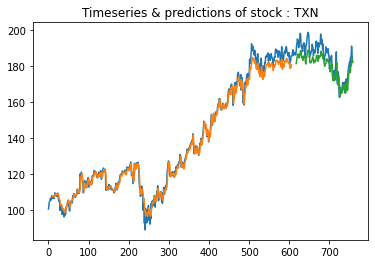

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Train Score: 2.47 RMSE
Monthly Test Score: 7.80 RMSE
Weekly Test Score: 7.80 RMSE
Weekly Mean Error: -6.88 
Monly Mean Error: -10.40 


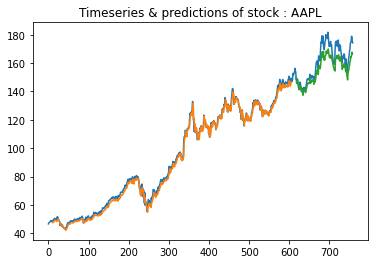

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Train Score: 12.90 RMSE
Monthly Test Score: 75.53 RMSE
Weekly Test Score: 75.53 RMSE
Weekly Mean Error: -73.49 
Monly Mean Error: -91.44 


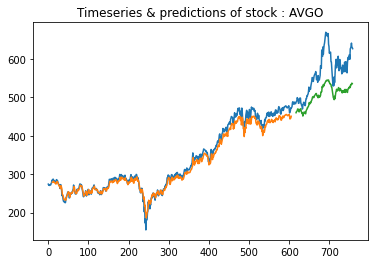

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Train Score: 3.01 RMSE
Monthly Test Score: 3.60 RMSE
Weekly Test Score: 3.60 RMSE
Weekly Mean Error: -0.61 
Monly Mean Error: -0.71 


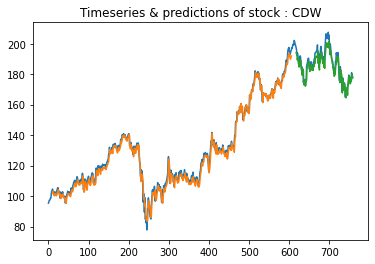

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Train Score: 13.75 RMSE
Monthly Test Score: 26.69 RMSE
Weekly Test Score: 26.69 RMSE
Weekly Mean Error: -22.61 
Monly Mean Error: -23.74 


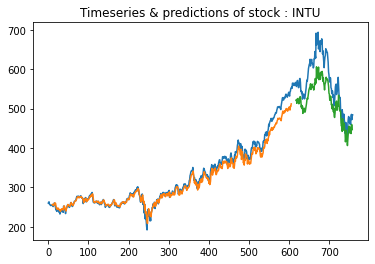

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Train Score: 3.36 RMSE
Monthly Test Score: 15.32 RMSE
Weekly Test Score: 15.32 RMSE
Weekly Mean Error: -10.37 
Monly Mean Error: -17.45 


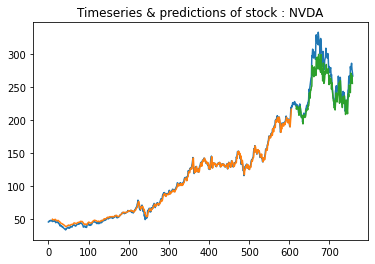

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Train Score: 1.24 RMSE
Monthly Test Score: 2.32 RMSE
Weekly Test Score: 2.32 RMSE
Weekly Mean Error: 0.65 
Monly Mean Error: 1.07 


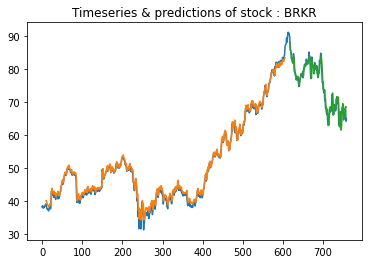

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Train Score: 4.60 RMSE
Monthly Test Score: 3.81 RMSE
Weekly Test Score: 3.81 RMSE
Weekly Mean Error: -1.52 
Monly Mean Error: -0.87 


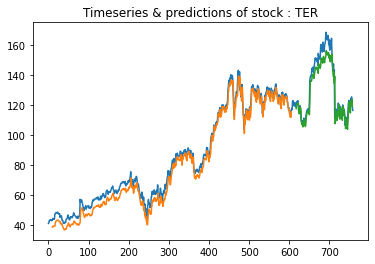

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Train Score: 4.25 RMSE
Monthly Test Score: 10.22 RMSE
Weekly Test Score: 10.22 RMSE
Weekly Mean Error: -8.99 
Monly Mean Error: -8.87 


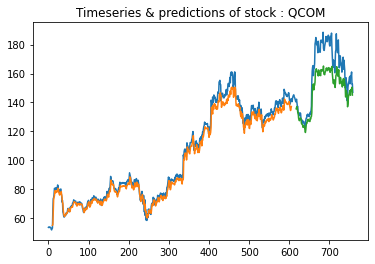

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Train Score: 12.73 RMSE
Monthly Test Score: 14.18 RMSE
Weekly Test Score: 14.18 RMSE
Weekly Mean Error: 0.73 
Monly Mean Error: 2.02 


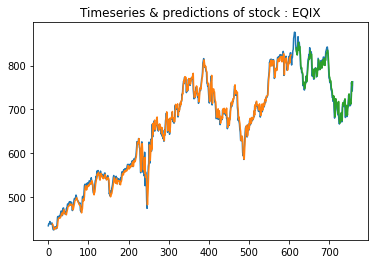

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Train Score: 0.93 RMSE
Monthly Test Score: 1.32 RMSE
Weekly Test Score: 1.32 RMSE
Weekly Mean Error: 0.94 
Monly Mean Error: 0.91 


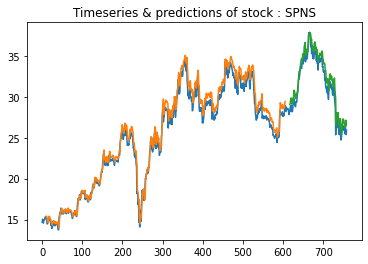

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Train Score: 0.33 RMSE
Monthly Test Score: 0.58 RMSE
Weekly Test Score: 0.58 RMSE
Weekly Mean Error: -0.42 
Monly Mean Error: -0.37 


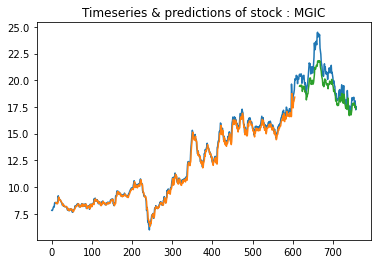

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Train Score: 2.34 RMSE
Monthly Test Score: 19.18 RMSE
Weekly Test Score: 19.18 RMSE
Weekly Mean Error: -16.99 
Monly Mean Error: -24.62 


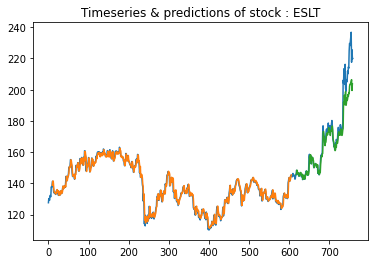

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Train Score: 4.41 RMSE
Monthly Test Score: 4.50 RMSE
Weekly Test Score: 4.50 RMSE
Weekly Mean Error: 3.90 
Monly Mean Error: 4.25 


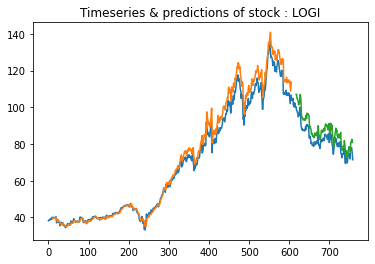

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Train Score: 23.96 RMSE
Monthly Test Score: 38.78 RMSE
Weekly Test Score: 38.78 RMSE
Weekly Mean Error: -5.66 
Monly Mean Error: -37.99 


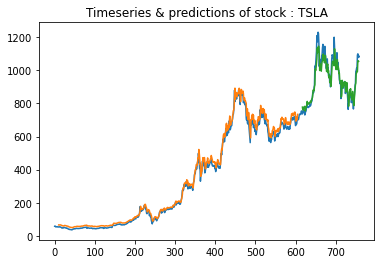

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Train Score: 1.11 RMSE
Monthly Test Score: 0.84 RMSE
Weekly Test Score: 0.84 RMSE
Weekly Mean Error: 0.56 
Monly Mean Error: 0.63 


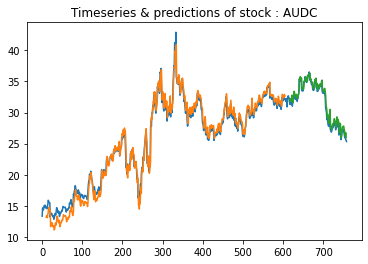

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Train Score: 2.02 RMSE
Monthly Test Score: 1.00 RMSE
Weekly Test Score: 1.00 RMSE
Weekly Mean Error: -0.90 
Monly Mean Error: -1.07 


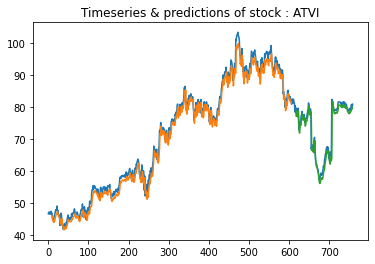

In [ ]:

# Step 2 :
for item in stocks_yahoofinance_edited['Symbol']:
  # Step 2.0 :  fix random seed for reproducibility
  numpy.random.seed(7)

  # Step 2.1 : load data (adjusted closed prices) & normalize
  data = stocks_yahoofinance[item].values
  data = data.astype('float32')
  data = data.reshape(-1,1)
  scaler = MinMaxScaler(feature_range = (0,1))
  data = scaler.fit_transform(data)

  # Step 2.2 : split into train & test sets
  train_size = int(len(data) * 0.8)
  # we will analyse weekly & and montthly predictions to extract resulst
  # for our technical analysis (22 & 5 trading days respectively)
  test_size_monthly = 27
  test_size_weekly = 9
  train_data, test_data = data[0:train_size, :], data[train_size : len(data), :]

  # Step 2.3 :
  # reshape into X=t and Y=t+1
  look_back = 10
  trainX, trainY = create_dataset(train_data, look_back)
  testX, testY = create_dataset(test_data, look_back)

  # reshape input to be [samples, time steps, features]
  trainX = numpy.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
  testX = numpy.reshape(testX, (testX.shape[0], testX.shape[1], 1))

  # Step 2.4 : Create and fit the LSTM network
  batch_size = 1
  model = LSTM_model(batch_size, look_back)

  # Step 2.5 : Train model
  for i in range(10):
    model.fit(trainX, trainY, epochs = 1, batch_size = batch_size,verbose=0 ,shuffle = True)
    model.reset_states()

  # Step 2.6 : Make predictions
  trainPredict = model.predict(trainX, batch_size=batch_size)
  model.reset_states()
  testPredict = model.predict(testX, batch_size=batch_size)

  # Step 2.7 : invert predictions
  trainPredict = scaler.inverse_transform(trainPredict)
  trainY = scaler.inverse_transform([trainY])

  testPredict = scaler.inverse_transform(testPredict)
  testY = scaler.inverse_transform([testY])

  # Step 2.8 : calculate root mean squared error
  trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
  print('Train Score: %.2f RMSE' % (trainScore))

  testMonthlyScore = math.sqrt(mean_squared_error(testY[0][-test_size_monthly : ], testPredict[-test_size_monthly : ,0]))
  print('Monthly Test Score: %.2f RMSE' % (testMonthlyScore))
  testWeeklyScore = math.sqrt(mean_squared_error(testY[0][-test_size_weekly : ], testPredict[-test_size_weekly:,0]))
  print('Weekly Test Score: %.2f RMSE' % (testMonthlyScore))

  MonthlyME = np.mean( testPredict[-test_size_monthly:,0] - testY[0][-test_size_monthly:])
  WeeklyME = np.mean( testPredict[-test_size_weekly:,0] - testY[0][-test_size_weekly:])
  print('Weekly Mean Error: %.2f ' % (MonthlyME))
  print('Monly Mean Error: %.2f ' % (WeeklyME))

  weekly[ptr] = WeeklyME
  monthly[ptr] = MonthlyME

  # Step 2.9 : Shift predictions for plotting
  # shift train predictions for plotting
  trainPredictPlot = numpy.empty_like(data)
  trainPredictPlot[:, :] = numpy.nan
  trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

  # shift test predictions for plotting
  testPredictPlot = numpy.empty_like(data)
  testPredictPlot[:, :] = numpy.nan
  testPredictPlot[len(trainPredict)+(look_back*2)+1:len(data)-1, :] = testPredict

  # Step 2.10 : ploting baseline & monthly, weekly predictions
  plt.plot(scaler.inverse_transform(data))
  plt.plot(trainPredictPlot)
  plt.plot(testPredictPlot)
  plt.title("Timeseries & predictions of stock : " + item)
  plt.show()

  ptr+=1
  # break







In [ ]:
weekly

[-7.422688566836895,
 -4.8390322473111,
 -10.40385259885516,
 -91.43898033434769,
 -0.7057183617449615,
 -23.738324589869112,
 -17.452296005664646,
 1.0670376038228855,
 -0.8705569550784245,
 -8.873684758591915,
 2.017213208926895,
 0.9069529838911659,
 -0.36650836985726404,
 -24.621481771477246,
 4.248204410353687,
 -37.98754045794057,
 0.632121511309902,
 -1.0714690524641004]

In [ ]:
monthly

[-4.93018234330687,
 -2.981914235362388,
 -6.8838835252012816,
 -73.48796872384915,
 -0.6091834362866838,
 -22.606031010511018,
 -10.37243466947366,
 0.6452114139278015,
 -1.5167359078066298,
 -8.992787597326712,
 0.7312950169817853,
 0.9397411682092824,
 -0.4217507937172059,
 -16.991329503683076,
 3.896556767969393,
 -5.6637315407323285,
 0.5560840626983903,
 -0.9003985756953578]

In [ ]:
#################################################################
#   8. Convertion of technical predictions into recomendations  #
#################################################################
# In this section, we use the arrays weekly, monthly that occured as the ME
# (mean error) of our predictions for last's week, month data, and after
# we normalize them between (-1,1) we classify the result as 'Strong Buy', 'Buy'
# ..., and more specifically as 0 (Strong Sell) to 4 (Strong Buy)

# weekly = [-2.53,-1.69, 1.76, -0.39, -7.10, 2.4, 0.49,0.25,
#          -1.67, 1.43, 0.42, -0.06,-0.88, -0.55,
#          1.87, 0.53,1.03,-1.29,-1.68,-0.89,-10.87,-3.67,
#          -9.04,-1.34,-1.06,0.04,0.27,-1.27,-1.43,-0.14,
#          -1.19,-1.89,-1.23,0.24,0.61,-7.55,-0.4,-15.0,
#          0.03]
# monthly = [-4.69,-2.22, 1.26, -0.67, -9.94, 1.51, 0.36, 0.25,
#           -3.29, 1.1, 0.03, -0.39,-1.12, -0.97,
#           1.44, 0.28,0.82,-1.86,-3.33,-1.07,-12.37,-5.35,
#           -9.99, -2.19,-1.4,0.01,0.12,-1.53,-2.19,-0.23,
#           -1.37,-4.18,-1.18,0.07,-0.76,-9.75,-1.27,-20.86,
#           -0.03]


print(np.mean(weekly))
print(np.mean(monthly))

scaler = MinMaxScaler(feature_range = (-1,1))
weekly = np.array(weekly).reshape(-1,1)
monthly = np.array(monthly).reshape(-1,1)

weekly = scaler.fit_transform(weekly).reshape(1,-1)[0].tolist()
monthly = scaler.fit_transform(monthly).reshape(1,-1)[0].tolist()



for i in range(len(weekly)):
  # strong sell
  if weekly[i] <= -0.6:
    weekly[i] = 0
  # sell
  elif weekly[i] > -0.6 and weekly[i] <= -0.2:
    weekly[i] = 1
  # neutral
  elif weekly[i] > -0.2 and weekly[i] <= 0.2:
    weekly[i] = 2
  # buy
  elif weekly[i] > 0.2 and weekly[i] <= 0.6:
    weekly[i] = 3
  # strong buy
  else:
    weekly[i] = 4


for i in range(len(monthly)):
  # strong sell
  if monthly[i] <= -0.6:
    monthly[i] = 0
  # sell
  elif monthly[i] > -0.6 and monthly[i] <= -0.2:
    monthly[i] = 1
  # neutral
  elif monthly[i] > -0.2 and monthly[i] <= 0.2:
    monthly[i] = 2
  # buy
  elif monthly[i] > 0.2 and monthly[i] <= 0.6:
    monthly[i] = 3
  # strong buy
  else:
    monthly[i] = 4

stocks_yahoofinance_edited['Weekly'] = pd.Series(weekly, index=stocks_yahoofinance_edited.index)
stocks_yahoofinance_edited['Monthly'] = pd.Series(monthly, index=stocks_yahoofinance_edited.index)
stocks_yahoofinance_edited



# download stock from yahoo finance & metrics calculated by using LSTM
stocks_yahoofinance_edited.to_csv('f.csv')
# create_download_link(filename = 'f.csv')


-12.273366908429699
-8.310524635175874


In [ ]:
stocks_yahoofinance_edited

Symbol      alpha      beta  r-squared  share_ratio  treynor_ratio  \
0    MSFT  15.373278  1.146386  72.221726     1.035689       0.296125   
1     TXN   2.229937  1.152752  63.849428     0.576698       0.147027   
2    AAPL  26.139359  1.170133  63.274669     1.276991       0.429727   
3    AVGO   7.490603  1.321001  61.955194     0.695427       0.202583   
4     CDW   2.241751  1.214095  61.378750     0.562444       0.148836   
5    INTU   1.764918  1.242340  61.091407     0.546713       0.144851   
6    NVDA  35.626196  1.552888  52.167385     1.178369       0.487093   
7    BRKR   0.132025  1.131786  46.407072     0.438029       0.124128   
8     TER  13.491981  1.391580  45.426855     0.712967       0.261379   
9    QCOM  14.050221  1.278893  44.113794     0.739715       0.272298   
10   EQIX   6.285666  0.804312  36.626771     0.590909       0.194478   
11   SPNS   3.529550  1.003581  32.916856     0.453395       0.158020   
12   MGIC  13.200450  0.886132  29.481395     0.696666       0.291684   
13   ESLT   8.027045  0.645172  24.273349     0.579763       0.231208   
14   LOGI   8.501411  0.797468  23.367570     0.531555       0.228483   
15   TSLA  76.352808  1.407026  22.589221     1.420135       1.141970   
16   AUDC   7.171982  0.923773  19.190135     0.426750       0.204347   
17   ATVI   8.371308  0.635437  17.005260     0.498342       0.238545   

         f_test     1 Year      2 Year      3 Year        YTD  Weekly  Monthly  
0   1968.151274  25.242038   43.930360   38.947371  -7.808102       4        4  
1   1337.019401  -5.313231   40.672222   21.948593  -2.750696       4        4  
2   1304.247583  39.274042   71.288121   55.283775  -1.710831       4        4  
3   1232.759135  32.026339   72.869468   31.761175  -5.138219       0        0  
4   1203.060848   4.689684   43.073371   23.070115 -12.917625       4        4  
5   1188.585660  20.946105   49.999546   22.995364 -24.677116       3        3  
6    825.602156  91.103908  109.880578   80.640024  -9.161359       3        4  
7    655.499796  -3.463360   43.896913   19.048624 -22.493528       4        4  
8    630.129142 -12.012585   49.963272   41.373000 -28.772966       4        4  
9    597.538187   6.613507   52.349281   39.823972 -19.285187       4        4  
10   437.510696  12.260032   14.950735   20.642080  -9.404193       4        4  
11   371.450383 -19.415249   22.092324   20.858614 -24.789552       4        4  
12   316.475568  15.015939   57.251090   30.847027 -15.306210       4        4  
13   242.648063  55.225671   35.962014   19.916896  26.325157       3        3  
14   230.832441 -34.108507   30.849118   23.220747 -13.385064       4        4  
15   220.899995  56.948120  235.577318  165.678115   2.631573       2        4  
16   179.766822  -8.268921    6.647032   23.877005 -26.109315       4        4  
17   155.105993 -17.021230   19.233375   20.158016  21.479034       4        4

# combination

In [ ]:
import numpy as np
import pandas as pd


In [ ]:
stocks_yahoofinance_edited = pd.read_csv('/content/f.csv')
stocks_yahoofinance_edited.drop(columns='Unnamed: 0', inplace=True)
stocks_yahoofinance_edited.head(3)

Symbol      alpha      beta  r-squared  share_ratio  treynor_ratio  \
0   MSFT  15.373278  1.146386  72.221726     1.035689       0.296125   
1    TXN   2.229937  1.152752  63.849428     0.576698       0.147027   
2   AAPL  26.139359  1.170133  63.274669     1.276991       0.429727   

        f_test     1 Year     2 Year     3 Year       YTD  Weekly  Monthly  
0  1968.151274  25.242038  43.930360  38.947371 -7.808102       4        4  
1  1337.019401  -5.313231  40.672222  21.948593 -2.750696       4        4  
2  1304.247583  39.274042  71.288121  55.283775 -1.710831       4        4

In [ ]:
stocks_investing = pd.read_csv('/content/initial_datafram.csv')
stocks_investing.drop(columns=['Unnamed: 0', 'Name'], inplace=True)
stocks_investing.head(3)

Symbol    Market Cap       Revenue  Average Volume (3m)   EPS  P/E Ratio  \
0  QCOM.O  1.656600e+11  3.604000e+10           11174558.0  8.73      17.51   
1  TSLA.O  1.120000e+12  5.382000e+10           26651773.0  4.92     218.95   
2  NVDA.O  6.694000e+11  2.691000e+10           52702837.0  3.85      70.96   

   Beta    YTD  1 Year  3 Years  Weekly  Monthly  
0  1.20 -19.62    6.68   153.04       0        3  
1  2.08   2.63   63.90  1796.80       4        4  
2  1.42  -9.18   93.40   483.87       4        4

In [ ]:
def remove_Nme_O(dataframe, cols):
   for col in cols:
     print(col)
     dataframe[col]= dataframe[col].map(lambda x: str(x)[:-2])
   return dataframe

stocks_investing = remove_Nme_O(stocks_investing, ['Symbol'])
stocks_investing.head(3)

Symbol


Symbol    Market Cap       Revenue  Average Volume (3m)   EPS  P/E Ratio  \
0   QCOM  1.656600e+11  3.604000e+10           11174558.0  8.73      17.51   
1   TSLA  1.120000e+12  5.382000e+10           26651773.0  4.92     218.95   
2   NVDA  6.694000e+11  2.691000e+10           52702837.0  3.85      70.96   

   Beta    YTD  1 Year  3 Years  Weekly  Monthly  
0  1.20 -19.62    6.68   153.04       0        3  
1  2.08   2.63   63.90  1796.80       4        4  
2  1.42  -9.18   93.40   483.87       4        4

In [ ]:
list(stocks_yahoofinance_edited['Symbol'])
list(stocks_investing['Symbol'])
print( len(list(stocks_yahoofinance_edited['Symbol']) ) )
print(len( list(stocks_investing['Symbol'])) )
set(list(stocks_investing['Symbol'])) - set(list(stocks_yahoofinance_edited['Symbol']))

['MSFT',
 'TXN',
 'AAPL',
 'AVGO',
 'CDW',
 'INTU',
 'NVDA',
 'BRKR',
 'TER',
 'QCOM',
 'EQIX',
 'SPNS',
 'MGIC',
 'ESLT',
 'LOGI',
 'TSLA',
 'AUDC',
 'ATVI']

In [ ]:
###########################################################################
#      C. DM1 (investing.com) & DM2 (preprocess yahoofinance) consensus   #
###########################################################################
# In this sectiton we calculate score for each DM for each stock, the total
# score of the 2 DM's for each score (along with average, standard deviation)
# and we exclude more stocks if they are not under a specific STD threshold s.
# HERE we prefer s = 0.18, so every stock with s > 0.18 is excluded
##################################################################################
#   1. DM2 results combined (our own Beta, YTD, weekly, monthly recommendations) #
##################################################################################
# Step 1 : changstocks_investingcome index of DM1
# 1.1
tickers =  stocks_investing['Symbol']
stocks_investing.index = tickers
# 1.2
tickers_exclude = set(list(stocks_investing['Symbol'])) - set(list(stocks_yahoofinance_edited['Symbol']))
stocks_investing = stocks_investing.drop(index = tickers_exclude)
stocks_investing.shape

(18, 12)

In [ ]:
stocks_investing.drop(columns='Symbol', inplace= True)
stocks_investing

Market Cap       Revenue  Average Volume (3m)    EPS  P/E Ratio  \
Symbol                                                                      
QCOM    1.656600e+11  3.604000e+10           11174558.0   8.73      17.51   
TSLA    1.120000e+12  5.382000e+10           26651773.0   4.92     218.95   
NVDA    6.694000e+11  2.691000e+10           52702837.0   3.85      70.96   
AUDC    8.235000e+08  2.489300e+08             128310.0   1.00      25.65   
MSFT    2.320000e+12  1.849000e+11           37557052.0   9.40      32.80   
AAPL    2.840000e+12  3.783200e+11           93292683.0   6.02      28.99   
ESLT    9.740000e+09  5.160000e+09              51816.0   7.55      29.18   
TXN     1.680400e+11  1.834000e+10            6273342.0   8.26      22.20   
EQIX    6.922000e+10  6.640000e+09             467181.0   5.54     133.97   
CDW     2.399000e+10  2.082000e+10             912111.0   7.03      25.43   
AVGO    2.559800e+11  2.850000e+10            2583586.0  17.55      35.87   
INTU    1.368600e+11  1.141000e+10            1957868.0   7.84      61.35   
SPNS    1.420000e+09  4.610300e+08              79800.0   0.85      29.92   
BRKR    9.800000e+09  2.420000e+09             817105.0   1.81      35.47   
ATVI    6.311000e+10  8.800000e+09           12291522.0   3.44      23.26   
TER     1.890000e+10  3.700000e+09            2055816.0   5.52      21.41   
MGIC    8.597600e+08  4.803300e+08              29046.0   0.60      28.84   
LOGI    1.188000e+10  5.790000e+09             962413.0   4.44      16.61   

        Beta    YTD  1 Year  3 Years  Weekly  Monthly  
Symbol                                                 
QCOM    1.20 -19.62    6.68   153.04       0        3  
TSLA    2.08   2.63   63.90  1796.80       4        4  
NVDA    1.42  -9.18   93.40   483.87       4        4  
AUDC    0.58 -27.06   -8.55    61.50       0        1  
MSFT    0.90  -8.00   27.67   159.60       4        4  
AAPL    1.18  -1.84   41.72   259.33       4        4  
ESLT    0.79  26.33   52.76    63.33       4        4  
TXN     0.95  -3.39   -5.20    65.11       4        4  
EQIX    0.46  -9.79   12.54    65.71       4        4  
CDW     1.10 -13.18    4.93    79.11       2        4  
AVGO    1.03  -5.78   31.73   106.89       4        4  
INTU    1.10 -24.76   22.44    80.40       1        3  
SPNS    1.37 -24.79  -19.73    67.27       0        2  
BRKR    1.23 -22.55    0.11    68.67       0        2  
ATVI    0.54  21.48  -15.41    70.29       4        4  
TER     1.48 -28.84   -9.66   176.94       1        2  
MGIC    1.34 -16.29   11.52   106.60       0        2  
LOGI    0.86 -13.39  -33.84    79.50       0        1

In [ ]:
stocks_investing = stocks_investing.reindex(stocks_yahoofinance_edited['Symbol'] )
stocks_investing

Market Cap       Revenue  Average Volume (3m)    EPS  P/E Ratio  \
Symbol                                                                      
MSFT    2.320000e+12  1.849000e+11           37557052.0   9.40      32.80   
TXN     1.680400e+11  1.834000e+10            6273342.0   8.26      22.20   
AAPL    2.840000e+12  3.783200e+11           93292683.0   6.02      28.99   
AVGO    2.559800e+11  2.850000e+10            2583586.0  17.55      35.87   
CDW     2.399000e+10  2.082000e+10             912111.0   7.03      25.43   
INTU    1.368600e+11  1.141000e+10            1957868.0   7.84      61.35   
NVDA    6.694000e+11  2.691000e+10           52702837.0   3.85      70.96   
BRKR    9.800000e+09  2.420000e+09             817105.0   1.81      35.47   
TER     1.890000e+10  3.700000e+09            2055816.0   5.52      21.41   
QCOM    1.656600e+11  3.604000e+10           11174558.0   8.73      17.51   
EQIX    6.922000e+10  6.640000e+09             467181.0   5.54     133.97   
SPNS    1.420000e+09  4.610300e+08              79800.0   0.85      29.92   
MGIC    8.597600e+08  4.803300e+08              29046.0   0.60      28.84   
ESLT    9.740000e+09  5.160000e+09              51816.0   7.55      29.18   
LOGI    1.188000e+10  5.790000e+09             962413.0   4.44      16.61   
TSLA    1.120000e+12  5.382000e+10           26651773.0   4.92     218.95   
AUDC    8.235000e+08  2.489300e+08             128310.0   1.00      25.65   
ATVI    6.311000e+10  8.800000e+09           12291522.0   3.44      23.26   

        Beta    YTD  1 Year  3 Years  Weekly  Monthly  
Symbol                                                 
MSFT    0.90  -8.00   27.67   159.60       4        4  
TXN     0.95  -3.39   -5.20    65.11       4        4  
AAPL    1.18  -1.84   41.72   259.33       4        4  
AVGO    1.03  -5.78   31.73   106.89       4        4  
CDW     1.10 -13.18    4.93    79.11       2        4  
INTU    1.10 -24.76   22.44    80.40       1        3  
NVDA    1.42  -9.18   93.40   483.87       4        4  
BRKR    1.23 -22.55    0.11    68.67       0        2  
TER     1.48 -28.84   -9.66   176.94       1        2  
QCOM    1.20 -19.62    6.68   153.04       0        3  
EQIX    0.46  -9.79   12.54    65.71       4        4  
SPNS    1.37 -24.79  -19.73    67.27       0        2  
MGIC    1.34 -16.29   11.52   106.60       0        2  
ESLT    0.79  26.33   52.76    63.33       4        4  
LOGI    0.86 -13.39  -33.84    79.50       0        1  
TSLA    2.08   2.63   63.90  1796.80       4        4  
AUDC    0.58 -27.06   -8.55    61.50       0        1  
ATVI    0.54  21.48  -15.41    70.29       4        4

In [ ]:
stocks_investing.shape

(18, 11)

In [ ]:
stocks_investing.index

Index(['MSFT', 'TXN', 'AAPL', 'AVGO', 'CDW', 'INTU', 'NVDA', 'BRKR', 'TER',
       'QCOM', 'EQIX', 'SPNS', 'MGIC', 'ESLT', 'LOGI', 'TSLA', 'AUDC', 'ATVI'],
      dtype='object', name='Symbol')

In [ ]:
# Step 2 : define the new DM2 Dataframe
stocks_yahoofinance_edited.index = stocks_investing.index
stock_investitngcom_row = stocks_investing.copy()
stocks_yahoofinance_edited2 = pd.DataFrame(columns = stocks_investing.columns, index = stocks_yahoofinance_edited.index )
for item in stocks_yahoofinance_edited.index:

  # Step 2.1 : select the respective rows froms invesing_com, and preprocessed yahoo finance
  # to update the values of beta, YTD, weekly, monthly based on ou finding from
  # the previous analysis

  stock_yahoofinance_row = stocks_yahoofinance_edited.loc[item].to_frame().transpose()
  stock_investitngcom_row = stocks_investing.loc[item].to_frame().transpose()

  # Step 2.3 : Update the values and append the new row in the new DM2 datatfame
  # change beta
  stock_investitngcom_row['Beta'] = stock_yahoofinance_row['beta']
  # change YTD
  stock_investitngcom_row['YTD'] = stock_yahoofinance_row['YTD']
  # change weekly
  stock_investitngcom_row['Weekly'] = stock_yahoofinance_row['Weekly']
  # change monthly
  stock_investitngcom_row['Monthly'] = stock_yahoofinance_row['Monthly']


  # stock_investitngcom_row = stock_investitngcom_row.convert_objects(convert_numeric = True)
  stocks_yahoofinance_edited2.loc[item] = stock_investitngcom_row.squeeze()
  # stocks_yahoofinance_edited2 = stocks_yahoofinance_edited2.convert_objects(convert_numeric = True)

stocks_yahoofinance_edited2

Market Cap         Revenue Average Volume (3m)    EPS P/E Ratio  \
Symbol                                                                         
MSFT    2320000000000.0  184900000000.0          37557052.0    9.4      32.8   
TXN      168040000000.0   18340000000.0           6273342.0   8.26      22.2   
AAPL    2840000000000.0  378320000000.0          93292683.0   6.02     28.99   
AVGO     255980000000.0   28500000000.0           2583586.0  17.55     35.87   
CDW       23990000000.0   20820000000.0            912111.0   7.03     25.43   
INTU     136860000000.0   11410000000.0           1957868.0   7.84     61.35   
NVDA     669400000000.0   26910000000.0          52702837.0   3.85     70.96   
BRKR       9800000000.0    2420000000.0            817105.0   1.81     35.47   
TER       18900000000.0    3700000000.0           2055816.0   5.52     21.41   
QCOM     165660000000.0   36040000000.0          11174558.0   8.73     17.51   
EQIX      69220000000.0    6640000000.0            467181.0   5.54    133.97   
SPNS       1420000000.0     461030000.0             79800.0   0.85     29.92   
MGIC        859760000.0     480330000.0             29046.0    0.6     28.84   
ESLT       9740000000.0    5160000000.0             51816.0   7.55     29.18   
LOGI      11880000000.0    5790000000.0            962413.0   4.44     16.61   
TSLA    1120000000000.0   53820000000.0          26651773.0   4.92    218.95   
AUDC        823500000.0     248930000.0            128310.0    1.0     25.65   
ATVI      63110000000.0    8800000000.0          12291522.0   3.44     23.26   

            Beta        YTD 1 Year 3 Years Weekly Monthly  
Symbol                                                     
MSFT    1.146386  -7.808102  27.67   159.6      4       4  
TXN     1.152752  -2.750696   -5.2   65.11      4       4  
AAPL    1.170133  -1.710831  41.72  259.33      4       4  
AVGO    1.321001  -5.138219  31.73  106.89      0       0  
CDW     1.214095 -12.917625   4.93   79.11      4       4  
INTU     1.24234 -24.677116  22.44    80.4      3       3  
NVDA    1.552888  -9.161359   93.4  483.87      3       4  
BRKR    1.131786 -22.493528   0.11   68.67      4       4  
TER      1.39158 -28.772966  -9.66  176.94      4       4  
QCOM    1.278893 -19.285187   6.68  153.04      4       4  
EQIX    0.804312  -9.404193  12.54   65.71      4       4  
SPNS    1.003581 -24.789552 -19.73   67.27      4       4  
MGIC    0.886132  -15.30621  11.52   106.6      4       4  
ESLT    0.645172  26.325157  52.76   63.33      3       3  
LOGI    0.797468 -13.385064 -33.84    79.5      4       4  
TSLA    1.407026   2.631573   63.9  1796.8      2       4  
AUDC    0.923773 -26.109315  -8.55    61.5      4       4  
ATVI    0.635437  21.479034 -15.41   70.29      4       4

In [ ]:
stocks_yahoofinance_edited2.dtypes

Market Cap             object
Revenue                object
Average Volume (3m)    object
EPS                    object
P/E Ratio              object
Beta                   object
YTD                    object
1 Year                 object
3 Years                object
Weekly                 object
Monthly                object
dtype: object

In [ ]:

def object_numeric(datafram, cols):
  for col in cols:
    datafram[col] = datafram[col].astype(float)
  return datafram

object_numeric(stocks_yahoofinance_edited2, stocks_yahoofinance_edited2.columns)
stocks_yahoofinance_edited2.dtypes

Market Cap             float64
Revenue                float64
Average Volume (3m)    float64
EPS                    float64
P/E Ratio              float64
Beta                   float64
YTD                    float64
1 Year                 float64
3 Years                float64
Weekly                 float64
Monthly                float64
dtype: object

In [ ]:
fields[1:]

In [ ]:
stocks_investing.columns.values

array(['Market Cap', 'Revenue', 'Average Volume (3m)', 'EPS', 'P/E Ratio',
       'Beta', 'YTD', '1 Year', '3 Years', 'Weekly', 'Monthly'],
      dtype=object)

In [ ]:
########################
#   2. Normalization  #
########################

def normalization(dm, decision, weights):
  dm_normalized = dm.copy()
  fields = list(dm_normalized.columns.values)

  # Step 1: In order to be able to compare different kinds of criteria the first step
  # is to make them dimensionless
  for criterion in fields[0:]:
    crit_values = list(dm_normalized[criterion])
    rms = np.sqrt(sum([i**2 for i in crit_values]))
    dm_normalized[criterion] = dm_normalized[criterion] / rms

  for i in range(0,len(fields)):
    dm_normalized[fields[i]] = dm_normalized[fields[i]] / weights[i]

  # Step 3: Final ranking for the stocks of the portfolio
  # Total sum per row:
  dm_normalized['DM' + str(decision)] = dm_normalized.sum(1)
  return dm_normalized

# Market Cap : 1 %
# P/E Ratio: 2.5%
# Revenue: 2.5%
# Average Vol: 1.5%
# EPS: 10%
# Beta: 25%
# YTD: 15%
# 1 Year: 6.5%
# 3 Year: 1%
# Weekly: 25%
# Monthly: 10%
weights = [ 0.01, 0.025, 0.025, 0.015, 0.1, 0.25, 0.15, 0.065, 0.01, 0.25, 0.1]

stocks_investingcom_normalized = normalization(stocks_investing,1, weights)
stocks_yahoofinance_normalized = normalization(stocks_yahoofinance_edited2,2,weights)

print(stocks_investingcom_normalized.head())
print(stocks_yahoofinance_normalized.head())

        Market Cap    Revenue  Average Volume (3m)        EPS  P/E Ratio  \
Symbol                                                                     
MSFT     59.311037  17.235100            12.726327  21.100616   1.124336   
TXN       4.295960   1.709528             2.125742  18.541605   0.760984   
AAPL     72.604890  35.264376            31.612523  13.513373   0.993735   
AVGO      6.544155   2.656573             0.875456  39.395299   1.229571   
CDW       0.613307   1.940697             0.309072  15.780567   0.871703   

            Beta       YTD    1 Year    3 Years    Weekly   Monthly  \
Symbol                                                                
MSFT    0.735649 -0.702888  2.874517   8.316972  1.306395  2.857143   
TXN     0.776518 -0.297849 -0.540206   3.392970  1.306395  2.857143   
AAPL    0.964517 -0.161664  4.334111  13.514037  1.306395  2.857143   
AVGO    0.841909 -0.507837  3.296293   5.570182  1.306395  2.857143   
CDW     0.899126 -1.158008  0.512156   4.

In [ ]:
stocks_investingcom_normalized

In [ ]:
stocks_yahoofinance_normalized

In [ ]:
#####################################
#   3. Combine scores of DM1, DM2   #
#####################################
# Step 1 : Combine DM1, DM2 scores
final = pd.merge(stocks_investingcom_normalized,stocks_yahoofinance_normalized, left_index=True, right_index=True )
final = final[['DM1','DM2']]
#display(final.head())

# Step 2.1 : Calculate total score
final['Total Score'] = final.sum(1)
#display(final.head())

# Step 2.2 : Rank stocks by total score (sorting)
final = final.sort_values('Total Score', ascending=False)
#display(final.head())


# Step 2.2 : Average of scores of DM1, DM2
final['Average'] = final[['DM1', 'DM2']].mean(1)
#display(final.head())


# Step 2.3 : Standard deviation of scores of DM1, DM2
final['St. dev'] = final[['DM1', 'DM2']].std(1)

#######################DROP STOCKS#######################
TH_std = 0.8

# Step 3.1 : Droping stocks based on their bad total score
final = final[final['Total Score'] >= 0]

# Step 3.2 : Droping stocks based on the standard deviation threshold
final = final[final['St. dev'] <= TH_std]


# Step 4.1 : Calculate consensus & total % consensus
def consensus(data):
  return 100 - (100 * data['St. dev'] / TH_std)

# Step 4.2 : Droping stocks based on their bad consensus performance
TH_con = 15

final['Standard Consensus'] = final[['DM1', 'DM2', 'St. dev']].apply(consensus, axis = 1)
final = final[final['Standard Consensus'] >= TH_con]
final = final.sort_values('Standard Consensus', ascending=False)
print(final.shape)
display(final)
print("Final Average Consensus for DM1, DM2 is : " + str(round(final['Standard Consensus'].mean(0), 2)) + "%")

# download consensus table
final.to_csv('h.csv')
# create_download_link(filename = 'h.csv')

(8, 6)


DM1         DM2  Total Score     Average   St. dev  \
Symbol                                                              
CDW      27.401490   27.544596    54.946086   27.473043  0.101191   
INTU     32.641723   32.940014    65.581738   32.790869  0.210924   
EQIX     27.981389   27.665421    55.646810   27.823405  0.223423   
TXN      34.928790   34.533630    69.462420   34.731210  0.279420   
MSFT    126.885203  126.480978   253.366182  126.683091  0.285830   
ATVI     23.672166   23.147547    46.819713   23.409857  0.370961   
AAPL    176.803435  176.191113   352.994548  176.497274  0.432977   
NVDA     87.990555   87.226685   175.217239   87.608620  0.540138   

        Standard Consensus  
Symbol                      
CDW              87.351119  
INTU             73.634558  
EQIX             72.072103  
TXN              65.072457  
MSFT             64.271241  
ATVI             53.629841  
AAPL             45.877856  
NVDA             32.482781

Final Average Consensus for DM1, DM2 is : 61.8%


In [ ]:
###########################################################################
#      C. DM1 (investing.com) & DM2 (preprocess yahoofinance) consensus   #
###########################################################################
# In this sectiton we calculate score for each DM for each stock, the total
# score of the 2 DM's for each score (along with average, standard deviation)
# and we exclude more stocks if they are not under a specific STD threshold s.
# HERE we prefer s = 0.18, so every stock with s > 0.18 is excluded
##################################################################################
#   1. DM2 results combined (our own Beta, YTD, weekly, monthly recommendations) #
##################################################################################
# Step 1 : changstocks_investingcome index of DM1
# 1.1
tickers = [stocks_tickers.loc[stocks_tickers['Name'] == i, 'Symbol'].item() for i in stocks_investingcom['Name']]
stocks_investingcom.index = tickers
stocks_investingcom.index.names = ['Symbol']
# 1.2
tickers_exclude = list(set(list(stocks_investingcom.index)) -  set(list(stocks_yahoofinance_edited.index)) )
stocks_investingcom = stocks_investingcom.drop(tickers_exclude)
stocks_investingcom = stocks_investingcom.reindex(stocks_yahoofinance_edited.index)

# Step 2 : define the new DM2 Dataframe
stocks_yahoofinance_edited2 = pd.DataFrame(columns = stocks_investingcom.columns, index = stocks_yahoofinance_edited.index )
for item in stocks_yahoofinance_edited.index:

  # Step 2.1 : select the respective rows froms invesing_com, and preprocessed yahoo finance
  # to update the values of beta, YTD, weekly, monthly based on ou finding from
  # the previous analysis

  stock_yahoofinance_row = stocks_yahoofinance_edited.loc[item].to_frame().transpose()
  stock_investitngcom_row = stocks_investingcom.loc[item].to_frame().transpose()

  # Step 2.3 : Update the values and append the new row in the new DM2 datatfame
  # change beta
  stock_investitngcom_row['Beta'] = stock_yahoofinance_row['beta']
  # change YTD
  stock_investitngcom_row['YTD'] = stock_yahoofinance_row['YTD']
  # change weekly
  stock_investitngcom_row['Weekly'] = stock_yahoofinance_row['Weekly']
  # change monthly
  stock_investitngcom_row['Monthly'] = stock_yahoofinance_row['Monthly']


  stock_investitngcom_row = stock_investitngcom_row.convert_objects(convert_numeric = True)
  stocks_yahoofinance_edited2.loc[item] = stock_investitngcom_row.squeeze()
  stocks_yahoofinance_edited2 = stocks_yahoofinance_edited2.convert_objects(convert_numeric = True)

display(stocks_yahoofinance_edited2)


# download combined results fromn DM1, DM2
stocks_yahoofinance_edited2.to_csv('g.csv')
create_download_link(filename = 'g.csv')


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


Name    Market Cap  ...  Weekly  Monthly
Symbol                                       ...                 
MSFT    Microsoft              1.000000e+12  ...  3.0     3.0    
CSCO    Cisco                  2.409200e+11  ...  3.0     4.0    
MPWR    Monolithic             5.570000e+09  ...  4.0     4.0    
TXN     Texas Instruments      1.046900e+11  ...  4.0     4.0    
INTU    Intuit                 6.746000e+10  ...  2.0     2.0    
AAPL    Apple                  9.124400e+11  ...  4.0     4.0    
INTC    Intel                  2.132400e+11  ...  4.0     4.0    
AMAT    Applied Materials      3.971000e+10  ...  4.0     4.0    
ADI     Analog Devices         4.070000e+10  ...  3.0     3.0    
CCMP    Cabot                  3.100000e+09  ...  4.0     4.0    
JKHY    Jack Henry&Associates  1.059000e+10  ...  4.0     4.0    
CGNX    Cognex                 7.760000e+09  ...  4.0     4.0    
MCHP    Microchip              2.021000e+10  ...  4.0     4.0    
MKSI    MKS Instruments        4.040000e+09  ...  4.0     4.0    
NTAP    NetApp                 1.523000e+10  ...  4.0     4.0    
TER     Teradyne               7.930000e+09  ...  4.0     4.0    
CTXS    Citrix Systems         1.293000e+10  ...  4.0     4.0    
CDW     CDW Corp               1.534000e+10  ...  3.0     4.0    
NVDA    NVIDIA                 9.323000e+10  ...  3.0     3.0    
SSNC    SS&Cs                  1.472000e+10  ...  4.0     4.0    
XLNX    Xilinx                 2.829000e+10  ...  1.0     1.0    
BRKR    Bruker                 7.410000e+09  ...  3.0     3.0    
AVGO    Broadcom               1.102900e+11  ...  1.0     2.0    
CY      Cypress                8.120000e+09  ...  3.0     4.0    
OTEX    Open Text              1.110000e+10  ...  4.0     4.0    
KLIC    Kulicke&Soffa          1.430000e+09  ...  4.0     4.0    
LOGI    Logitech               6.350000e+09  ...  4.0     4.0    
MANT    ManTech                2.570000e+09  ...  3.0     4.0    
GRMN    Garmin                 1.532000e+10  ...  3.0     4.0    
NATI    National Instruments   5.290000e+09  ...  4.0     4.0    
STX     Seagate                1.259000e+10  ...  3.0     4.0    
OLED    Universal Display      8.680000e+09  ...  3.0     3.0    
QCOM    Qualcomm               8.680000e+10  ...  3.0     4.0    
PRGS    Progress               1.840000e+09  ...  4.0     4.0    
ESLT    Elbit Systems          6.770000e+09  ...  4.0     4.0    
UBNT    Ubiquiti               9.220000e+09  ...  2.0     2.0    
TTEC    TTEC                   2.070000e+09  ...  4.0     4.0    
EQIX    Equinix                4.234000e+10  ...  0.0     0.0    
AMSWA   American Software      4.432200e+08  ...  4.0     4.0    

[39 rows x 12 columns]

In [ ]:
########################
#   2. Normalization  #
########################

def normalization(dm, decision, weights):
  dm_normalized = dm.copy()
  fields = list(dm_normalized.columns.values)

  # Step 1: In order to be able to compare different kinds of criteria the first step
  # is to make them dimensionless
  for criterion in fields[1:]:
    crit_values = list(dm_normalized[criterion])
    rms = np.sqrt(sum([i**2 for i in crit_values]))
    dm_normalized[criterion] = dm_normalized[criterion] / rms

  for i in range(1,len(fields)-1):
    dm_normalized[fields[i]] = dm_normalized[fields[i]] / weights[i]

  # Step 3: Final ranking for the stocks of the portfolio
  # Total sum per row:
  dm_normalized['DM' + str(decision)] = dm_normalized.sum(1)
  return dm_normalized

# Market Cap : 1 %
# P/E Ratio: 2.5%
# Revenue: 2.5%
# Average Vol: 1.5%
# EPS: 10%
# Beta: 25%
# YTD: 15%
# 1 Year: 6.5%
# 3 Year: 1%
# Weekly: 25%
# Monthly: 10%
weights = [ 0.01, 0.025, 0.025, 0.015, 0.1, 0.25, 0.15, 0.065, 0.01, 0.25, 0.1]

stocks_investingcom_normalized = normalization(stocks_investingcom,1, weights)
stocks_yahoofinance_normalized = normalization(stocks_yahoofinance_edited2,2,weights)

display(stocks_investingcom_normalized.head())
display(stocks_yahoofinance_normalized.head())

Name  Market Cap  P/E Ratio  ...    Weekly   Monthly        DM1
Symbol                                            ...                               
MSFT    Microsoft          28.367598   4.451415   ...  2.119996  0.185695  88.655328
CSCO    Cisco              6.834322    3.023240   ...  2.119996  0.185695  46.551817
MPWR    Monolithic         0.158008    7.926591   ...  0.529999  0.092848  6.810312 
TXN     Texas Instruments  2.969804    2.977456   ...  2.119996  0.185695  14.604107
INTU    Intuit             1.913678    6.105557   ...  2.119996  0.185695  28.913704

[5 rows x 13 columns]

Name  Market Cap  P/E Ratio  ...    Weekly   Monthly        DM2
Symbol                                            ...                               
MSFT    Microsoft          28.367598   4.451415   ...  1.383797  0.131306  88.014077
CSCO    Cisco              6.834322    3.023240   ...  1.383797  0.175075  45.993794
MPWR    Monolithic         0.158008    7.926591   ...  1.845062  0.175075  8.250392 
TXN     Texas Instruments  2.969804    2.977456   ...  1.845062  0.175075  14.534014
INTU    Intuit             1.913678    6.105557   ...  0.922531  0.087538  27.805580

[5 rows x 13 columns]

In [ ]:
#####################################
#   3. Combine scores of DM1, DM2   #
#####################################
# Step 1 : Combine DM1, DM2 scores
final = pd.merge(stocks_investingcom_normalized,stocks_yahoofinance_normalized, left_index=True, right_index=True )
final = final[['DM1','DM2']]
#display(final.head())

# Step 2.1 : Calculate total score
final['Total Score'] = final.sum(1)
#display(final.head())

# Step 2.2 : Rank stocks by total score (sorting)
final = final.sort_values('Total Score', ascending=False)
#display(final.head())


# Step 2.2 : Average of scores of DM1, DM2
final['Average'] = final[['DM1', 'DM2']].mean(1)
#display(final.head())


# Step 2.3 : Standard deviation of scores of DM1, DM2
final['St. dev'] = final[['DM1', 'DM2']].std(1)

#######################DROP STOCKS#######################
TH_std = 0.8

# Step 3.1 : Droping stocks based on their bad total score
final = final[final['Total Score'] >= 0]

# Step 3.2 : Droping stocks based on the standard deviation threshold
final = final[final['St. dev'] <= TH_std]


# Step 4.1 : Calculate consensus & total % consensus
def consensus(data):
  return 100 - (100 * data['St. dev'] / TH_std)

# Step 4.2 : Droping stocks based on their bad consensus performance
TH_con = 15

final['Standard Consensus'] = final[['DM1', 'DM2', 'St. dev']].apply(consensus, axis = 1)
final = final[final['Standard Consensus'] >= TH_con]
final = final.sort_values('Standard Consensus', ascending=False)
print(final.shape)
display(final)
print("Final Average Consensus for DM1, DM2 is : " + str(round(final['Standard Consensus'].mean(0), 2)) + "%")

# download consensus table
final.to_csv('h.csv')
create_download_link(filename = 'h.csv')

(22, 6)


DM1         DM2  ...   St. dev  Standard Consensus
Symbol                          ...                              
TXN     14.604107   14.534014   ...  0.049563  93.804643         
OTEX    19.417729   19.513887   ...  0.067994  91.500772         
AMAT    7.792784    7.663033    ...  0.091748  88.531498         
UBNT    39.425744   39.291003   ...  0.095277  88.090401         
AMSWA   13.476771   13.692423   ...  0.152489  80.938835         
TTEC    25.567020   25.329434   ...  0.167999  79.000134         
AVGO    20.341370   20.073766   ...  0.189225  76.346897         
AAPL    101.679142  101.370049  ...  0.218562  72.679757         
QCOM    33.416355   33.047022   ...  0.261158  67.355254         
XLNX    46.380164   45.966046   ...  0.292826  63.396724         
ESLT    29.808219   29.349819   ...  0.324138  59.482776         
TER     21.316604   20.817141   ...  0.353173  55.853329         
CSCO    46.551817   45.993794   ...  0.394582  50.677288         
SSNC    27.625701   28.238541   ...  0.433343  45.832071         
CDW     28.023398   27.391592   ...  0.446755  44.155667         
MSFT    88.655328   88.014077   ...  0.453434  43.320799         
MANT    20.523921   19.829817   ...  0.490806  38.649287         
GRMN    27.968396   27.191304   ...  0.549487  31.314142         
ADI     18.375722   17.594464   ...  0.552432  30.945940         
JKHY    12.181143   12.965321   ...  0.554497  30.687822         
BRKR    45.281044   44.439207   ...  0.595269  25.591428         
OLED    87.148405   86.250436   ...  0.634960  20.630006         

[22 rows x 6 columns]

Final Average Consensus for DM1, DM2 is : 58.13%


In [ ]:
#######################################################
#      D. Apply TOPSIS, ELECTRE with veto, PROMETHE   #
#######################################################
# > In this sectiton we apply all the above metthodologies to reach a single (or a pool)
# of stocks
# > Depsite the use of our own data to conclude upon the DM2 values, for this section
# we will proceed with actual data we already have from a trust worthy source
# investing.com
stock_tickers = list(final.index)

# Step 1 :  Keep the 22 stocks
tickers_exclude = list(set(list(stocks_investingcom.index)) - set(stock_tickers))
stocks = stocks_investingcom.drop(tickers_exclude)
stocks = stocks.reindex(final.index)

# Step 2 :  Normalize again with different weights this time since our perspective
# have changed. In the previous setction we give greater weights to our risk metrics
# and YTD calculated by our own analysis so that we could have a fair enough DM2
# results.
# Market Cap : 2.5 %
# P/E Ratio: 10%
# Revenue: 15%
# Average Vol: 2.5%
# EPS: 15%
# Beta: 12.5%
# YTD: 10%
# 1 Year: 10%
# 3 Year: 2.5%
# Weekly: 12.5%
# Monthly: 7.5%
weights = [ 0.025, 0.1, 0.15, 0.025, 0.15, 0.125, 0.1, 0.1, 0.025, 0.125, 0.075]

stocks_normalized = normalization(stocks,1,weights)
del stocks_normalized['DM1']
del stocks_normalized['Name']
display(stocks)



Name    Market Cap  ...  Weekly  Monthly
Symbol                                       ...                 
TXN     Texas Instruments      1.046900e+11  ...  4       4      
OTEX    Open Text              1.110000e+10  ...  4       4      
AMAT    Applied Materials      3.971000e+10  ...  4       3      
UBNT    Ubiquiti               9.220000e+09  ...  2       4      
AMSWA   American Software      4.432200e+08  ...  4       4      
TTEC    TTEC                   2.070000e+09  ...  4       4      
AVGO    Broadcom               1.102900e+11  ...  2       4      
AAPL    Apple                  9.124400e+11  ...  4       4      
QCOM    Qualcomm               8.680000e+10  ...  3       4      
XLNX    Xilinx                 2.829000e+10  ...  2       4      
ESLT    Elbit Systems          6.770000e+09  ...  4       4      
TER     Teradyne               7.930000e+09  ...  4       4      
CSCO    Cisco                  2.409200e+11  ...  4       4      
SSNC    SS&Cs                  1.472000e+10  ...  2       4      
CDW     CDW Corp               1.534000e+10  ...  4       4      
MSFT    Microsoft              1.000000e+12  ...  4       4      
MANT    ManTech                2.570000e+09  ...  4       4      
GRMN    Garmin                 1.532000e+10  ...  4       4      
ADI     Analog Devices         4.070000e+10  ...  4       4      
JKHY    Jack Henry&Associates  1.059000e+10  ...  2       3      
BRKR    Bruker                 7.410000e+09  ...  4       4      
OLED    Universal Display      8.680000e+09  ...  4       4      

[22 rows x 12 columns]

In [ ]:
##################
#   1. TOPSIS    #
##################
# 1. The basic principle of the TOPSIS method is that the chosen alternative
#    should have the shortest distance from the positive ideal solution (PIS)
#    and the farthest distance from the negative ideal solution (NIS). It is an
#    effective method to determine the total ranking order of decision alternatives.
# 2. TOPSIS method are used to derive the closeness coefficient and the outranking
#    index of each stock, respectively. Based on the closeness coefficient, the
#    outranking index, and selection threshold, we can easily obtain three type of
#    the investment ratio in accordance with different investment preference of final decision-maker.
#    It is a reasonable way in real decision environment

# Step 1 : Ideal and anti-ideal solutions
topsis_ideal = pd.DataFrame(index = ['Positive ideal solution','Negative ideal solution'], columns = list(stocks_normalized.columns))
topsis_ideal.loc['Positive ideal solution'] = stocks_normalized.max()
topsis_ideal.loc['Negative ideal solution'] = stocks_normalized.min()

# Step 2 : Calculation of the Separation Measures D+, D-. This step is about the calculation
# of the distances of each alternative from the ideal solution as:
#########################################
#                 _______________       #
#                | --                   #
#                | \               2    #
#        D_i* =  | /  (v_ij - v_j*)     #
#               \| --                   #
#                                       #
#########################################
#########################################
#                 _______________       #
#                | --                   #
#           _    | \             _ 2    #
#        D_i  =  | /  (v_ij - v_j )     #
#               \| --                   #
#                                       #
#########################################
stocks_topsis = stocks_normalized.copy()

# Step 2.1 : Calculate D+, D-
def D_plus(data):
  return np.sqrt( sum((data - topsis_ideal.loc['Positive ideal solution'])**2)  )

def D_minus(data):
  return np.sqrt( sum((data - topsis_ideal.loc['Negative ideal solution'])**2)  )

D_plus = stocks_topsis.apply(D_plus, axis = 1)
D_minus = stocks_topsis.apply(D_minus, axis = 1)


stocks_topsis['D_plus'] = D_plus
stocks_topsis['D_minus'] = D_minus


# Step 3 : Calculation of the Relative Closeness to the Ideal Solution
# The relative closeness C_i* is always between 0 and 1 and an alternative is
# best when it is closer to 1. It is calculated for each alternative and is defined as
#########################################
#                     _                 #
#                  D_i                  #
#                                       #
#        C_i* = ----------              #
#                         _             #
#               D_i* + D_i              #
#                                       #
#########################################
def C(data):
  return data['D_minus'] / (data['D_plus'] + data['D_minus'])

stocks_topsis['C_closeness'] =  stocks_topsis.apply(C, axis = 1)
display(stocks_topsis )

# Step 4 : Step 6. Ranking of the Preference Order Finally, the alternatives
# are ranked from best (higher relative closeness value) to worst.
# The best alternative and the solution to the problem is on the top of the list.
TH_topsis = 0.25
stocks_topsis = stocks_topsis.sort_values('C_closeness', ascending=False)
stocks_topsis = stocks_topsis[stocks_topsis['C_closeness'] >= TH_topsis]

display(stocks_topsis)

# Step 5 :  Print company names we will invest in

companynames_topsis = [stocks_tickers.loc[stocks_tickers['Symbol'] == i, 'Name'].item() for i in list(stocks_topsis.index) ]
print("We will invest in the following companies :")
print(companynames_topsis)

display(stocks.loc[list(stocks_topsis.index)])


Market Cap  P/E Ratio    Revenue  ...     D_plus    D_minus  C_closeness
Symbol                                    ...                                   
TXN     0.754252    0.614305   2.124190   ...  43.686894  4.554020   0.094402   
OTEX    0.079971    1.234400   0.392410   ...  43.054234  6.719751   0.135005   
AMAT    0.286096    0.361392   2.148715   ...  45.209548  4.088907   0.082942   
UBNT    0.066427    0.909879   0.155329   ...  38.990413  15.871662  0.289301   
AMSWA   0.003193    2.249101   0.015232   ...  45.979810  3.375561   0.068393   
TTEC    0.014914    1.275842   0.208468   ...  42.163467  8.767989   0.172153   
AVGO    0.794598    1.034507   2.903559   ...  41.996721  6.239085   0.129346   
AAPL    6.573785    0.518320   35.220131  ...  25.198411  36.701146  0.592915   
QCOM    0.625361    1.210023   2.892659   ...  39.802336  9.423257   0.191430   
XLNX    0.203819    0.999770   0.416935   ...  37.908481  18.105980  0.323238   
ESLT    0.048775    0.980268   0.641753   ...  40.566877  10.996578  0.213263   
TER     0.057133    0.613696   0.287495   ...  42.506566  8.056419   0.159334   
CSCO    1.735738    0.623752   6.992522   ...  35.252597  12.825610  0.266766   
SSNC    0.106052    3.595028   0.564089   ...  43.716260  6.080806   0.122112   
CDW     0.110519    0.724612   2.260443   ...  39.937041  9.863132   0.198054   
MSFT    7.204622    0.918411   16.651523  ...  26.771686  21.640885  0.447010   
MANT    0.018516    0.940046   0.271144   ...  42.533080  7.789842   0.154797   
GRMN    0.110375    0.664279   0.463261   ...  40.716871  10.996370  0.212641   
ADI     0.293228    0.798049   0.850221   ...  43.084251  6.156573   0.125030   
JKHY    0.076297    1.144205   0.215280   ...  44.408392  4.542273   0.092793   
BRKR    0.053386    1.232877   0.262969   ...  38.534862  16.827787  0.303956   
OLED    0.062536    3.207125   0.045669   ...  36.325830  29.972628  0.452086   

[22 rows x 14 columns]

Market Cap  P/E Ratio    Revenue  ...     D_plus    D_minus  C_closeness
Symbol                                    ...                                   
AAPL    6.573785    0.518320   35.220131  ...  25.198411  36.701146  0.592915   
OLED    0.062536    3.207125   0.045669   ...  36.325830  29.972628  0.452086   
MSFT    7.204622    0.918411   16.651523  ...  26.771686  21.640885  0.447010   
XLNX    0.203819    0.999770   0.416935   ...  37.908481  18.105980  0.323238   
BRKR    0.053386    1.232877   0.262969   ...  38.534862  16.827787  0.303956   
UBNT    0.066427    0.909879   0.155329   ...  38.990413  15.871662  0.289301   
CSCO    1.735738    0.623752   6.992522   ...  35.252597  12.825610  0.266766   

[7 rows x 14 columns]

We will invest in the following companies :
['Apple', 'Universal Display', 'Microsoft', 'Xilinx', 'Bruker', 'Ubiquiti', 'Cisco']


Name    Market Cap  P/E Ratio  ...  3 Years  Weekly  Monthly
Symbol                                              ...                          
AAPL    Apple              9.124400e+11  17.01      ...  108.71   4       4      
OLED    Universal Display  8.680000e+09  105.25     ...  164.87   4       4      
MSFT    Microsoft          1.000000e+12  30.14      ...  168.48   4       4      
XLNX    Xilinx             2.829000e+10  32.81      ...  138.65   2       4      
BRKR    Bruker             7.410000e+09  40.46      ...  93.23    4       4      
UBNT    Ubiquiti           9.220000e+09  29.86      ...  225.04   2       4      
CSCO    Cisco              2.409200e+11  20.47      ...  94.97    4       4      

[7 rows x 12 columns]

In [ ]:
#######################################
#   2. ELECTRE I with & without veto  #
#######################################
# Step 1 : Define the necessary DataFrames of agreement & disagreement
stocks_electreI = stocks.copy()
del stocks_electreI['Name']

# Step 2 : Define veto thresholds. The veto thresholds express the power attributed to a given criteria to be against the assertion “a outranks b”, when
# the difference in the evaluation between g(b) and g(a) is greater than this threshold.
veto = [10000000000000000000000000, 15,10000000000000000000000000,10000000000000000000000000,5,0.6,25, 45,80,10000000000000000000000000,10000000000000000000000000]

eledctrI_agree = pd.DataFrame(index = stocks_electreI.index, columns = stocks_electreI.index)
eledctrI_disagree = eledctrI_agree.copy()
eledctrI_disagree_veto = eledctrI_agree.copy()

# Step 2 : Calculate agreement & disagreemnt table
# define delta for disagreement

c = stocks_electreI.max()
d = stocks_electreI.min()
delta = max(c - d)

for i in eledctrI_agree.columns:
  for j in eledctrI_agree.columns:
    a = stocks_electreI.loc[i]
    b = stocks_electreI.loc[j]
    # Step 2.1 : agreement cell calculation
    eledctrI_agree[j].loc[i] =  sum([ weights[i] for i in range(len((a-b))) if (a-b)[i] >=0 ])

    # Step 2.2 : disagreement cell calculation
    # with veto
    dis = (b - a) - veto
    dis_result = 1 if any(i >= 0 for i in dis) else 0
    eledctrI_disagree_veto[j].loc[i] = dis_result
    # without veto
    eledctrI_disagree[j].loc[i] = max(dis) / delta

display(eledctrI_agree)
display(eledctrI_disagree)
display(eledctrI_disagree_veto)


#display(eledctrI_agree)
#display(eledctrI_disagree_veto)

# Step 3.1.1 : FIND kernel after applying ELECTRE withtout veto
# Start with c = 1.0, d = 0 as initial threshold values for
# agreement and disagreement. Relaxing those thresholds until we
# include at least 5 stocks in our kernel
c = 1.0
d = 0.0

kernel = list(eledctrI_agree.columns)
changes = {}

for k in range(1000000000):
  length = len(kernel)
  for i in eledctrI_agree.columns:
    for j in eledctrI_agree.columns:
      if i == j: continue
      if(eledctrI_agree[j].loc[i]  >= c and eledctrI_disagree[j].loc[i] <= d):
        if j in kernel:
          kernel.remove(j)
  a = kernel.copy()
  if(len(kernel) < length): changes.update({(c,d):a})
  if(len(kernel) < 6): break
  c -= 0.01
  d += 0.01

# Step 3.1.2 :  Print company names we will invest in
companynames_electreI = [stocks_tickers.loc[stocks_tickers['Symbol'] == i, 'Name'].item() for i in kernel ]
print("Electre I withtout veto : We will invest in the following companies :")
print(companynames_electreI)
print()
print(changes)
print()
display(stocks.loc[kernel])

# Step 3.2 : FIND kernel after applying ELECTRE withtout veto
kernel_veto = list(eledctrI_agree.columns)
changes_veto = {}
s = 1
for k in range(100000000):
  length = len(kernel_veto)
  for i in eledctrI_agree.columns:
    for j in eledctrI_agree.columns:
      if i == j: continue
      if(eledctrI_agree[j].loc[i]  >= s and eledctrI_disagree_veto[j].loc[i] == 0):
        if j in kernel_veto:
          kernel_veto.remove(j)
  a = kernel_veto.copy()
  if(len(kernel_veto) < length): changes_veto.update({(s):a})
  if(len(kernel_veto) < 6): break
  s -= 0.01


# Step 3.3.2 :  Print company names we will invest in
companynames_electreI = [stocks_tickers.loc[stocks_tickers['Symbol'] == i, 'Name'].item() for i in kernel_veto ]
print("Electre with veto : We will invest in the following companies :")
print(companynames_electreI)
print()
print(changes_veto)

display(stocks.loc[kernel_veto])



/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Symbol    TXN   OTEX   AMAT   UBNT  AMSWA  ...   GRMN    ADI   JKHY   BRKR   OLED
Symbol                                     ...                                   
TXN     1      0.7    0.575  0.55   0.8    ...  0.675  0.55   0.8    0.55   0.55 
OTEX    0.5    1      0.4    0.5    0.65   ...  0.3    0.4    0.7    0.475  0.375
AMAT    0.55   0.725  1      0.45   0.625  ...  0.55   0.525  0.65   0.6    0.6  
UBNT    0.525  0.575  0.55   1      0.675  ...  0.675  0.55   0.725  0.4    0.425
AMSWA   0.4    0.55   0.5    0.4    1      ...  0.4    0.4    0.4    0.3    0.2  
TTEC    0.5    0.8    0.5    0.55   0.775  ...  0.4    0.5    0.5    0.3    0.35 
AVGO    0.6    0.575  0.6    0.65   0.675  ...  0.525  0.525  0.675  0.425  0.425
AAPL    0.9    0.8    0.775  0.55   0.8    ...  0.7    0.575  0.9    0.575  0.55 
QCOM    0.675  0.65   0.475  0.625  0.65   ...  0.5    0.6    0.825  0.55   0.55 
XLNX    0.525  0.775  0.4    0.6    0.675  ...  0.575  0.425  0.75   0.55   0.425
ESLT    0.5    0.85   0.65   0.7    0.875  ...  0.7    0.65   0.725  0.5    0.5  
TER     0.55   0.725  0.525  0.6    0.9    ...  0.475  0.55   0.725  0.7    0.65 
CSCO    0.725  0.9    0.725  0.4    0.8    ...  0.65   0.625  0.75   0.575  0.55 
SSNC    0.525  0.625  0.3    0.5    0.775  ...  0.6    0.3    0.85   0.525  0.375
CDW     0.675  0.9    0.825  0.4    0.8    ...  0.875  0.725  0.9    0.55   0.525
MSFT    0.85   0.9    0.875  0.75   0.8    ...  1      0.875  0.9    0.575  0.575
MANT    0.5    0.6    0.4    0.45   0.8    ...  0.3    0.4    0.7    0.5    0.5  
GRMN    0.525  0.9    0.575  0.4    0.8    ...  1      0.3    0.9    0.55   0.55 
ADI     0.65   0.8    0.6    0.525  0.8    ...  0.9    1      0.9    0.7    0.55 
JKHY    0.2    0.3    0.425  0.4    0.6    ...  0.1    0.1    1      0.175  0.325
BRKR    0.65   0.725  0.525  0.675  0.9    ...  0.65   0.5    0.825  1      0.375
OLED    0.65   0.825  0.525  0.65   1      ...  0.65   0.65   0.675  0.825  1    

[22 rows x 22 columns]

Symbol          TXN         OTEX  ...         BRKR         OLED
Symbol                            ...                          
TXN    -6.00266e-13  5.35237e-12  ...  1.5867e-11   7.01211e-11
OTEX    1.40062e-13 -6.00266e-13  ...  7.82347e-12  5.04624e-11
AMAT   -1.01045e-12  1.36561e-11  ...  2.34504e-11  7.84248e-11
UBNT   -7.20319e-13 -1.46065e-12  ...  2.30102e-12  6.04168e-11
AMSWA   3.20142e-13 -8.10359e-13  ...  1.66674e-11  7.03112e-11
TTEC   -6.00266e-14 -8.00355e-13  ... -1.00044e-14  4.84015e-11
AVGO   -2.90129e-13 -1.03046e-12  ...  2.54013e-11  6.37583e-11
AAPL   -6.1027e-13   8.50377e-12  ...  8.45375e-12  7.32725e-11
QCOM   -9.90439e-13 -1.73077e-12  ...  8.47376e-12  5.31235e-11
XLNX   -6.00266e-13 -1.34059e-12  ...  2.96131e-12  5.74655e-11
ESLT   -2.10093e-13 -9.50421e-13  ... -1.60071e-13  5.81058e-11
TER    -9.30412e-13  5.37238e-12  ...  5.32236e-12  7.01411e-11
CSCO   -5.70253e-13  5.04223e-12  ...  4.99221e-12  6.98109e-11
SSNC    2.00089e-14 -1.41063e-12  ...  4.48199e-12  5.76856e-11
CDW    -4.30191e-13  1.73077e-12  ...  3.69164e-12  6.64995e-11
MSFT   -6.1027e-13  -1.3506e-12   ...  9.00399e-13  6.01367e-11
MANT   -3.20142e-13 -1.06047e-12  ...  9.90439e-12  5.94263e-11
GRMN   -3.6016e-13   3.71165e-12  ...  5.6325e-12   6.84804e-11
ADI    -7.80346e-13 -6.80302e-13  ...  5.30235e-12  6.40884e-11
JKHY   -3.20142e-13 -1.06047e-12  ...  2.50611e-11  6.34181e-11
BRKR   -6.50288e-13 -1.39062e-12  ... -6.00266e-13  4.98121e-11
OLED   -8.90395e-13 -1.63072e-12  ... -8.40372e-13 -6.00266e-13

[22 rows x 22 columns]

Symbol  TXN  OTEX  AMAT  UBNT  AMSWA  TTEC  ...  MANT  GRMN  ADI  JKHY  BRKR  OLED
Symbol                                      ...                                   
TXN     0    1     0     1     1      1     ...  0     0     0    1     1     1   
OTEX    1    0     1     1     1      1     ...  0     0     1    0     1     1   
AMAT    0    1     0     1     1      1     ...  1     0     0    1     1     1   
UBNT    0    0     0     0     1      1     ...  0     0     0    0     1     1   
AMSWA   1    0     1     1     0      0     ...  0     0     1    0     1     1   
TTEC    0    0     1     1     1      0     ...  0     0     1    0     0     1   
AVGO    0    0     1     1     1      1     ...  0     0     0    0     1     1   
AAPL    0    1     0     1     1      1     ...  0     0     0    1     1     1   
QCOM    0    0     0     1     1      1     ...  0     0     0    0     1     1   
XLNX    0    0     0     1     1      1     ...  0     0     0    0     1     1   
ESLT    0    0     1     1     1      0     ...  0     0     0    0     0     1   
TER     0    1     0     1     1      1     ...  0     0     0    1     1     1   
CSCO    0    1     0     1     1      1     ...  0     0     0    1     1     1   
SSNC    1    0     0     1     0      1     ...  0     0     0    0     1     1   
CDW     0    1     0     0     1      1     ...  0     0     0    0     1     1   
MSFT    0    0     0     0     1      1     ...  0     0     0    0     1     1   
MANT    0    0     1     1     1      1     ...  0     0     0    0     1     1   
GRMN    0    1     1     1     1      1     ...  0     0     0    1     1     1   
ADI     0    0     0     1     1      1     ...  0     0     0    0     1     1   
JKHY    0    0     1     1     1      1     ...  0     0     0    0     1     1   
BRKR    0    0     0     1     1      0     ...  0     0     0    0     0     1   
OLED    0    0     0     0     0      0     ...  0     0     0    0     0     0   

[22 rows x 22 columns]

Electre I withtout veto : We will invest in the following companies :
['Ubiquiti', 'Apple', 'Elbit Systems', 'Microsoft', 'Universal Display']

{(1.0, 0.0): ['TXN', 'OTEX', 'AMAT', 'UBNT', 'TTEC', 'AVGO', 'AAPL', 'QCOM', 'XLNX', 'ESLT', 'TER', 'SSNC', 'MSFT', 'MANT', 'ADI', 'JKHY', 'BRKR', 'OLED'], (0.8999999999999999, 0.09999999999999999): ['AMAT', 'UBNT', 'AAPL', 'QCOM', 'XLNX', 'ESLT', 'TER', 'SSNC', 'MSFT', 'ADI', 'BRKR', 'OLED'], (0.8699999999999999, 0.12999999999999998): ['UBNT', 'AAPL', 'QCOM', 'XLNX', 'ESLT', 'TER', 'SSNC', 'MSFT', 'BRKR', 'OLED'], (0.8199999999999998, 0.18000000000000002): ['UBNT', 'AAPL', 'QCOM', 'XLNX', 'ESLT', 'TER', 'SSNC', 'MSFT', 'OLED'], (0.7999999999999998, 0.20000000000000004): ['UBNT', 'AAPL', 'QCOM', 'ESLT', 'TER', 'SSNC', 'MSFT', 'OLED'], (0.7699999999999998, 0.23000000000000007): ['UBNT', 'AAPL', 'ESLT', 'MSFT', 'OLED']}



Name    Market Cap  P/E Ratio  ...  3 Years  Weekly  Monthly
Symbol                                              ...                          
UBNT    Ubiquiti           9.220000e+09  29.86      ...  225.04   2       4      
AAPL    Apple              9.124400e+11  17.01      ...  108.71   4       4      
ESLT    Elbit Systems      6.770000e+09  32.17      ...  70.87    4       4      
MSFT    Microsoft          1.000000e+12  30.14      ...  168.48   4       4      
OLED    Universal Display  8.680000e+09  105.25     ...  164.87   4       4      

[5 rows x 12 columns]

Electre with veto : We will invest in the following companies :
['Apple', 'Elbit Systems', 'SS&Cs', 'Microsoft', 'Universal Display']

{1: ['TXN', 'OTEX', 'AMAT', 'UBNT', 'TTEC', 'AVGO', 'AAPL', 'QCOM', 'XLNX', 'ESLT', 'TER', 'SSNC', 'MSFT', 'MANT', 'ADI', 'JKHY', 'BRKR', 'OLED'], 0.8999999999999999: ['AMAT', 'UBNT', 'AVGO', 'AAPL', 'QCOM', 'XLNX', 'ESLT', 'TER', 'SSNC', 'MSFT', 'ADI', 'BRKR', 'OLED'], 0.8699999999999999: ['UBNT', 'AVGO', 'AAPL', 'QCOM', 'XLNX', 'ESLT', 'TER', 'SSNC', 'MSFT', 'BRKR', 'OLED'], 0.8199999999999998: ['UBNT', 'AVGO', 'AAPL', 'QCOM', 'XLNX', 'ESLT', 'TER', 'SSNC', 'MSFT', 'OLED'], 0.7999999999999998: ['UBNT', 'AVGO', 'AAPL', 'QCOM', 'ESLT', 'TER', 'SSNC', 'MSFT', 'OLED'], 0.7699999999999998: ['UBNT', 'AVGO', 'AAPL', 'ESLT', 'SSNC', 'MSFT', 'OLED'], 0.7499999999999998: ['AAPL', 'ESLT', 'SSNC', 'MSFT', 'OLED']}


Name    Market Cap  P/E Ratio  ...  3 Years  Weekly  Monthly
Symbol                                              ...                          
AAPL    Apple              9.124400e+11  17.01      ...  108.71   4       4      
ESLT    Elbit Systems      6.770000e+09  32.17      ...  70.87    4       4      
SSNC    SS&Cs              1.472000e+10  117.98     ...  98.06    2       4      
MSFT    Microsoft          1.000000e+12  30.14      ...  168.48   4       4      
OLED    Universal Display  8.680000e+09  105.25     ...  164.87   4       4      

[5 rows x 12 columns]

In [ ]:
######################
#   3. PROMETTHEE    #
######################
stocks_promethee = stocks.copy()
promethee_flows = stocks.copy()
del stocks_promethee['Name']
del promethee_flows['Name']
# threshold of absolute preference, threshold of indifference and type for each criterion
p_q_type = {'Market Cap':(10**9, 10**11, 'typeV'), 'P/E Ratio': (15, 35,'typeV'), 'Revenue':(10**8, 10**10, 'typeV'), 'Average Vol. (3m)':(10**7, 10**8, 'typeV'),
            'EPS':(1,6, 'typeV'), 'Beta':(0,0.6, 'typeV'), 'YTD':(5, 25, 'typeV'), '1 Year':(5, 45, 'typeV'), '3 Years':(10, 75,'typeV'), 'Weekly':(0,1,'typeI'), 'Monthly':(0,1,'typeI')}

def typeV(d, q, p):
  if(d <= q): return 0
  elif (d > p): return 1
  else: return (d - q)/ (p - q)

def typeI(d):
  return 1 if d > 0 else 0


for crit in stocks_promethee.columns:
  print(crit)
  promethee_preferences_crit = pd.DataFrame(index = stocks_promethee.index, columns = stocks_promethee.index)
  for i in promethee_preferences_crit.columns:
    for j in promethee_preferences_crit.columns:
      # Step 1 : Calculate the differences between the evaluations of the stocks on the specific criterion
      diff = stocks_promethee[crit].loc[j] - stocks_promethee[crit].loc[i]
      # Step 2 : Calculate pairwise comparison
      # Use as a criterion :  linear (type V) preference functions are best suited for quantitative criteria (e.g. prices, costs, power, ...)

      q,p,type_i = p_q_type[crit]

      if(type_i == 'typeV'):
        promethee_preferences_crit[j].loc[i] = typeV(diff, q, p)
      else:
        promethee_preferences_crit[j].loc[i] = typeI(diff)


  # Step 3 : Positive, negative, and net flows for the investment criterion
  length = len(promethee_preferences_crit) - 1
  promethee_preferences_crit['Positive Flow'] = promethee_preferences_crit.sum(1) / length
  promethee_preferences_crit['Negative Flow'] = promethee_preferences_crit.sum(0) / length
  promethee_preferences_crit['Net Flow'] = promethee_preferences_crit['Negative Flow'] - promethee_preferences_crit['Positive Flow']

  # Step 4 : Append flows for this criterion in the final dataframe
  promethee_flows[crit] =  promethee_preferences_crit['Net Flow']

display(promethee_flows)

# Step 5 : Calculate weighted global net flow
for i in promethee_flows.index:
  promethee_flows.loc[i] = promethee_flows.loc[i] * weights

promethee_flows['Net Flow'] = promethee_flows.sum(1)
promethee_flows = promethee_flows.sort_values('Net Flow', ascending = False)
display(promethee_flows)


# Step 6 :  Print company names we will invest in
kernel_promethee = list(promethee_flows.head(7).index)
companynames_promethee = [stocks_tickers.loc[stocks_tickers['Symbol'] == i, 'Name'].item() for i in kernel_promethee ]
print("We will invest in the following companies :")
print(companynames_promethee)

display(stocks.loc[kernel_promethee])


Market Cap


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


P/E Ratio
Revenue
Average Vol. (3m)
EPS
Beta
YTD
1 Year
3 Years
Weekly
Monthly


Market Cap  P/E Ratio   Revenue  ...   3 Years    Weekly   Monthly
Symbol                                   ...                              
TXN     0.550495   -0.200714   0.462290  ... -0.214542  0.285714  0.095238
OTEX   -0.292570   -0.035595  -0.357561  ... -0.647297  0.285714  0.095238
AMAT   -0.036154   -0.367667   0.466522  ... -0.213018  0.285714 -0.952381
UBNT   -0.307327   -0.135714  -0.468961  ...  0.971766 -0.809524  0.095238
AMSWA  -0.374761    0.800595  -0.536277  ... -0.584725  0.285714  0.095238
TTEC   -0.362661   -0.008071  -0.443901  ... -0.358564  0.285714  0.095238
AVGO    0.587128   -0.121357   0.599230  ... -0.253780 -0.809524  0.095238
AAPL    0.910746   -0.245119   1.000000  ...  0.115597  0.285714  0.095238
QCOM    0.392283   -0.050833   0.598076  ... -0.682828 -0.523810  0.095238
XLNX   -0.139554   -0.126786  -0.346402  ...  0.492989 -0.809524  0.095238
ESLT   -0.325086   -0.129833  -0.238177  ... -0.286982  0.285714  0.095238
TER    -0.316683   -0.200952  -0.408451  ...  0.446828  0.285714  0.095238
CSCO    0.809524   -0.197024   0.809524  ... -0.054190  0.285714  0.095238
SSNC   -0.261060    0.952381  -0.275599  ... -0.017971 -0.809524  0.095238
CDW    -0.256288   -0.160548   0.487542  ...  0.657751  0.285714  0.095238
MSFT    0.994016   -0.135048   0.904762  ...  0.746462  0.285714  0.095238
MANT   -0.359054   -0.133357  -0.415377  ... -0.227590  0.285714  0.095238
GRMN   -0.256442   -0.181190  -0.324468  ... -0.109348  0.285714  0.095238
ADI    -0.028058   -0.144476  -0.130721  ... -0.072755  0.285714  0.095238
JKHY   -0.296740   -0.086048  -0.441015  ... -0.356505 -0.809524 -0.952381
BRKR   -0.320391   -0.036548  -0.418841  ... -0.074403  0.285714  0.095238
OLED   -0.311363    0.943905  -0.522196  ...  0.723106  0.285714  0.095238

[22 rows x 11 columns]

Market Cap  P/E Ratio   Revenue  ...    Weekly   Monthly  Net Flow
Symbol                                   ...                              
AAPL    0.022769   -0.024512   0.150000  ...  0.035714  0.007143  0.316607
OLED   -0.007784    0.094390  -0.078329  ...  0.035714  0.007143  0.304545
MSFT    0.024850   -0.013505   0.135714  ...  0.035714  0.007143  0.262331
CSCO    0.020238   -0.019702   0.121429  ...  0.035714  0.007143  0.162793
CDW    -0.006407   -0.016055   0.073131  ...  0.035714  0.007143  0.100067
BRKR   -0.008010   -0.003655  -0.062826  ...  0.035714  0.007143  0.092525
TXN     0.013762   -0.020071   0.069343  ...  0.035714  0.007143  0.066602
QCOM    0.009807   -0.005083   0.089711  ... -0.065476  0.007143  0.053186
TER    -0.007917   -0.020095  -0.061268  ...  0.035714  0.007143  0.052614
ADI    -0.000701   -0.014448  -0.019608  ...  0.035714  0.007143  0.031153
AMAT   -0.000904   -0.036767   0.069978  ...  0.035714 -0.071429  0.006242
ESLT   -0.008127   -0.012983  -0.035727  ...  0.035714  0.007143 -0.025790
UBNT   -0.007683   -0.013571  -0.070344  ... -0.101190  0.007143 -0.052676
AVGO    0.014678   -0.012136   0.089885  ... -0.101190  0.007143 -0.057603
GRMN   -0.006411   -0.018119  -0.048670  ...  0.035714  0.007143 -0.058284
XLNX   -0.003489   -0.012679  -0.051960  ... -0.101190  0.007143 -0.070338
TTEC   -0.009067   -0.000807  -0.066585  ...  0.035714  0.007143 -0.100705
SSNC   -0.006526    0.095238  -0.041340  ... -0.101190  0.007143 -0.116393
MANT   -0.008976   -0.013336  -0.062307  ...  0.035714  0.007143 -0.149011
AMSWA  -0.009369    0.080060  -0.080441  ...  0.035714  0.007143 -0.177132
OTEX   -0.007314   -0.003560  -0.053634  ...  0.035714  0.007143 -0.227305
JKHY   -0.007419   -0.008605  -0.066152  ... -0.101190 -0.071429 -0.413427

[22 rows x 12 columns]

We will invest in the following companies :
['Apple', 'Universal Display', 'Microsoft', 'Cisco', 'CDW Corp', 'Bruker', 'Texas Instruments']


Name    Market Cap  P/E Ratio  ...  3 Years  Weekly  Monthly
Symbol                                              ...                          
AAPL    Apple              9.124400e+11  17.01      ...  108.71   4       4      
OLED    Universal Display  8.680000e+09  105.25     ...  164.87   4       4      
MSFT    Microsoft          1.000000e+12  30.14      ...  168.48   4       4      
CSCO    Cisco              2.409200e+11  20.47      ...  94.97    4       4      
CDW     CDW Corp           1.534000e+10  23.78      ...  155.31   4       4      
BRKR    Bruker             7.410000e+09  40.46      ...  93.23    4       4      
TXN     Texas Instruments  1.046900e+11  20.16      ...  78.89    4       4      

[7 rows x 12 columns]

# demfster

In [ ]:
!pip install dempster_shafer
import dempster_shafer as ds

In [ ]:


# Create a Frame of Discerment for the items a, b, c, d using a list
fod1 = ds.FrameOfDiscernment(['a', 'b', 'c', 'd'])

# Create focal set for the frame of discernment
fs1 = ds.FocalSet(fod1,
    {
        "abdc": 0.1,
        "a": 0.3,
        "b": 0.2,
        "c": 0.3,
        "d": 0.3,
    })
fs2 = ds.FocalSet(fod1,
    {
        "abdc": 0.1,
        "a": 0.3,
        "b": 0.2,
        "c": 0.3,
        "d": 0.3,
    })
# Create lattice
lat = ds.Lattice(fod1, [fs1, fs2])
# Compute the plausibility
lat.pl()
# Compute the belief
lat.bel()

In [ ]:
import numpy as np


In [ ]:
fod1 = ds.FrameOfDiscernment(['a', 'b', 'c', 'd'])
fes = np.array(['c', 'bc', 'ad'])
bpas = np.array([.5, .4, .1])

fs1 = ds.FocalSet(fod1, bpas, fes)
print(fs1)

# fes_num = np.array([2, 6, 9])
# fs2 = ds.FocalSet(fod1, bpas, fes_num)
# print(fs2)

Items ['a' 'b' 'c' 'd'] 
Focal set {2: 0.5, 6: 0.4, 9: 0.1} 

Items ['a' 'b' 'c' 'd'] 
Focal set {2: 0.5, 6: 0.4, 9: 0.1} 



# test

# time series forcasting\
[source for LSTM](https://machinelearningmastery.com/time-series-prediction-lstm-recurrent-neural-networks-python-keras/)\
[source for XGBoost](https://machinelearningmastery.com/xgboost-for-time-series-forecasting/)\
[why use model.reset_state()](https://stackoverflow.com/questions/42763928/how-to-use-model-reset-states-in-keras)


In [ ]:
import numpy as np
import pandas as pd
##########################################
#   7. LSTM & Stock movement prediciton  #
##########################################
# Step 1 : import necessary libraries
import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Flatten
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error


# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)


def LSTM_model(batch_size, look_back):
  model = Sequential()
  model.add(  LSTM(4, batch_input_shape = (batch_size, look_back, 1), stateful = True, return_sequences = True)  )
  model.add(  LSTM(4, batch_input_shape = (batch_size, look_back, 1), stateful = True)  )
  model.add( Dense(1) )
  model.compile(Adam(learning_rate=0.01), loss='mean_squared_error')
  return model

In [ ]:
# Step 2 :
def predict_weekMonthly(Symbols_, stocks_finance, storcks_edits):
  ptr = 0
  weekly = [0] * storcks_edits.shape[0]
  monthly = [0] * storcks_edits.shape[0]

  for item in Symbols_:
    # Step 2.0 :  fix random seed for reproducibility
    numpy.random.seed(7)

    # Step 2.1 : load data (adjusted closed prices) & normalize
    data = stocks_finance[item].values
    data = data.astype('float32')
    data = data.reshape(-1,1)
    scaler = MinMaxScaler(feature_range = (0,1))
    data = scaler.fit_transform(data)

    # Step 2.2 : split into train & test sets
    train_size = int(len(data) * 0.8)
    # we will analyse weekly & and montthly predictions to extract resulst
    # for our technical analysis (22 & 5 trading days respectively)
    test_size_monthly = 27
    test_size_weekly = 9
    train_data, test_data = data[0:train_size, :], data[train_size : len(data), :]

    # Step 2.3 :
    # reshape into X=t and Y=t+1
    look_back = 10
    trainX, trainY = create_dataset(train_data, look_back)
    testX, testY = create_dataset(test_data, look_back)

    # reshape input to be [samples, time steps, features]
    trainX = numpy.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
    testX = numpy.reshape(testX, (testX.shape[0], testX.shape[1], 1))

    # Step 2.4 : Create and fit the LSTM network
    batch_size = 1
    model = LSTM_model(batch_size, look_back)

    # Step 2.5 : Train model
    for i in range(10):
      model.fit(trainX, trainY, epochs = 1, batch_size = batch_size,verbose=0 ,shuffle = True)
      model.reset_states()

    # Step 2.6 : Make predictions
    trainPredict = model.predict(trainX, batch_size=batch_size)
    model.reset_states()
    testPredict = model.predict(testX, batch_size=batch_size)

    # Step 2.7 : invert predictions
    trainPredict = scaler.inverse_transform(trainPredict)
    trainY = scaler.inverse_transform([trainY])

    testPredict = scaler.inverse_transform(testPredict)
    testY = scaler.inverse_transform([testY])

    # Step 2.8 : calculate root mean squared error
    trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
    print('Train Score: %.2f RMSE' % (trainScore))

    testMonthlyScore = math.sqrt(mean_squared_error(testY[0][-test_size_monthly : ], testPredict[-test_size_monthly : ,0]))
    print('Monthly Test Score: %.2f RMSE' % (testMonthlyScore))
    testWeeklyScore = math.sqrt(mean_squared_error(testY[0][-test_size_weekly : ], testPredict[-test_size_weekly:,0]))
    print('Weekly Test Score: %.2f RMSE' % (testMonthlyScore))

    MonthlyME = np.mean( testPredict[-test_size_monthly:,0] - testY[0][-test_size_monthly:])
    WeeklyME = np.mean( testPredict[-test_size_weekly:,0] - testY[0][-test_size_weekly:])
    print('Weekly Mean Error: %.2f ' % (MonthlyME))
    print('Monly Mean Error: %.2f ' % (WeeklyME))

    weekly[ptr] = WeeklyME
    monthly[ptr] = MonthlyME

    # Step 2.9 : Shift predictions for plotting
    # shift train predictions for plotting
    trainPredictPlot = numpy.empty_like(data)
    trainPredictPlot[:, :] = numpy.nan
    trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

    # shift test predictions for plotting
    testPredictPlot = numpy.empty_like(data)
    testPredictPlot[:, :] = numpy.nan
    testPredictPlot[len(trainPredict)+(look_back*2)+1:len(data)-1, :] = testPredict

    # Step 2.10 : ploting baseline & monthly, weekly predictions
    plt.plot(scaler.inverse_transform(data))
    plt.plot(trainPredictPlot)
    plt.plot(testPredictPlot)
    plt.title("Timeseries & predictions of stock : " + item)
    plt.show()

    ptr+=1
    # break
  return weekly, monthly

In [ ]:
stock_alphafinance = pd.read_csv('/content/stocks_alphafinance.csv')
stock_alphafinance.drop(columns= 'Unnamed: 0', inplace= True)
stock_alphafinance = stock_alphafinance.set_index('Date')
stock_alphafinance.sort_index(inplace=True)
import numpy as np
# alpha_finance['Date']= alpha_finance.index  # this would put Date the last column
stock_alphafinance.insert(0, 'Date', stock_alphafinance.index)
stock_alphafinance.index = np.arange(0, len(stock_alphafinance))
stock_alphafinance.head(3)

Date   QCOM    TSLA    NVDA  TAIT   INTC   AUDC    OLED   CSCO  \
0  2019-04-01  57.81  289.18  182.28  2.70  54.51  14.25  158.36  54.98   
1  2019-04-02  58.09  285.88  183.00  2.97  54.36  15.69  159.80  55.29   
2  2019-04-03  57.68  291.81  188.62  2.99  55.48  15.55  165.31  55.63   

     MSFT  ...    WDC   ATVI   MKSI    TER     ADI    CCMP  MGIC   LOGI  APWC  \
0  119.02  ...  49.31  47.12  94.43  41.78  108.28  115.26  8.50  39.66  2.31   
1  119.19  ...  50.38  47.46  94.80  42.02  108.11  114.42  8.48  39.80  2.30   
2  119.97  ...  52.01  47.65  98.57  43.60  109.84  119.38  8.54  40.37  2.30   

    SWKS  
0  83.86  
1  84.16  
2  85.36  

[3 rows x 36 columns]

#test

In [ ]:
    # Step 2.3 :
    # reshape into X=t and Y=t+1
    look_back = 10
    trainX, trainY = create_dataset(train_data, look_back)
    testX, testY = create_dataset(test_data, look_back)

    # reshape input to be [samples, time steps, features]
    trainX = numpy.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
    testX = numpy.reshape(testX, (testX.shape[0], testX.shape[1], 1))

    # Step 2.4 : Create and fit the LSTM network
    batch_size = 1    # Step 2.3 :
    # reshape into X=t and Y=t+1
    look_back = 10
    trainX, trainY = create_dataset(train_data, look_back)
    testX, testY = create_dataset(test_data, look_back)

    # reshape input to be [samples, time steps, features]
    trainX = numpy.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
    testX = numpy.reshape(testX, (testX.shape[0], testX.shape[1], 1))

    # Step 2.4 : Create and fit the LSTM network
    batch_size = 1

In [ ]:
item = 'QCOM'
data = stock_alphafinance[item].values
data = data.astype('float32')
data = data.reshape(-1,1)
print(data)

In [ ]:
scaler = MinMaxScaler(feature_range = (0,1))
data = scaler.fit_transform(data)
train_size = int(len(data) * 0.8)
train_data, test_data = data[0:train_size, :], data[train_size : len(data), :]

In [ ]:
look_back = 10
trainX, trainY = create_dataset(train_data, look_back)

In [ ]:
train_data[0, :-1]

array([], dtype=float32)

In [ ]:
print(trainX[0])
print(trainY[0])
print(data[0:10])

[0.01431999 0.01641923 0.0133453  0.01469484 0.01566952 0.0139451
 0.01154593 0.00322387 0.         0.00787222]
0.009596616
[[0.01431999]
 [0.01641923]
 [0.0133453 ]
 [0.01469484]
 [0.01566952]
 [0.0139451 ]
 [0.01154593]
 [0.00322387]
 [0.        ]
 [0.00787222]]


In [ ]:
    # reshape input to be [samples, time steps, features]
testX, testY = create_dataset(test_data, look_back)
trainX = numpy.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = numpy.reshape(testX, (testX.shape[0], testX.shape[1], 1))
print(trainX.shape)

(596, 10, 1)


In [ ]:
batch_size = 1
model = LSTM_model(batch_size, look_back)
model

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (1, 10, 4)                96        
                                                                 
 lstm_3 (LSTM)               (1, 4)                    144       
                                                                 
 dense_1 (Dense)             (1, 1)                    5         
                                                                 
Total params: 245
Trainable params: 245
Non-trainable params: 0
_________________________________________________________________


In [ ]:
trainX.shape

(596, 10)

In [ ]:
trainY.shape

(596,)

In [ ]:
data.shape
stock_alphafinance['TSLA'].values.shape

(759,)

# xgboost trying

out-of-sample forecast,\

In [ ]:
# forecast monthly births with xgboost
from numpy import asarray
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.metrics import mean_absolute_error, mean_squared_error
from xgboost import XGBRegressor
from matplotlib import pyplot

# transform a time series dataset into a supervised learning dataset
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols = list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
	# put it all together
	agg = concat(cols, axis=1)
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg.values

# split a univariate dataset into train/test sets
def train_test_split(data, n_test):
	return data[:-n_test, :], data[-n_test:, :]

# fit an xgboost model and make a one step prediction
def xgboost_forecast(model, train, testX, valid=True):
	# transform list into array
	train = asarray(train)
	# split into input and output columns
	trainX, trainy = train[:, :-1], train[:, -1]
	# fit model

	if valid == True:
		model.fit(trainX, trainy)
	# make a one-step prediction
	yhat = model.predict(asarray([testX]))
	return yhat[0], model

# walk-forward validation for univariate data
def walk_forward_validation(data, n_test):
	predictions = list()
	# split dataset
	train, test = train_test_split(data, n_test)
	model = XGBRegressor(objective='reg:squarederror', n_estimators=2000)
	# seed history with training dataset
	history = [x for x in train]
	# step over each time-step in the test set
	for i in range(len(test)):
		# split test row into input and output columns
		testX, testy = test[i, :-1], test[i, -1]
		# fit model on history and make a prediction
		yhat, model = xgboost_forecast(model, history, testX)
		# store forecast in list of predictions
		predictions.append(yhat)
		# add actual observation to history for the next loop
		history.append(test[i])
		# summarize progress
		print('>expected=%.1f, predicted=%.1f' % (testy, yhat))
	# estimate prediction error
	error = mean_squared_error(test[:, -1], predictions)
	return error, test[:, -1], predictions

# walk-forward validation for univariate data
def walk_forward_validation_predict(data, n_test):
	predictions = list()
	# split dataset
	train, test = train_test_split(data, n_test)
	model = XGBRegressor(objective='reg:squarederror', n_estimators=1000)
	# seed history with training dataset
	history = [x for x in train]
	# step over each time-step in the test set
	for i in range(len(test)):
		# split test row into input and output columns
		testX, testy = test[i, :-1], test[i, -1]
		# fit model on history and make a prediction
		yhat, model = xgboost_forecast(model, history, testX)
		# store forecast in list of predictions
		# predictions.append(yhat)
		# add actual observation to history for the next loop
		history.append(test[i])
		# summarize progress
		print('>expected=%.1f, predicted=%.1f' % (testy, yhat))
	# estimate prediction error
	predictions = list()
	# split dataset
	print('here new predict')
	train, test = train_test_split(data, n_test)
	# seed history with training dataset
	history = [x for x in train]
	# step over each time-step in the test set
	for i in range(len(test)):
		# split test row into input and output columns
		testX, testy = test[i, :-1], test[i, -1]
		# fit model on history and make a prediction
		yhat, model = xgboost_forecast(model, history, testX, False)
		# store forecast in list of predictions
		predictions.append(yhat)
		# add actual observation to history for the next loop
		history.append(test[i])
		# summarize progress
		print('>expected=%.1f, predicted=%.1f' % (testy, yhat))
	error = mean_absolute_error(test[:, -1], predictions)
	test_size_monthly = 2
	test_size_weekly = 1
	# print(predictions[-test_size_monthly:])
	MonthlyME = np.mean( predictions[-test_size_monthly:] - test[-test_size_monthly:, -1])
	WeeklyME = np.mean( predictions[-test_size_weekly:] - test[-test_size_weekly:, -1])
	return error, test[:, -1],predictions, MonthlyME, WeeklyME, model

In [ ]:
train1, test1 = train_test_split(values, 27)

In [ ]:
test1[:,-1]

array([167.98, 170.93, 171.99, 163.69, 169.25, 165.35, 162.26, 150.1 ,
       150.76, 157.11, 154.71, 152.34, 141.29, 144.21, 150.45, 152.83,
       153.99, 155.59, 157.61, 152.87, 158.46, 157.97, 158.45, 161.07,
       152.73, 152.82, 146.99], dtype=float32)

In [ ]:
item = 'QCOM'
data = stock_alphafinance[item].values
data = data.astype('float32')
data = data.reshape(-1,1)
# print(data)
# transform the time series data into supervised learning
values = series_to_supervised(data, n_in=30)

In [ ]:

# evaluate
mae, y, yhat = walk_forward_validation(values, 100)
print('MAE: %.3f' % mae)
# plot expected vs preducted
pyplot.plot(y, label='Expected')
pyplot.plot(yhat, label='Predicted')
pyplot.legend()
pyplot.show()

In [ ]:
   # Step 2.6 : Make predictions
    trainPredict = model.predict(trainX, batch_size=batch_size)
    model.reset_states()
    testPredict = model.predict(testX, batch_size=batch_size)

    # Step 2.7 : invert predictions
    trainPredict = scaler.inverse_transform(trainPredict)
    trainY = scaler.inverse_transform([trainY])

    testPredict = scaler.inverse_transform(testPredict)
    testY = scaler.inverse_transform([testY])

    # Step 2.8 : calculate root mean squared error
    trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
    print('Train Score: %.2f RMSE' % (trainScore))

    testMonthlyScore = math.sqrt(mean_squared_error(testY[0][-test_size_monthly : ], testPredict[-test_size_monthly : ,0]))
    print('Monthly Test Score: %.2f RMSE' % (testMonthlyScore))
    testWeeklyScore = math.sqrt(mean_squared_error(testY[0][-test_size_weekly : ], testPredict[-test_size_weekly:,0]))
    print('Weekly Test Score: %.2f RMSE' % (testMonthlyScore))

    MonthlyME = np.mean( testPredict[-test_size_monthly:,0] - testY[0][-test_size_monthly:])
    WeeklyME = np.mean( testPredict[-test_size_weekly:,0] - testY[0][-test_size_weekly:])
    print('Weekly Mean Error: %.2f ' % (MonthlyME))
    print('Monly Mean Error: %.2f ' % (WeeklyME))

    weekly[ptr] = WeeklyME
    monthly[ptr] = MonthlyME

In [ ]:
values.shape
print(values[0])
print(data[0:11])


[57.81 58.09 57.68 57.86 57.99 57.76 57.44 56.33 55.9  56.95 57.18]
[[57.81]
 [58.09]
 [57.68]
 [57.86]
 [57.99]
 [57.76]
 [57.44]
 [56.33]
 [55.9 ]
 [56.95]
 [57.18]]


In [ ]:
print(month)
print(week)

3.117485
6.2389374


In [ ]:
print(modelres.n_estimators)

1000


In [ ]:

# evaluateerror, test[:, -1], predictions, test
mae, y, pred, month, week, modelres = walk_forward_validation_predict(values, 27)
print('MAE: %.3f' % mae)
# plot expected vs preducted
pyplot.plot(y, label='Expected')
pyplot.plot(pred, label='Predicted')
pyplot.legend()
pyplot.show()

/usr/local/lib/python3.7/dist-packages/xgboost/core.py:613: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn("Use subset (sliced data) of np.ndarray is not recommended " +


>expected=168.0, predicted=159.0
>expected=170.9, predicted=168.4
>expected=172.0, predicted=169.7
>expected=163.7, predicted=171.7
>expected=169.2, predicted=163.5
>expected=165.4, predicted=169.0
>expected=162.3, predicted=166.6
>expected=150.1, predicted=161.7
>expected=150.8, predicted=150.7
>expected=157.1, predicted=154.2
>expected=154.7, predicted=157.9
>expected=152.3, predicted=150.6
>expected=141.3, predicted=148.8
>expected=144.2, predicted=140.0
>expected=150.4, predicted=145.1
>expected=152.8, predicted=145.9
>expected=154.0, predicted=150.3
>expected=155.6, predicted=150.9
>expected=157.6, predicted=153.7
>expected=152.9, predicted=158.8
>expected=158.5, predicted=152.7
>expected=158.0, predicted=157.3
>expected=158.4, predicted=156.9
>expected=161.1, predicted=156.4
>expected=152.7, predicted=160.6
>expected=152.8, predicted=153.0
>expected=147.0, predicted=154.7
here new predict
>expected=168.0, predicted=167.9
>expected=170.9, predicted=170.9
>expected=172.0, predicted

In [ ]:
print(y)
print(pred)
print(len(y))
print(len(pred))

[167.98 170.93 171.99 163.69 169.25 165.35 162.26 150.1  150.76 157.11
 154.71 152.34 141.29 144.21 150.45 152.83 153.99 155.59 157.61 152.87
 158.46 157.97 158.45 161.07 152.73 152.82 146.99]
[167.92981, 170.93155, 171.9167, 163.72003, 169.17584, 165.34972, 162.27797, 150.24704, 150.78499, 157.05426, 154.71022, 152.3391, 141.38705, 144.24135, 150.41856, 152.83556, 153.99986, 155.56519, 157.58292, 152.88031, 158.47972, 157.99283, 158.47614, 161.04875, 152.86276, 152.81604, 153.22894]
27
27


In [ ]:
# fit an xgboost model and make a one step prediction
def xgboost_forecast1(model, train, testX):
	# transform list into array
	train = asarray(train)
	# split into input and output columns -  #fit model
	trainX, trainy = train[:, :-1], train[:, -1]
	# model1 = XGBRegressor(objective='reg:squarederror', n_estimators=1000)

	# fit model
	# model.fit(trainX, trainy, xgb_model= model1.get_booster)
	model.fit(trainX, trainy)
	# model.save_raw('oldmodel')
	# model.save_model("model.json")
	# make a one-step prediction
	yhat = model.predict(asarray([testX]))
	return yhat[0]

def walk_forward_validation1(data, n_test):
  predictions = list()
  # model = XGBRegressor( objective='reg:squarederror', n_estimators= 1000 )

  from sklearn.ensemble import GradientBoostingRegressor
  model1 = GradientBoostingRegressor(loss='squared_error', n_estimators=1000, warm_start= False)
  train, test = train_test_split(data, n_test)
  history =[x for x in train]
  for i in range(len(test)):
    testX, testy = test[i, :-1], test[i, -1]
    # model.load_model("model.json")
    yhat= xgboost_forecast1(model1, history, testX)
    predictions.append(yhat)
    history.append(test[i])
    print('>expected=%.1f, predicted=%.1f' % (testy, yhat))
  error = mean_absolute_error(test[:, -1], predictions)
  return error, test[:, -1], predictions

>expected=166.7, predicted=164.8
>expected=159.8, predicted=159.2
>expected=164.4, predicted=153.7
>expected=164.9, predicted=160.0
>expected=168.5, predicted=161.9
>expected=181.8, predicted=159.8
>expected=183.5, predicted=173.3
>expected=186.3, predicted=169.2
>expected=185.0, predicted=185.1
>expected=181.4, predicted=174.0
>expected=180.9, predicted=176.6
>expected=180.7, predicted=185.9
>expected=175.7, predicted=181.4
>expected=183.7, predicted=176.9
>expected=180.6, predicted=185.5
>expected=175.6, predicted=181.5
>expected=177.0, predicted=177.0
>expected=176.5, predicted=177.2
>expected=175.4, predicted=176.4
>expected=183.7, predicted=176.3
>expected=182.6, predicted=182.0
>expected=182.3, predicted=182.3
>expected=183.9, predicted=181.7
>expected=183.3, predicted=180.7
>expected=182.0, predicted=182.8
>expected=189.3, predicted=182.7
>expected=178.1, predicted=182.0
>expected=176.8, predicted=176.4
>expected=176.7, predicted=181.9
>expected=179.6, predicted=175.4
>expected=

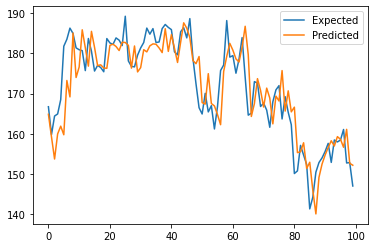

In [ ]:

# evaluate
mae, y, yhat = walk_forward_validation1(values, 100)
print('MAE: %.3f' % mae)
# plot expected vs preducted
pyplot.plot(y, label='Expected')
pyplot.plot(yhat, label='Predicted')
pyplot.legend()
pyplot.show()

for only one last training see the results

In [ ]:
# fit an xgboost model and make a one step prediction
def xgboost_forecast2(train, testX):
	# transform list into array
	train = asarray(train)
	# split into input and output columns
	trainX, trainy = train[:, :-1], train[:, -1]
	# fit model
	model = XGBRegressor(objective='reg:squarederror', n_estimators=1000)
	model.fit(trainX, trainy)
	# make a one-step prediction
	yhat = model.predict(asarray([testX]))
	return yhat[0]

# walk-forward validation for univariate data
def walk_forward_validation2(data, n_test):
	predictions = list()
	# split dataset
	train, test = train_test_split(data, n_test)
	# seed history with training dataset
	history = [x for x in train]
	# step over each time-step in the test set
	for i in range(len(test)-1):
		# split test row into input and output columns
		testX, testy = test[i, :-1], test[i, -1]
		# fit model on history and make a prediction
		# yhat = xgboost_forecast(history, testX)
		# store forecast in list of predictions
		# predictions.append(yhat)
		# add actual observation to history for the next loop
		history.append(test[i])
		# summarize progress
		# print('>expected=%.1f, predicted=%.1f' % (testy, yhat))
	# estimate prediction error
	testX, testy = test[len(test)-1, :-1], test[len(test)-1, -1]
	yhat = xgboost_forecast(history, testX)
	predictions.append(yhat)
	print('>expected=%.1f, predicted=%.1f' % (testy, yhat))
	# error = mean_absolute_error(test[:, -1], predictions)
	return test[:, -1], predictions


/usr/local/lib/python3.7/dist-packages/xgboost/core.py:613: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn("Use subset (sliced data) of np.ndarray is not recommended " +


>expected=147.0, predicted=153.4
MAE: 4.487


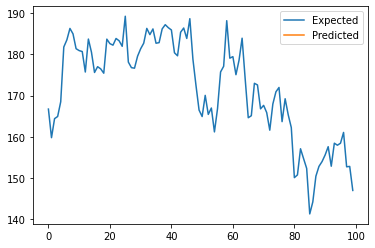

In [ ]:

# evaluate
y, yhat = walk_forward_validation2(values, 100)
print('MAE: %.3f' % mae)
# plot expected vs preducted
pyplot.plot(y, label='Expected')
pyplot.plot(yhat, label='Predicted')
pyplot.legend()
pyplot.show()

#test finishe

In [ ]:
stock_alphafinance.tail(10)

Date    QCOM     TSLA    NVDA    TAIT   INTC   AUDC    OLED   CSCO  \
749  2022-03-21  155.59   921.16  267.34  3.8500  47.39  27.24  164.62  56.00   
750  2022-03-22  157.61   993.98  265.24  3.8401  48.39  27.29  165.97  56.17   
751  2022-03-23  152.87   999.11  256.34  3.8500  48.27  26.91  162.56  54.48   
752  2022-03-24  158.46  1013.92  281.50  3.8908  51.62  26.65  169.35  54.50   
753  2022-03-25  157.97  1010.64  276.92  3.8700  51.83  26.22  168.70  54.97   
754  2022-03-28  158.45  1091.84  282.19  3.8900  51.51  25.93  169.73  55.14   
755  2022-03-29  161.07  1099.57  286.56  3.8200  52.25  26.36  175.55  55.67   
756  2022-03-30  152.73  1093.99  276.90  3.9100  51.43  25.63  169.62  56.05   
757  2022-03-31  152.82  1077.60  272.86  3.9100  49.56  25.55  166.95  55.76   
758  2022-04-01  146.99  1084.59  267.12  3.8600  48.11  25.34  167.39  55.66   

       MSFT  ...    WDC   ATVI    MKSI     TER     ADI    CCMP   MGIC   LOGI  \
749  299.16  ...  48.95  78.84  152.62  120.94  164.22  187.35  18.37  73.56   
750  304.06  ...  49.73  79.30  152.54  121.00  164.77  187.08  18.55  74.11   
751  299.49  ...  48.68  79.07  148.53  116.51  159.14  185.57  18.24  71.86   
752  304.10  ...  50.50  79.62  154.75  122.69  164.96  187.48  18.41  77.32   
753  303.68  ...  50.81  79.60  155.61  124.04  165.63  188.02  18.13  76.81   
754  310.70  ...  50.70  80.01  156.06  122.96  167.26  188.25  17.87  77.51   
755  315.41  ...  51.89  80.75  163.72  125.37  170.18  189.62  18.08  78.04   
756  313.86  ...  50.62  80.36  156.46  121.03  166.48  187.27  17.77  76.30   
757  308.31  ...  49.65  80.11  150.00  118.23  165.18  185.40  17.23  73.78   
758  309.42  ...  48.39  80.82  141.21  116.37  165.36  183.05  17.52  71.44   

       APWC    SWKS  
749  1.8100  134.54  
750  1.9499  137.52  
751  1.9100  133.30  
752  1.9300  138.43  
753  1.8500  138.00  
754  1.8899  137.06  
755  1.8900  140.29  
756  1.8200  136.40  
757  1.8200  133.28  
758  1.8100  132.03  

[10 rows x 36 columns]

# ARIMA

This cheat sheet demonstrates 11 different classical time series forecasting methods; they are:

Autoregression (AR) \
Moving Average (MA)\
Autoregressive Moving Average (ARMA)\
Autoregressive Integrated Moving Average (ARIMA)\
Seasonal Autoregressive Integrated Moving-Average (SARIMA)\
Seasonal Autoregressive Integrated Moving-Average with Exogenous Regressors (SARIMAX)\
Vector Autoregression (VAR)\
Vector Autoregression Moving-Average (VARMA)\\
Vector Autoregression Moving-Average with Exogenous Regressors (VARMAX)\
Simple Exponential Smoothing (SES)\\
Holt Winter’s Exponential Smoothing (HWES)\

(AR, MA) The method is suitable for univariate time series without trend and seasonal components\

Factors Influencing Forecasting\
Increasing or decreasing trends\
Seasonality\
Size of dataset\

image.png![image.png]()

In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
!pip install statsmodels

In [ ]:
# SARIMA example
from statsmodels.tsa.statespace.sarimax import SARIMAX
from random import random
# contrived dataset
data = [x + random() for x in range(1, 100)]
# fit model
model = SARIMAX(data, order=(1, 1, 1), seasonal_order=(0, 0, 0, 0))
model_fit = model.fit(disp=False)
# make prediction
yhat = model_fit.predict(len(data), len(data))
print(yhat)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


[100.64292925]


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize']= 10, 6

In [ ]:
dataset = pd.DataFrame()

In [ ]:
dataset['Date'] =stock_alphafinance['Date']
dataset['QCOM'] =stock_alphafinance['QCOM']
dataset.head(5)

Date   QCOM
0  2019-04-01  57.81
1  2019-04-02  58.09
2  2019-04-03  57.68
3  2019-04-04  57.86
4  2019-04-05  57.99

In [ ]:
indexedDataset = dataset.set_index(['Date'])
indexedDataset.head(5)

QCOM
Date             
2019-04-01  57.81
2019-04-02  58.09
2019-04-03  57.68
2019-04-04  57.86
2019-04-05  57.99

In [ ]:
#plot graph
plt.xlabel('Date')
plt.ylabel('closing price')
plt.plot(indexedDataset)

In [ ]:
rolmean = indexedDataset.rolling(window=240).mean()
rolstd = indexedDataset.rolling(window=240).std()
print(rolmean, rolstd)

                  QCOM
Date                  
2019-04-01         NaN
2019-04-02         NaN
2019-04-03         NaN
2019-04-04         NaN
2019-04-05         NaN
...                ...
2022-03-28  151.626500
2022-03-29  151.721750
2022-03-30  151.794583
2022-03-31  151.875500
2022-04-01  151.920500

[759 rows x 1 columns]                  QCOM
Date                 
2019-04-01        NaN
2019-04-02        NaN
2019-04-03        NaN
2019-04-04        NaN
2019-04-05        NaN
...               ...
2022-03-28  19.466451
2022-03-29  19.456454
2022-03-30  19.427231
2022-03-31  19.390703
2022-04-01  19.366667

[759 rows x 1 columns]


In [ ]:
#plot rolling statistics
orig = plt.plot(indexedDataset, color ='blue', label='Original')
mean = plt.plot(rolmean, color ='red', label='Rolling mean')
std = plt.plot(rolstd, color ='black', label='Rolling std')
plt.legend(loc ='best')
plt.title('rolling mean and standard deviation')
plt.show(block=False)

In [ ]:
#perform Dickey-fuller test
from statsmodels.tsa.stattools import adfuller

print('Restult of Dickey-fuller test:')
dftest = adfuller(indexedDataset['QCOM'], autolag = 'AIC')

dfoutput = pd.Series(dftest[0:4], index = ['Test statistic', 'p-value', '#lags used', '#of observation used'])
for key, value in dftest[4].items():
  dfoutput['Critical value(%s)'%key] = value
print(dfoutput)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Restult of Dickey-fuller test:
Test statistic           -1.125441
p-value                   0.704820
#lags used               13.000000
#of observation used    745.000000
Critical value(1%)       -3.439158
Critical value(5%)       -2.865427
Critical value(10%)      -2.568840
dtype: float64


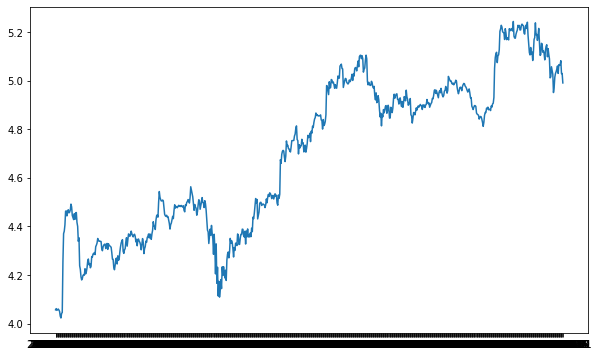

In [ ]:
# estimating trend
indexedDataset_logScale = np.log(indexedDataset)
plt.plot(indexedDataset_logScale)

In [ ]:
movingAverage  = indexedDataset_logScale.rolling(window=40).mean()
movingstd = indexedDataset_logScale.rolling(window=40).std()
plt.plot(indexedDataset_logScale)
plt.plot(movingAverage, color='red')
print(movingAverage, movingstd)

                QCOM
Date                
2019-04-01       NaN
2019-04-02       NaN
2019-04-03       NaN
2019-04-04       NaN
2019-04-05       NaN
...              ...
2022-03-28  5.098972
2022-03-29  5.096790
2022-03-30  5.093085
2022-03-31  5.087879
2022-04-01  5.082939

[759 rows x 1 columns]                 QCOM
Date                
2019-04-01       NaN
2019-04-02       NaN
2019-04-03       NaN
2019-04-04       NaN
2019-04-05       NaN
...              ...
2022-03-28  0.067931
2022-03-29  0.067016
2022-03-30  0.066570
2022-03-31  0.063035
2022-04-01  0.062733

[759 rows x 1 columns]


In [ ]:
indexedDataset_logScaleMinusMovingAverage = indexedDataset_logScale - movingAverage
indexedDataset_logScaleMinusMovingAverage.head(12)

indexedDataset_logScaleMinusMovingAverage.dropna(inplace=True)
indexedDataset_logScaleMinusMovingAverage.head(10)

QCOM
Date                
2019-05-28 -0.121427
2019-05-29 -0.118700
2019-05-30 -0.109571
2019-05-31 -0.109801
2019-06-03 -0.115737
2019-06-04 -0.093385
2019-06-05 -0.118215
2019-06-06 -0.113814
2019-06-07 -0.102629
2019-06-10 -0.081869

In [ ]:
# need to make data stationary, then predict the data

In [ ]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries, windows= 240):
  # Determing rolling statistics
  movingAverage  = timeseries.rolling(window=windows).mean()
  movingstd = timeseries.rolling(window=windows).std()

  #plot rolling statistics
  orig = plt.plot(timeseries, color ='blue', label='Original')
  mean = plt.plot(movingAverage, color ='red', label='Rolling mean')
  std = plt.plot(movingstd, color ='black', label='Rolling std')
  plt.legend(loc ='best')
  plt.title('rolling mean and standard deviation')
  plt.show(block=False)

  #perform Dickey-fuller test

  print('Restult of Dickey-fuller test:')
  dftest = adfuller(timeseries['QCOM'], autolag = 'AIC')

  dfoutput = pd.Series(dftest[0:4], index = ['Test statistic', 'p-value', '#lags used', '#of observation used'])
  for key, value in dftest[4].items():
    dfoutput['Critical value(%s)'%key] = value
  print(dfoutput)

In [ ]:
dfoutput

Test statistic           -1.125441
p-value                   0.704820
#lags used               13.000000
#of observation used    745.000000
Critical value(1%)       -3.439158
Critical value(5%)       -2.865427
Critical value(10%)      -2.568840
dtype: float64

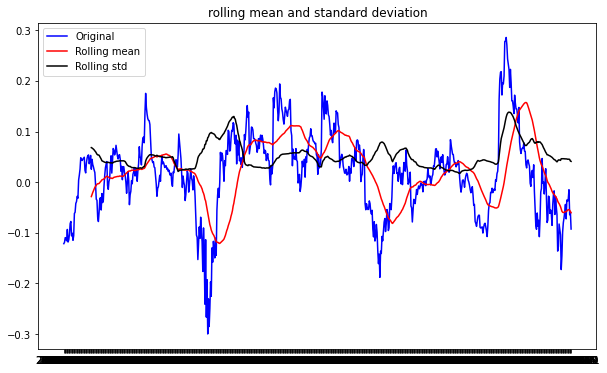

Restult of Dickey-fuller test:
Test statistic           -4.166928
p-value                   0.000749
#lags used               16.000000
#of observation used    703.000000
Critical value(1%)       -3.439686
Critical value(5%)       -2.865660
Critical value(10%)      -2.568964
dtype: float64


In [ ]:
test_stationarity(indexedDataset_logScaleMinusMovingAverage, 40)

Restult of Dickey-fuller test:
Test statistic           -1.645408
p-value                   0.459436
#lags used                1.000000
#of observation used    518.000000
Critical value(1%)       -3.443037
Critical value(5%)       -2.867136
Critical value(10%)      -2.569750
dtype: float64


Restult of Dickey-fuller test:
Test statistic           -1.645408
p-value                   0.459436
#lags used                1.000000
#of observation used    518.000000
Critical value(1%)       -3.443037
Critical value(5%)       -2.867136
Critical value(10%)      -2.569750
dtype: float64


Restult of Dickey-fuller test:
Test statistic           -1.645408
p-value                   0.459436
#lags used                1.000000
#of observation used    518.000000
Critical value(1%)       -3.443037
Critical value(5%)       -2.867136
Critical value(10%)      -2.569750
dtype: float64


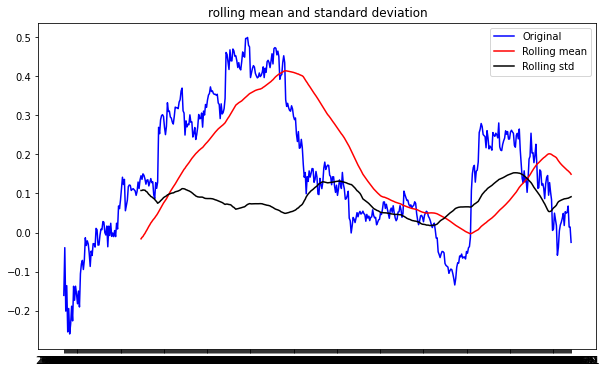

Restult of Dickey-fuller test:
Test statistic           -1.645408
p-value                   0.459436
#lags used                1.000000
#of observation used    518.000000
Critical value(1%)       -3.443037
Critical value(5%)       -2.867136
Critical value(10%)      -2.569750
dtype: float64


Restult of Dickey-fuller test:
Test statistic           -1.645408
p-value                   0.459436
#lags used                1.000000
#of observation used    518.000000
Critical value(1%)       -3.443037
Critical value(5%)       -2.867136
Critical value(10%)      -2.569750
dtype: float64


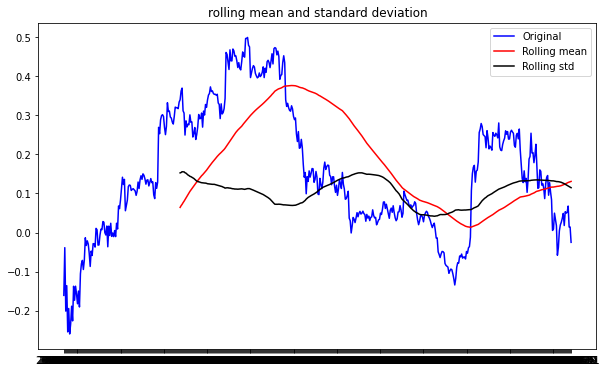

Restult of Dickey-fuller test:
Test statistic           -1.645408
p-value                   0.459436
#lags used                1.000000
#of observation used    518.000000
Critical value(1%)       -3.443037
Critical value(5%)       -2.867136
Critical value(10%)      -2.569750
dtype: float64


Restult of Dickey-fuller test:
Test statistic           -1.645408
p-value                   0.459436
#lags used                1.000000
#of observation used    518.000000
Critical value(1%)       -3.443037
Critical value(5%)       -2.867136
Critical value(10%)      -2.569750
dtype: float64


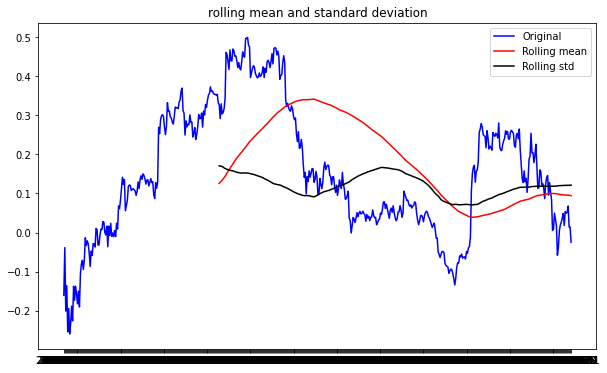

Restult of Dickey-fuller test:
Test statistic           -1.645408
p-value                   0.459436
#lags used                1.000000
#of observation used    518.000000
Critical value(1%)       -3.443037
Critical value(5%)       -2.867136
Critical value(10%)      -2.569750
dtype: float64


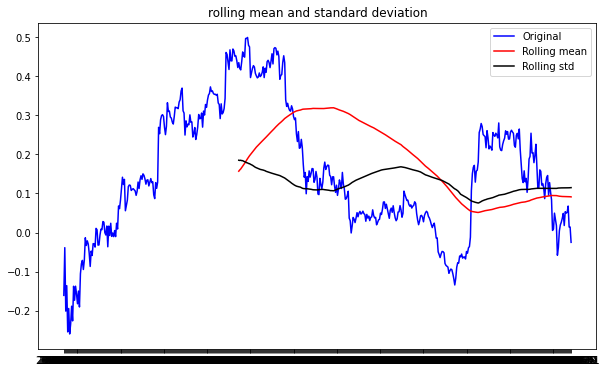

Restult of Dickey-fuller test:
Test statistic           -1.645408
p-value                   0.459436
#lags used                1.000000
#of observation used    518.000000
Critical value(1%)       -3.443037
Critical value(5%)       -2.867136
Critical value(10%)      -2.569750
dtype: float64


Restult of Dickey-fuller test:
Test statistic           -1.645408
p-value                   0.459436
#lags used                1.000000
#of observation used    518.000000
Critical value(1%)       -3.443037
Critical value(5%)       -2.867136
Critical value(10%)      -2.569750
dtype: float64


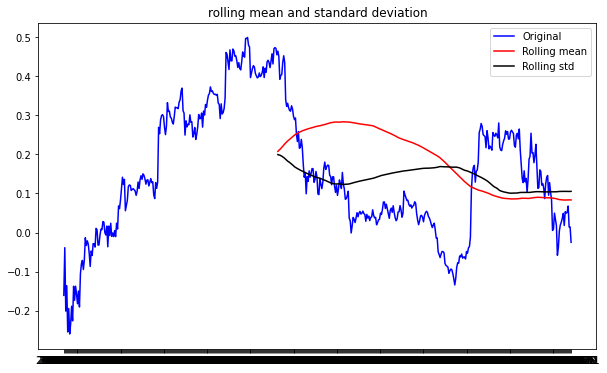

Restult of Dickey-fuller test:
Test statistic           -1.645408
p-value                   0.459436
#lags used                1.000000
#of observation used    518.000000
Critical value(1%)       -3.443037
Critical value(5%)       -2.867136
Critical value(10%)      -2.569750
dtype: float64


Restult of Dickey-fuller test:
Test statistic           -1.645408
p-value                   0.459436
#lags used                1.000000
#of observation used    518.000000
Critical value(1%)       -3.443037
Critical value(5%)       -2.867136
Critical value(10%)      -2.569750
dtype: float64


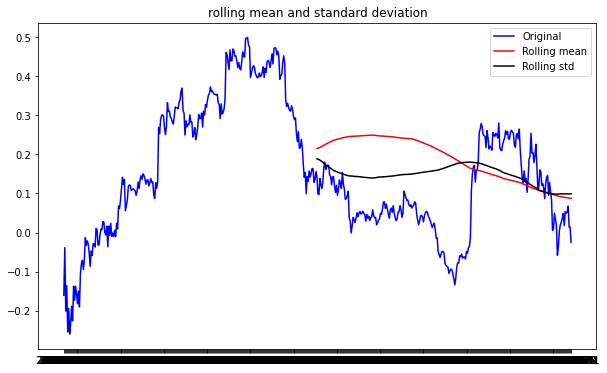

Restult of Dickey-fuller test:
Test statistic           -1.645408
p-value                   0.459436
#lags used                1.000000
#of observation used    518.000000
Critical value(1%)       -3.443037
Critical value(5%)       -2.867136
Critical value(10%)      -2.569750
dtype: float64


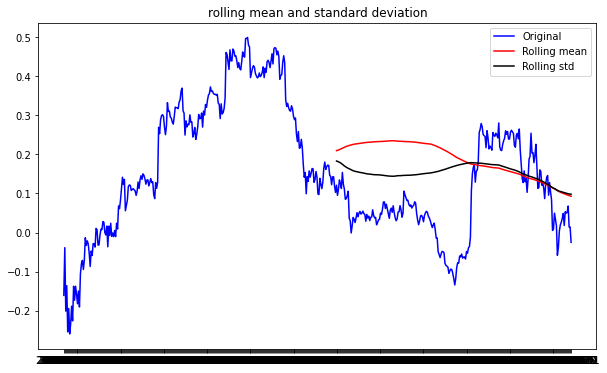

Restult of Dickey-fuller test:
Test statistic           -1.645408
p-value                   0.459436
#lags used                1.000000
#of observation used    518.000000
Critical value(1%)       -3.443037
Critical value(5%)       -2.867136
Critical value(10%)      -2.569750
dtype: float64


In [ ]:
for i in range(1, 15):
  test_stationarity(indexedDataset_logScaleMinusMovingAverage, i*20)

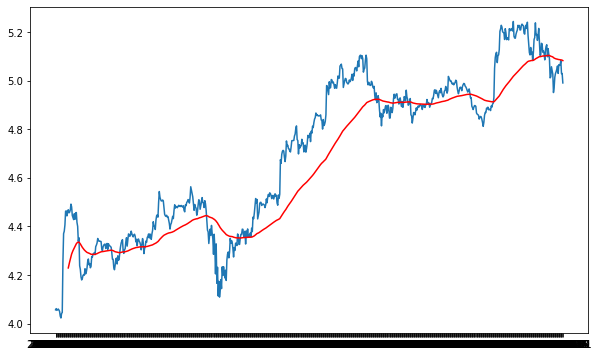

In [ ]:
exponentialDecayWeightedAverage = indexedDataset_logScale.ewm(halflife=40, min_periods=20, adjust=True).mean()
plt.plot(indexedDataset_logScale)
plt.plot(exponentialDecayWeightedAverage, color='red')

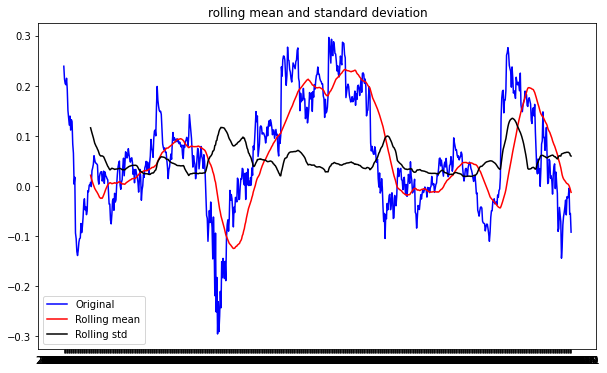

Restult of Dickey-fuller test:
Test statistic           -2.882419
p-value                   0.047431
#lags used                8.000000
#of observation used    731.000000
Critical value(1%)       -3.439327
Critical value(5%)       -2.865502
Critical value(10%)      -2.568880
dtype: float64


In [ ]:
DatasetlogScaleMinusMovingExponentialDecayAverage = indexedDataset_logScale -exponentialDecayWeightedAverage
DatasetlogScaleMinusMovingExponentialDecayAverage.dropna(inplace = True)
test_stationarity(DatasetlogScaleMinusMovingExponentialDecayAverage, 40)

DatasetlogScaleMinusMovingExponentialDecayAverage



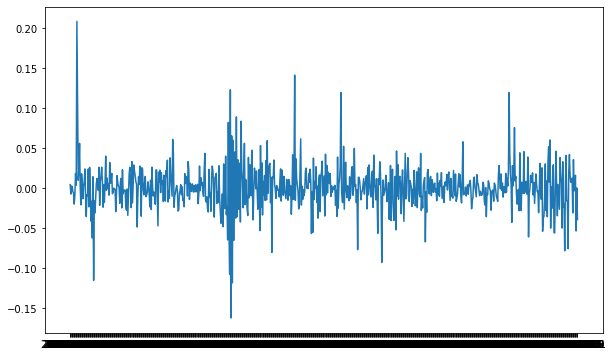

In [ ]:
datasetlogDiffshiting = indexedDataset_logScale - indexedDataset_logScale.shift()
plt.plot(datasetlogDiffshiting)

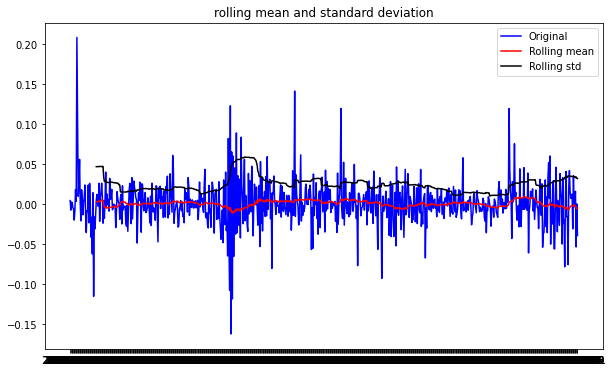

Restult of Dickey-fuller test:
Test statistic         -8.448062e+00
p-value                 1.691542e-13
#lags used              1.200000e+01
#of observation used    7.450000e+02
Critical value(1%)     -3.439158e+00
Critical value(5%)     -2.865427e+00
Critical value(10%)    -2.568840e+00
dtype: float64


In [ ]:
datasetlogDiffshiting.dropna(inplace=True)
test_stationarity(datasetlogDiffshiting, 40)

In [ ]:
indexedDataset_logScale.head(5)
indexedDataset_logScale1 = indexedDataset_logScale.copy()

In [ ]:
indexedDataset_logScale1.tail(10)

QCOM
Date                
2022-03-21  5.047224
2022-03-22  5.060124
2022-03-23  5.029588
2022-03-24  5.065502
2022-03-25  5.062405
2022-03-28  5.065439
2022-03-29  5.081839
2022-03-30  5.028672
2022-03-31  5.029261
2022-04-01  4.990365

In [ ]:
# from datetime import datetime
# indexedDataset_logScale1.index = pd.to_datetime(indexedDataset_logScale1.index)
# # Set the column 'Date' as index (skip if already done)
# ts_log = indexedDataset_logScale1.set_index('Date')
# Specify datetime frequency
indexedDataset_logScale1 = indexedDataset_logScale1.asfreq('D')

In [ ]:
indexedDataset_logScale1.index

Index(['2019-04-01', '2019-04-02', '2019-04-03', '2019-04-04', '2019-04-05',
       '2019-04-08', '2019-04-09', '2019-04-10', '2019-04-11', '2019-04-12',
       ...
       '2022-03-21', '2022-03-22', '2022-03-23', '2022-03-24', '2022-03-25',
       '2022-03-28', '2022-03-29', '2022-03-30', '2022-03-31', '2022-04-01'],
      dtype='object', name='Date', length=759)

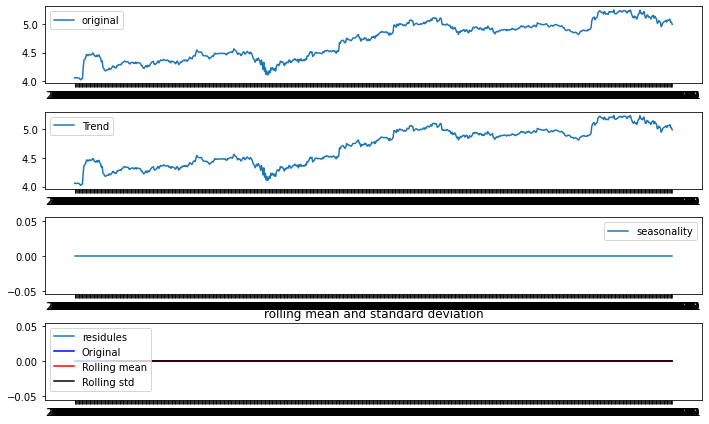

Restult of Dickey-fuller test:
Test statistic                 NaN
p-value                        NaN
#lags used                0.000000
#of observation used    758.000000
Critical value(1%)       -3.439006
Critical value(5%)       -2.865361
Critical value(10%)      -2.568804
dtype: float64


/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:867: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:1294: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse


In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(indexedDataset_logScale, freq=1)

trend = decomposition.trend
seasonal = decomposition.seasonal
residule = decomposition.resid

plt.subplot(411)
plt.plot(indexedDataset_logScale, label='original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(seasonal, label='seasonality')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(residule, label='residules')
plt.legend(loc='best')
plt.tight_layout()

decomposedLogData = residule
decomposedLogData.dropna(inplace= True)
test_stationarity(decomposedLogData, 40)

In [ ]:
datasetlogDiffshiting.dropna(inplace=True)

In [ ]:
# plot ACF and PACF
def plotACFnPACF(data, lags_):
  from statsmodels.tsa.stattools import acf, pacf

  lag_acf = acf(data, nlags = lags_)
  lag_pacf = pacf(data, nlags=lags_, method='ols')

  #plot ACF
  plt.subplot(121)
  plt.plot(lag_acf)
  plt.axhline(y=0, linestyle='--', color='gray')
  plt.axhline(y=-1.96/np.sqrt(len(data)), linestyle='--', color='gray')
  plt.axhline(y=1.96/np.sqrt(len(data)), linestyle='--', color='gray')
  plt.title('Autocorrelation Function')

  #plot PACF
  plt.subplot(122)
  plt.plot(lag_pacf)
  plt.axhline(y=0, linestyle='--', color='gray')
  plt.axhline(y=-1.96/np.sqrt(len(data)), linestyle='--', color='gray')
  plt.axhline(y=1.96/np.sqrt(len(data)), linestyle='--', color='gray')
  plt.title('partial autocorrelation Function')

  plt.tight_layout()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


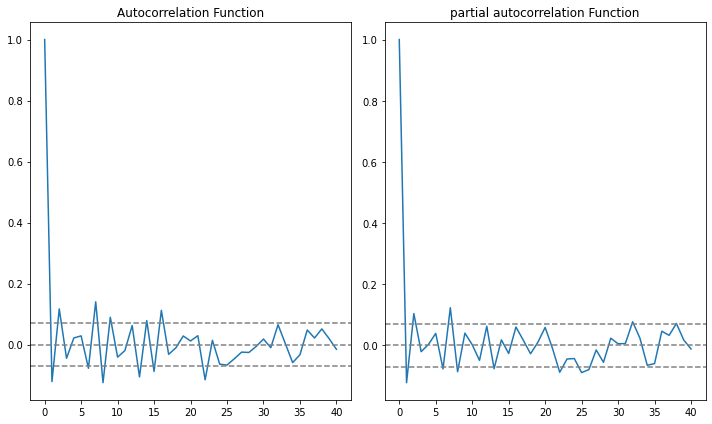

In [ ]:
# ACF and PACF plots
plotACFnPACF(datasetlogDiffshiting, 40)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


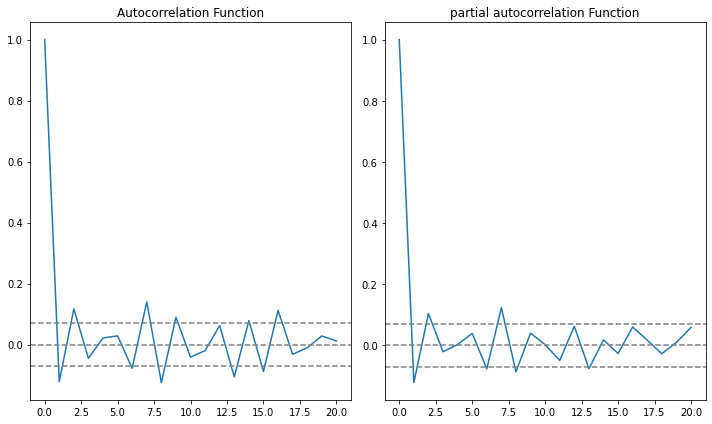

In [ ]:
plotACFnPACF(datasetlogDiffshiting, 20)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


PLoting MA model


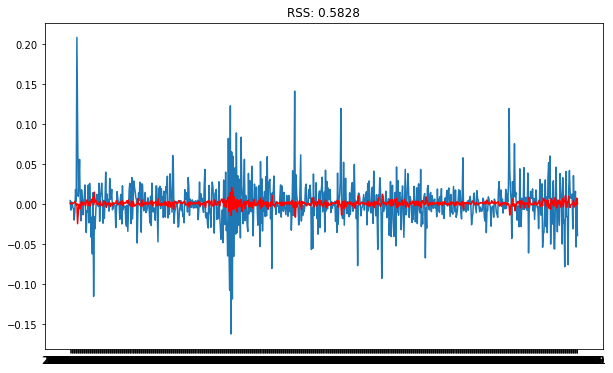

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

#AR model
model = ARIMA(indexedDataset_logScale, order =(1,1,0))
results_MA = model.fit(disp=-1)
plt.plot(datasetlogDiffshiting)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f' % sum((results_MA.fittedvalues-datasetlogDiffshiting['QCOM'])**2))
print('PLoting MA model')

In [ ]:
#AR model
model = ARIMA(indexedDataset_logScale, order =(0,1,1))
results_AR = model.fit(disp=-1)
plt.plot(datasetlogDiffshiting)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f' % sum((results_AR.fittedvalues-datasetlogDiffshiting['QCOM'])**2))
print('PLoting AR model')

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


PLoting AR model


In [ ]:
#ARIMA model
model = ARIMA(indexedDataset_logScale, order =(1,1,1))
results_ARIMA = model.fit(disp=-1)
plt.plot(datasetlogDiffshiting)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f' % sum((results_ARIMA.fittedvalues-datasetlogDiffshiting['QCOM'])**2))
print('PLoting ARIMA model')

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


PLoting ARIMA model


In [ ]:
datasetlogWDiffshiting = DatasetlogScaleMinusMovingExponentialDecayAverage - DatasetlogScaleMinusMovingExponentialDecayAverage.shift()
plt.plot(datasetlogWDiffshiting)

In [ ]:
#ARIMA model
model1 = ARIMA(DatasetlogScaleMinusMovingExponentialDecayAverage, order =(1,1,1))
results_ARIMA1 = model1.fit(disp=-1)
plt.plot(datasetlogWDiffshiting)
plt.plot(results_ARIMA1.fittedvalues, color='red')
plt.title('RSS: %.4f' % sum((results_ARIMA1.fittedvalues-datasetlogDiffshiting['QCOM'])**2))
print('PLoting ARIMA model')

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


PLoting ARIMA model


In [ ]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print(predictions_ARIMA_diff.head())

Date
2019-04-02    0.001236
2019-04-03    0.000744
2019-04-04    0.002514
2019-04-05    0.000455
2019-04-08    0.001438
dtype: float64


In [ ]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff_cumsum.head())

Date
2019-04-02    0.001236
2019-04-03    0.001980
2019-04-04    0.004494
2019-04-05    0.004950
2019-04-08    0.006388
dtype: float64


In [ ]:
type(indexedDataset_logScale['QCOM'])
indexedDataset_logScale['QCOM'].iloc[0]

4.057161771094385

In [ ]:
predictions_ARIMA_log = pd.Series(indexedDataset_logScale['QCOM'].iloc[0], index=indexedDataset_logScale.index)
predictions_ARIMA_log= predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum, fill_value=0)
predictions_ARIMA_log.head()

Date
2019-04-01    4.057162
2019-04-02    4.058398
2019-04-03    4.059142
2019-04-04    4.061656
2019-04-05    4.062111
dtype: float64

In [ ]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(indexedDataset)
plt.plot(predictions_ARIMA)

In [ ]:
indexedDataset_logScale.shape

(759, 1)

In [ ]:
num =759+ 3*20
results_ARIMA.plot_predict(1, num)


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


[source and code](https://www.machinelearningplus.com/time-series/arima-model-time-series-forecasting-python/) \
[reference](https://www.youtube.com/watch?v=e8Yw4alG16Q&t=1574s)

In [ ]:
results_ARIMA.forecast(steps=60)

(array([4.99799942, 4.99571157, 4.99888766, 4.99905503, 5.00087915,
        5.00179099, 5.00320517, 5.00434274, 5.00563262, 5.00683863,
        5.00809083, 5.00931759, 5.01055836, 5.01179142, 5.01302872,
        5.01426369, 5.01549994, 5.01673548, 5.01797142, 5.01920714,
        5.02044297, 5.02167875, 5.02291455, 5.02415034, 5.02538614,
        5.02662193, 5.02785773, 5.02909353, 5.03032932, 5.03156512,
        5.03280091, 5.03403671, 5.0352725 , 5.0365083 , 5.03774409,
        5.03897989, 5.04021568, 5.04145148, 5.04268727, 5.04392307,
        5.04515886, 5.04639466, 5.04763045, 5.04886625, 5.05010205,
        5.05133784, 5.05257364, 5.05380943, 5.05504523, 5.05628102,
        5.05751682, 5.05875261, 5.05998841, 5.0612242 , 5.06246   ,
        5.06369579, 5.06493159, 5.06616738, 5.06740318, 5.06863897]),
 array([0.0276199 , 0.03666329, 0.04497158, 0.0514432 , 0.05744541,
        0.06274677, 0.06770036, 0.07228109, 0.07660617, 0.08069045,
        0.08458263, 0.08830084, 0.09187005, 0.

# MCDM working alone on the data get the results

get tickers

In [ ]:
import pandas as pd
# names = pd.read_csv("fundamental.csv", delimiter=',')
names = pd.read_csv("fundamental.csv")
tickers = names['Symbol'].map(lambda x: str(x)[:-2])
tickers.head(3)
stocks_tickers = names[['Name', 'Symbol']]
stocks_tickers['Symbol']= stocks_tickers['Symbol'].map(lambda x: str(x)[:-2])
import pandas as pd

stocks_investing = pd.read_csv('initial_datafram.csv')
stocks_investing.drop(columns=['Unnamed: 0', 'Name'], inplace=True)

def remove_Nme_O(dataframe, cols):
   for col in cols:
     print(col)
     dataframe[col]= dataframe[col].map(lambda x: str(x)[:-2])
   return dataframe

stocks_investing = remove_Nme_O(stocks_investing, ['Symbol'])
stocks_investing.head(3)

In [ ]:
import pandas as pd
# names = pd.read_csv("fundamental.csv", delimiter=',')
names = pd.read_csv("fundamental.csv")
tickers = names['Symbol'].map(lambda x: str(x)[:-2])
tickers.head(3)

0    QCOM
1    TSLA
2    NVDA
Name: Symbol, dtype: object

In [ ]:
stocks_tickers = names[['Name', 'Symbol']]

In [ ]:
stocks_tickers['Symbol']= stocks_tickers['Symbol'].map(lambda x: str(x)[:-2])

<ipython-input-3-93247d238079>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stocks_tickers['Symbol']= stocks_tickers['Symbol'].map(lambda x: str(x)[:-2])


In [ ]:
import pandas as pd

stocks_investing = pd.read_csv('initial_datafram.csv')
stocks_investing.drop(columns=['Unnamed: 0', 'Name'], inplace=True)

def remove_Nme_O(dataframe, cols):
   for col in cols:
     print(col)
     dataframe[col]= dataframe[col].map(lambda x: str(x)[:-2])
   return dataframe

stocks_investing = remove_Nme_O(stocks_investing, ['Symbol'])
stocks_investing.head(3)

Symbol


Symbol    Market Cap       Revenue  Average Volume (3m)   EPS  P/E Ratio  \
0   QCOM  1.656600e+11  3.604000e+10           11174558.0  8.73      17.51   
1   TSLA  1.120000e+12  5.382000e+10           26651773.0  4.92     218.95   
2   NVDA  6.694000e+11  2.691000e+10           52702837.0  3.85      70.96   

   Beta    YTD  1 Year  3 Years  Weekly  Monthly  
0  1.20 -19.62    6.68   153.04       0        3  
1  2.08   2.63   63.90  1796.80       4        4  
2  1.42  -9.18   93.40   483.87       4        4

In [ ]:
stocks_yahoofinance_edited = pd.read_csv('f.csv')
stocks_yahoofinance_edited.drop(columns='Unnamed: 0', inplace=True)
stocks_yahoofinance_edited.head(3)  ## the same data produced after weekly and monthly

Symbol      alpha      beta  r-squared  share_ratio  treynor_ratio  \
0   MSFT  15.373278  1.146386  72.221726     1.035689       0.296125   
1    TXN   2.229937  1.152752  63.849428     0.576698       0.147027   
2   AAPL  26.139359  1.170133  63.274669     1.276991       0.429727   

        f_test     1 Year     2 Year     3 Year       YTD  Weekly  Monthly  
0  1968.151274  25.242038  43.930360  38.947371 -7.808102       2        1  
1  1337.019401  -5.313231  40.672222  21.948593 -2.750696       2        2  
2  1304.247583  39.274042  71.288121  55.283775 -1.710831       2        2

In [ ]:
###########################################################################
#      C. DM1 (investing.com) & DM2 (preprocess yahoofinance) consensus   #
###########################################################################
# In this sectiton we calculate score for each DM for each stock, the total
# score of the 2 DM's for each score (along with average, standard deviation)
# and we exclude more stocks if they are not under a specific STD threshold s.
# HERE we prefer s = 0.18, so every stock with s > 0.18 is excluded
##################################################################################
#   1. DM2 results combined (our own Beta, YTD, weekly, monthly recommendations) #
##################################################################################
# Step 1 : changstocks_investingcome index of DM1
# 1.1
tickers =  stocks_investing['Symbol']
stocks_investing.index = tickers
# 1.2
tickers_exclude = set(list(stocks_investing['Symbol'])) - set(list(stocks_yahoofinance_edited['Symbol']))
stocks_investing = stocks_investing.drop(index = tickers_exclude)
stocks_investing.shape

(18, 12)

In [ ]:
stocks_investing.drop(columns='Symbol', inplace= True)
stocks_investing.head(3)
stocks_investing = stocks_investing.reindex(stocks_yahoofinance_edited['Symbol'])
stocks_investing.head(3)

Market Cap       Revenue  Average Volume (3m)   EPS  P/E Ratio  \
Symbol                                                                     
MSFT    2.320000e+12  1.849000e+11           37557052.0  9.40      32.80   
TXN     1.680400e+11  1.834000e+10            6273342.0  8.26      22.20   
AAPL    2.840000e+12  3.783200e+11           93292683.0  6.02      28.99   

        Beta   YTD  1 Year  3 Years  Weekly  Monthly  
Symbol                                                
MSFT    0.90 -8.00   27.67   159.60       4        4  
TXN     0.95 -3.39   -5.20    65.11       4        4  
AAPL    1.18 -1.84   41.72   259.33       4        4

In [ ]:
# Step 2 : define the new DM2 Dataframe
stocks_yahoofinance_edited.index = stocks_investing.index
stock_investitngcom_row = stocks_investing.copy()
stocks_yahoofinance_edited2 = pd.DataFrame(columns = stocks_investing.columns, index = stocks_yahoofinance_edited.index )
for item in stocks_yahoofinance_edited.index:

  # Step 2.1 : select the respective rows froms invesing_com, and preprocessed yahoo finance
  # to update the values of beta, YTD, weekly, monthly based on ou finding from
  # the previous analysis

  stock_yahoofinance_row = stocks_yahoofinance_edited.loc[item].to_frame().transpose()
  stock_investitngcom_row = stocks_investing.loc[item].to_frame().transpose()

  # Step 2.3 : Update the values and append the new row in the new DM2 datatfame
  # change beta
  stock_investitngcom_row['Beta'] = stock_yahoofinance_row['beta']
  # change YTD
  stock_investitngcom_row['YTD'] = stock_yahoofinance_row['YTD']
  # change weekly
  stock_investitngcom_row['Weekly'] = stock_yahoofinance_row['Weekly']
  # change monthly
  stock_investitngcom_row['Monthly'] = stock_yahoofinance_row['Monthly']


  # stock_investitngcom_row = stock_investitngcom_row.convert_objects(convert_numeric = True)
  stocks_yahoofinance_edited2.loc[item] = stock_investitngcom_row.squeeze()
  # stocks_yahoofinance_edited2 = stocks_yahoofinance_edited2.convert_objects(convert_numeric = True)

stocks_yahoofinance_edited2.head(3)

Market Cap         Revenue Average Volume (3m)   EPS P/E Ratio  \
Symbol                                                                        
MSFT    2320000000000.0  184900000000.0          37557052.0   9.4      32.8   
TXN      168040000000.0   18340000000.0           6273342.0  8.26      22.2   
AAPL    2840000000000.0  378320000000.0          93292683.0  6.02     28.99   

            Beta       YTD 1 Year 3 Years Weekly Monthly  
Symbol                                                    
MSFT    1.146386 -7.808102  27.67   159.6      2       1  
TXN     1.152752 -2.750696   -5.2   65.11      2       2  
AAPL    1.170133 -1.710831  41.72  259.33      2       2

In [ ]:
########################
#   2. Normalization  # for MCDM THERE IS NO
########################

weights = [ 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09]

def normalization(dm, decision, weights):
  dm_normalized = dm.copy()
  fields = list(dm_normalized.columns.values)
  # Step 3: Final ranking for the stocks of the portfolio
  # Total sum per row:
  dm_normalized['DM' + str(decision)] = dm_normalized.sum(1)
  return dm_normalized

stocks_investingcom_normalized = normalization(stocks_investing,1, weights)
stocks_yahoofinance_normalized = normalization(stocks_yahoofinance_edited2,2,weights)

print(stocks_investingcom_normalized.head())
print(stocks_yahoofinance_normalized.head())

          Market Cap       Revenue  Average Volume (3m)    EPS  P/E Ratio  \
Symbol                                                                      
MSFT    2.320000e+12  1.849000e+11           37557052.0   9.40      32.80   
TXN     1.680400e+11  1.834000e+10            6273342.0   8.26      22.20   
AAPL    2.840000e+12  3.783200e+11           93292683.0   6.02      28.99   
AVGO    2.559800e+11  2.850000e+10            2583586.0  17.55      35.87   
CDW     2.399000e+10  2.082000e+10             912111.0   7.03      25.43   

        Beta    YTD  1 Year  3 Years  Weekly  Monthly           DM1  
Symbol                                                               
MSFT    0.90  -8.00   27.67   159.60       4        4  2.504938e+12  
TXN     0.95  -3.39   -5.20    65.11       4        4  1.863863e+11  
AAPL    1.18  -1.84   41.72   259.33       4        4  3.218413e+12  
AVGO    1.03  -5.78   31.73   106.89       4        4  2.844826e+11  
CDW     1.10 -13.18    4.93    79.11    

In [ ]:
#####################################
#   3. Combine scores of DM1, DM2   #
#####################################
# Step 4.1 : Calculate consensus & total % consensus
TH_con = 15
TH_std = 2
def consensus(data):
  return 100 - (100 * data['St. dev'] / TH_std)


# Step 1 : Combine DM1, DM2 scores
final = pd.merge(stocks_investingcom_normalized,stocks_yahoofinance_normalized, left_index=True, right_index=True )
final = final[['DM1','DM2']]
#display(final.head())

# Step 2.1 : Calculate total score
final['Total Score'] = final.sum(1)
#display(final.head())

# Step 2.2 : Rank stocks by total score (sorting)
final = final.sort_values('Total Score', ascending=False)
#display(final.head())


# Step 2.2 : Average of scores of DM1, DM2
final['Average'] = final[['DM1', 'DM2']].mean(1)
#display(final.head())


# Step 2.3 : Standard deviation of scores of DM1, DM2
final['St. dev'] = final[['DM1', 'DM2']].std(1)
final['Standard Consensus'] = final[['DM1', 'DM2', 'St. dev']].apply(consensus, axis = 1)
display(final)
#######################DROP STOCKS#######################
print(final)
TH_std = 2

# Step 3.1 : Droping stocks based on their bad total score
final = final[final['Total Score'] >= 0]

# Step 3.2 : Droping stocks based on the standard deviation threshold
final = final[final['St. dev'] <= TH_std]



# Step 4.2 : Droping stocks based on their bad consensus performance
TH_con = 15


final = final[final['Standard Consensus'] >= TH_con]
final = final.sort_values('Standard Consensus', ascending=False)
print(final.shape)
display(final)
print("Final Average Consensus for DM1, DM2 is : " + str(round(final['Standard Consensus'].mean(0), 2)) + "%")

# download consensus table
# final.to_csv('h.csv')
# create_download_link(filename = 'h.csv')

DM1           DM2   Total Score       Average   St. dev  \
Symbol                                                                     
AAPL    3.218413e+12  3.218413e+12  6.436827e+12  3.218413e+12  2.744527   
MSFT    2.504938e+12  2.504938e+12  5.009875e+12  2.504938e+12  3.225484   
TSLA    1.173847e+12  1.173847e+12  2.347693e+12  1.173847e+12  4.010276   
NVDA    6.963627e+11  6.963627e+11  1.392725e+12  6.963627e+11  2.014201   
AVGO    2.844826e+11  2.844826e+11  5.689652e+11  2.844826e+11  2.168881   
QCOM    2.017112e+11  2.017112e+11  4.034223e+11  2.017112e+11  0.999634   
TXN     1.863863e+11  1.863863e+11  3.727725e+11  1.863863e+11  2.233014   
INTU    1.482720e+11  1.482720e+11  2.965439e+11  1.482720e+11  2.987682   
EQIX    7.586047e+10  7.586047e+10  1.517209e+11  7.586047e+10  3.019273   
ATVI    7.192229e+10  7.192229e+10  1.438446e+11  7.192229e+10  2.761618   
CDW     4.481091e+10  4.481091e+10  8.962182e+10  4.481091e+10  1.148007   
TER     2.260206e+10  2.260206e+10  4.520411e+10  2.260206e+10  0.691982   
LOGI    1.767096e+10  1.767096e+10  3.534192e+10  1.767096e+10  2.080592   
ESLT    1.490005e+10  1.490005e+10  2.980010e+10  1.490005e+10  5.762688   
BRKR    1.222082e+10  1.222082e+10  2.444163e+10  1.222082e+10  1.384697   
SPNS    1.881110e+09  1.881110e+09  3.762220e+09  1.881110e+09  1.155433   
MGIC    1.340119e+09  1.340119e+09  2.680238e+09  1.340119e+09  1.788925   
AUDC    1.072558e+09  1.072558e+09  2.145117e+09  1.072558e+09  3.036641   

        Standard Consensus  
Symbol                      
AAPL            -37.226363  
MSFT            -61.274208  
TSLA           -100.513800  
NVDA             -0.710063  
AVGO             -8.444044  
QCOM             50.018288  
TXN             -11.650711  
INTU            -49.384076  
EQIX            -50.963672  
ATVI            -38.080898  
CDW              42.599634  
TER              65.400877  
LOGI             -4.029616  
ESLT           -188.134401  
BRKR             30.765136  
SPNS             42.228354  
MGIC             10.553750  
AUDC            -51.832028

                 DM1           DM2   Total Score       Average   St. dev  \
Symbol                                                                     
AAPL    3.218413e+12  3.218413e+12  6.436827e+12  3.218413e+12  2.744527   
MSFT    2.504938e+12  2.504938e+12  5.009875e+12  2.504938e+12  3.225484   
TSLA    1.173847e+12  1.173847e+12  2.347693e+12  1.173847e+12  4.010276   
NVDA    6.963627e+11  6.963627e+11  1.392725e+12  6.963627e+11  2.014201   
AVGO    2.844826e+11  2.844826e+11  5.689652e+11  2.844826e+11  2.168881   
QCOM    2.017112e+11  2.017112e+11  4.034223e+11  2.017112e+11  0.999634   
TXN     1.863863e+11  1.863863e+11  3.727725e+11  1.863863e+11  2.233014   
INTU    1.482720e+11  1.482720e+11  2.965439e+11  1.482720e+11  2.987682   
EQIX    7.586047e+10  7.586047e+10  1.517209e+11  7.586047e+10  3.019273   
ATVI    7.192229e+10  7.192229e+10  1.438446e+11  7.192229e+10  2.761618   
CDW     4.481091e+10  4.481091e+10  8.962182e+10  4.481091e+10  1.148007   
TER     2.26

DM1           DM2   Total Score       Average   St. dev  \
Symbol                                                                     
TER     2.260206e+10  2.260206e+10  4.520411e+10  2.260206e+10  0.691982   
QCOM    2.017112e+11  2.017112e+11  4.034223e+11  2.017112e+11  0.999634   
CDW     4.481091e+10  4.481091e+10  8.962182e+10  4.481091e+10  1.148007   
SPNS    1.881110e+09  1.881110e+09  3.762220e+09  1.881110e+09  1.155433   
BRKR    1.222082e+10  1.222082e+10  2.444163e+10  1.222082e+10  1.384697   

        Standard Consensus  
Symbol                      
TER              65.400877  
QCOM             50.018288  
CDW              42.599634  
SPNS             42.228354  
BRKR             30.765136

Final Average Consensus for DM1, DM2 is : 46.2%


In [ ]:
#######################################################
#      D. Apply TOPSIS, ELECTRE with veto, PROMETHE   #
#######################################################
# > In this sectiton we apply all the above metthodologies to reach a single (or a pool)
# of stocks
# > Depsite the use of our own data to conclude upon the DM2 values, for this section
# we will proceed with actual data we already have from a trust worthy source
# investing.com
stock_tickers = list(final.index)

# Step 1 :  Keep the 22 stocks
tickers_exclude = list(set(list(stocks_investing.index)) - set(stock_tickers))
stocks = stocks_investing.drop(tickers_exclude)
stocks = stocks.reindex(final.index)

# Step 2 :  Normalize again with different weights this time since our perspective
# have changed. In the previous setction we give greater weights to our risk metrics
# and YTD calculated by our own analysis so that we could have a fair enough DM2
# results.
# Market Cap : 2.5 %
# P/E Ratio: 10%
# Revenue: 15%
# Average Vol: 2.5%
# EPS: 15%
# Beta: 12.5%
# YTD: 10%
# 1 Year: 10%
# 3 Year: 2.5%
# Weekly: 12.5%
# Monthly: 7.5%
# weights = [ 0.025, 0.1, 0.15, 0.025, 0.15, 0.125, 0.1, 0.1, 0.025, 0.125, 0.075]
weights = [ 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09]
stocks_normalized = normalization(stocks,1,weights)
del stocks_normalized['DM1']
# del stocks_normalized['Name']
display(stocks)

Market Cap       Revenue  Average Volume (3m)   EPS  P/E Ratio  \
Symbol                                                                     
TER     1.890000e+10  3.700000e+09            2055816.0  5.52      21.41   
QCOM    1.656600e+11  3.604000e+10           11174558.0  8.73      17.51   
CDW     2.399000e+10  2.082000e+10             912111.0  7.03      25.43   
SPNS    1.420000e+09  4.610300e+08              79800.0  0.85      29.92   
BRKR    9.800000e+09  2.420000e+09             817105.0  1.81      35.47   

        Beta    YTD  1 Year  3 Years  Weekly  Monthly  
Symbol                                                 
TER     1.48 -28.84   -9.66   176.94       1        2  
QCOM    1.20 -19.62    6.68   153.04       0        3  
CDW     1.10 -13.18    4.93    79.11       2        4  
SPNS    1.37 -24.79  -19.73    67.27       0        2  
BRKR    1.23 -22.55    0.11    68.67       0        2

In [ ]:
stocks_tickers.head(3)

Name Symbol
0  Qualcomm Incorporated   QCOM
1              Tesla Inc   TSLA
2     NVIDIA Corporation   NVDA

# mcdm---could just start from here

two files, pd.read_csv("fundamental.csv") and pd.read_csv('initial_datafram.csv')

In [ ]:
import pandas as pd
# names = pd.read_csv("fundamental.csv", delimiter=',')
names = pd.read_csv("fundamental.csv")
tickers = names['Symbol'].map(lambda x: str(x)[:-2])
tickers.head(3)
stocks_tickers = names[['Name', 'Symbol']]
stocks_tickers['Symbol']= stocks_tickers['Symbol'].map(lambda x: str(x)[:-2])
import pandas as pd

stocks_investing = pd.read_csv('initial_datafram.csv')
stocks_investing.drop(columns=['Unnamed: 0', 'Name'], inplace=True)

def remove_Nme_O(dataframe, cols):
   for col in cols:
     print(col)
     dataframe[col]= dataframe[col].map(lambda x: str(x)[:-2])
   return dataframe

stocks_investing = remove_Nme_O(stocks_investing, ['Symbol'])
stocks_investing.head(3)

In [ ]:
import numpy as np


In [ ]:
stocks_normalized = stocks_investing.copy()

In [ ]:
stocks_normalized=stocks_normalized.set_index('Symbol')
print(stocks_normalized.shape)

(34, 11)


In [ ]:
print(stocks_normalized.head(3))

          Market Cap       Revenue  Average Volume (3m)   EPS  P/E Ratio  \
Symbol                                                                     
QCOM    1.656600e+11  3.604000e+10           11174558.0  8.73      17.51   
TSLA    1.120000e+12  5.382000e+10           26651773.0  4.92     218.95   
NVDA    6.694000e+11  2.691000e+10           52702837.0  3.85      70.96   

        Beta    YTD  1 Year  3 Years  Weekly  Monthly  
Symbol                                                 
QCOM    1.20 -19.62    6.68   153.04       0        3  
TSLA    2.08   2.63   63.90  1796.80       4        4  
NVDA    1.42  -9.18   93.40   483.87       4        4  


In [ ]:
##################
#   1. TOPSIS    #
##################
# 1. The basic principle of the TOPSIS method is that the chosen alternative
#    should have the shortest distance from the positive ideal solution (PIS)
#    and the farthest distance from the negative ideal solution (NIS). It is an
#    effective method to determine the total ranking order of decision alternatives.
# 2. TOPSIS method are used to derive the closeness coefficient and the outranking
#    index of each stock, respectively. Based on the closeness coefficient, the
#    outranking index, and selection threshold, we can easily obtain three type of
#    the investment ratio in accordance with different investment preference of final decision-maker.
#    It is a reasonable way in real decision environment

# Step 1 : Ideal and anti-ideal solutions
topsis_ideal = pd.DataFrame(index = ['Positive ideal solution','Negative ideal solution'], columns = list(stocks_normalized.columns))
topsis_ideal.loc['Positive ideal solution'] = stocks_normalized.max()
topsis_ideal.loc['Negative ideal solution'] = stocks_normalized.min()

# Step 2 : Calculation of the Separation Measures D+, D-. This step is about the calculation
# of the distances of each alternative from the ideal solution as:
#########################################
#                 _______________       #
#                | --                   #
#                | \               2    #
#        D_i* =  | /  (v_ij - v_j*)     #
#               \| --                   #
#                                       #
#########################################
#########################################
#                 _______________       #
#                | --                   #
#           _    | \             _ 2    #
#        D_i  =  | /  (v_ij - v_j )     #
#               \| --                   #
#                                       #
#########################################
stocks_topsis = stocks_normalized.copy()

# Step 2.1 : Calculate D+, D-
def D_plus(data):
  return np.sqrt( sum((data - topsis_ideal.loc['Positive ideal solution'])**2)  )

def D_minus(data):
  return np.sqrt( sum((data - topsis_ideal.loc['Negative ideal solution'])**2)  )

D_plus = stocks_topsis.apply(D_plus, axis = 1)
D_minus = stocks_topsis.apply(D_minus, axis = 1)


stocks_topsis['D_plus'] = D_plus
stocks_topsis['D_minus'] = D_minus


# Step 3 : Calculation of the Relative Closeness to the Ideal Solution
# The relative closeness C_i* is always between 0 and 1 and an alternative is
# best when it is closer to 1. It is calculated for each alternative and is defined as
#########################################
#                     _                 #
#                  D_i                  #
#                                       #
#        C_i* = ----------              #
#                         _             #
#               D_i* + D_i              #
#                                       #
#########################################
def C(data):
  return data['D_minus'] / (data['D_plus'] + data['D_minus'])

stocks_topsis['C_closeness'] =  stocks_topsis.apply(C, axis = 1)
display(stocks_topsis )
stocks_topsis.to_csv('stocks_topsis_cal.csv')
# Step 4 : Step 6. Ranking of the Preference Order Finally, the alternatives
# are ranked from best (higher relative closeness value) to worst.
# The best alternative and the solution to the problem is on the top of the list.
TH_topsis = 0.25
stocks_topsis = stocks_topsis.sort_values('C_closeness', ascending=False)
stocks_topsis = stocks_topsis[stocks_topsis['C_closeness'] >= TH_topsis]

display(stocks_topsis)
stocks_topsis.to_csv('stocks_topsis_res.csv')
# Step 5 :  Print company names we will invest in

companynames_topsis = [stocks_tickers.loc[stocks_tickers['Symbol'] == i, 'Name'].item() for i in list(stocks_topsis.index) ]
print("We will invest in the following companies :")
print(companynames_topsis)

display(stocks_normalized.loc[list(stocks_topsis.index)])
stocks_normalized.loc[list(stocks_topsis.index)].to_csv('MCDM_topsis.csv')

Market Cap       Revenue  Average Volume (3m)    EPS  P/E Ratio  \
Symbol                                                                      
QCOM    1.656600e+11  3.604000e+10           11174558.0   8.73      17.51   
TSLA    1.120000e+12  5.382000e+10           26651773.0   4.92     218.95   
NVDA    6.694000e+11  2.691000e+10           52702837.0   3.85      70.96   
TAIT    2.264000e+07  8.300000e+06              25981.0   0.39      10.00   
INTC    1.967100e+11  7.902000e+10           39732309.0   4.86      10.20   
AUDC    8.235000e+08  2.489300e+08             128310.0   1.00      25.65   
OLED    8.120000e+09  5.535300e+08             439057.0   3.87      43.19   
CSCO    2.312200e+11  5.155000e+10           22215344.0   2.80      19.94   
MSFT    2.320000e+12  1.849000e+11           37557052.0   9.40      32.80   
AAPL    2.840000e+12  3.783200e+11           93292683.0   6.02      28.99   
ALOT    1.096400e+08  1.172200e+08               8024.0   1.10      13.84   
GRMN    2.241000e+10  4.980000e+09            1316465.0   5.61      21.16   
ESLT    9.740000e+09  5.160000e+09              51816.0   7.55      29.18   
TXN     1.680400e+11  1.834000e+10            6273342.0   8.26      22.20   
EQIX    6.922000e+10  6.640000e+09             467181.0   5.54     133.97   
CDW     2.399000e+10  2.082000e+10             912111.0   7.03      25.43   
AVGO    2.559800e+11  2.850000e+10            2583586.0  17.55      35.87   
INTU    1.368600e+11  1.141000e+10            1957868.0   7.84      61.35   
SPNS    1.420000e+09  4.610300e+08              79800.0   0.85      29.92   
BRKR    9.800000e+09  2.420000e+09             817105.0   1.81      35.47   
IDCC    1.980000e+09  4.043800e+08             144313.0   1.02      62.48   
MNDO    5.876000e+07  2.618000e+07              42009.0   0.29      10.19   
EBIX    1.020000e+09  9.949400e+08             361722.0   2.22      14.93   
WSTG    1.475400e+08  3.453900e+08              13343.0   2.08      16.58   
CDK     5.730000e+09  1.730000e+09             722259.0   1.74      27.91   
WDC     1.514000e+10  1.894000e+10            3965286.0   6.34       7.83   
ATVI    6.311000e+10  8.800000e+09           12291522.0   3.44      23.26   
MKSI    7.840000e+09  2.950000e+09             539075.0   9.90      15.15   
TER     1.890000e+10  3.700000e+09            2055816.0   5.52      21.41   
ADI     8.654000e+10  8.440000e+09            3948652.0   3.17      52.06   
MGIC    8.597600e+08  4.803300e+08              29046.0   0.60      28.84   
LOGI    1.188000e+10  5.790000e+09             962413.0   4.44      16.61   
APWC    3.732000e+07  4.112300e+08              35869.0   0.01     167.59   
SWKS    2.135000e+10  5.110000e+09            1989565.0   8.32      16.01   

        Beta    YTD  1 Year  3 Years  Weekly  Monthly        D_plus  \
Symbol                                                                
QCOM    1.20 -19.62    6.68   153.04       0        3  2.696155e+12   
TSLA    2.08   2.63   63.90  1796.80       4        4  1.750343e+12   
NVDA    1.42  -9.18   93.40   483.87       4        4  2.198862e+12   
TAIT    1.33  -4.22  -15.16    29.97       3        2  2.865064e+12   
INTC    0.55  -6.58  -25.47   -11.50       0        0  2.660181e+12   
AUDC    0.58 -27.06   -8.55    61.50       0        1  2.864238e+12   
OLED    1.32   1.43  -29.71     4.75       4        2  2.856965e+12   
CSCO    0.94 -12.17    7.08     0.67       2        4  2.629166e+12   
MSFT    0.90  -8.00   27.67   159.60       4        4  5.548074e+11   
AAPL    1.18  -1.84   41.72   259.33       4        4  1.550322e+03   
ALOT    0.72  11.93   10.45   -29.13       4        3  2.864963e+12   
GRMN    1.03 -14.73  -12.38    31.57       0        1  2.842217e+12   
ESLT    0.79  26.33   52.76    63.33       4        4  2.854754e+12   
TXN     0.95  -3.39   -5.20    65.11       4        4  2.696100e+12   
EQIX    0.46  -9.79   12.54    65.71       4        4  2.795598e+12   
CDW     1.10 -13.18    4.93   

Market Cap       Revenue  Average Volume (3m)   EPS  P/E Ratio  \
Symbol                                                                     
AAPL    2.840000e+12  3.783200e+11           93292683.0  6.02      28.99   
MSFT    2.320000e+12  1.849000e+11           37557052.0  9.40      32.80   
TSLA    1.120000e+12  5.382000e+10           26651773.0  4.92     218.95   

        Beta   YTD  1 Year  3 Years  Weekly  Monthly        D_plus  \
Symbol                                                               
AAPL    1.18 -1.84   41.72   259.33       4        4  1.550322e+03   
MSFT    0.90 -8.00   27.67   159.60       4        4  5.548074e+11   
TSLA    2.08  2.63   63.90  1796.80       4        4  1.750343e+12   

             D_minus  C_closeness  
Symbol                             
AAPL    2.865064e+12     1.000000  
MSFT    2.327333e+12     0.807502  
TSLA    1.121269e+12     0.390467

We will invest in the following companies :
['Apple Inc', 'Microsoft Corporation', 'Tesla Inc']


Market Cap       Revenue  Average Volume (3m)   EPS  P/E Ratio  \
Symbol                                                                     
AAPL    2.840000e+12  3.783200e+11           93292683.0  6.02      28.99   
MSFT    2.320000e+12  1.849000e+11           37557052.0  9.40      32.80   
TSLA    1.120000e+12  5.382000e+10           26651773.0  4.92     218.95   

        Beta   YTD  1 Year  3 Years  Weekly  Monthly  
Symbol                                                
AAPL    1.18 -1.84   41.72   259.33       4        4  
MSFT    0.90 -8.00   27.67   159.60       4        4  
TSLA    2.08  2.63   63.90  1796.80       4        4

In [ ]:
#######################################
#   2. ELECTRE I with & without veto  #
#######################################
# Step 1 : Define the necessary DataFrames of agreement & disagreement
stocks_electreI = stocks_normalized.copy()
# del stocks_electreI['Name']

# Step 2 : Define veto thresholds. The veto thresholds express the power attributed to a given criteria to be against the assertion “a outranks b”, when
# the difference in the evaluation between g(b) and g(a) is greater than this threshold.
veto = [10000000000000000000000000, 15,10000000000000000000000000,10000000000000000000000000,5,0.6,25, 45,80,10000000000000000000000000,10000000000000000000000000]

eledctrI_agree = pd.DataFrame(index = stocks_electreI.index, columns = stocks_electreI.index)
eledctrI_disagree = eledctrI_agree.copy()
eledctrI_disagree_veto = eledctrI_agree.copy()

# Step 2 : Calculate agreement & disagreemnt table
# define delta for disagreement

c = stocks_electreI.max()
d = stocks_electreI.min()
delta = max(c - d)

weights = [ 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09]

for i in eledctrI_agree.columns:
  for j in eledctrI_agree.columns:
    a = stocks_electreI.loc[i]
    b = stocks_electreI.loc[j]
    # Step 2.1 : agreement cell calculation
    eledctrI_agree[j].loc[i] =  sum([ weights[i] for i in range(len((a-b))) if (a-b)[i] >=0 ])

    # Step 2.2 : disagreement cell calculation
    # with veto
    dis = (b - a) - veto
    dis_result = 1 if any(i >= 0 for i in dis) else 0
    eledctrI_disagree_veto[j].loc[i] = dis_result
    # without veto
    eledctrI_disagree[j].loc[i] = max(dis) / delta

display(eledctrI_agree)
display(eledctrI_disagree)
display(eledctrI_disagree_veto)


#display(eledctrI_agree)
#display(eledctrI_disagree_veto)

# Step 3.1.1 : FIND kernel after applying ELECTRE withtout veto
# Start with c = 1.0, d = 0 as initial threshold values for
# agreement and disagreement. Relaxing those thresholds until we
# include at least 5 stocks in our kernel
c = 1.0
d = 0.0

kernel = list(eledctrI_agree.columns)
changes = {}

for k in range(1000000000):
  length = len(kernel)
  for i in eledctrI_agree.columns:
    for j in eledctrI_agree.columns:
      if i == j: continue
      if(eledctrI_agree[j].loc[i]  >= c and eledctrI_disagree[j].loc[i] <= d):
        if j in kernel:
          kernel.remove(j)
  a = kernel.copy()
  if(len(kernel) < length): changes.update({(c,d):a})
  if(len(kernel) < 6): break
  c -= 0.01
  d += 0.01

# Step 3.1.2 :  Print company names we will invest in
companynames_electreI = [stocks_tickers.loc[stocks_tickers['Symbol'] == i, 'Name'].item() for i in kernel ]
print("Electre I withtout veto : We will invest in the following companies :")
print(companynames_electreI)
print()
print(changes)
print()
display(stocks_normalized.loc[kernel])
stocks_normalized.loc[kernel].to_csv('mcdmwithveto_res.csv')
# Step 3.2 : FIND kernel after applying ELECTRE withtout veto
kernel_veto = list(eledctrI_agree.columns)
changes_veto = {}
s = 1
for k in range(100000000):
  length = len(kernel_veto)
  for i in eledctrI_agree.columns:
    for j in eledctrI_agree.columns:
      if i == j: continue
      if(eledctrI_agree[j].loc[i]  >= s and eledctrI_disagree_veto[j].loc[i] == 0):
        if j in kernel_veto:
          kernel_veto.remove(j)
  a = kernel_veto.copy()
  if(len(kernel_veto) < length): changes_veto.update({(s):a})
  if(len(kernel_veto) < 6): break
  s -= 0.01


# Step 3.3.2 :  Print company names we will invest in
companynames_electreI = [stocks_tickers.loc[stocks_tickers['Symbol'] == i, 'Name'].item() for i in kernel_veto ]
print("Electre with veto : We will invest in the following companies :")
print(companynames_electreI)
print()
print(changes_veto)

display(stocks_normalized.loc[kernel_veto])
stocks_normalized.loc[kernel_veto].to_csv('mcdmveto_res.csv')

Symbol  QCOM  TSLA  NVDA  TAIT  INTC  AUDC  OLED  CSCO  MSFT  AAPL  ...   CDK  \
Symbol                                                              ...         
QCOM    0.99  0.09  0.18  0.72  0.63   0.9  0.63  0.27  0.09  0.18  ...  0.63   
TSLA     0.9  0.99  0.81  0.99  0.81  0.99  0.99  0.99  0.63  0.63  ...   0.9   
NVDA    0.81  0.36  0.99   0.9  0.72  0.99  0.81   0.9  0.63  0.54  ...   0.9   
TAIT    0.27     0  0.09  0.99  0.54  0.36  0.36  0.36  0.18  0.09  ...  0.18   
INTC    0.45  0.18  0.27  0.45  0.99  0.54  0.45  0.36  0.18     0  ...  0.45   
AUDC    0.18     0     0  0.63  0.54  0.99  0.18  0.18     0     0  ...  0.18   
OLED    0.36  0.09  0.27  0.72  0.54  0.81  0.99  0.54  0.36  0.36  ...  0.54   
CSCO    0.72  0.09  0.18  0.63  0.63  0.81  0.45  0.99  0.18  0.09  ...  0.63   
MSFT     0.9  0.54  0.54  0.81  0.81  0.99  0.72   0.9  0.99  0.36  ...  0.81   
AAPL    0.81  0.54  0.63   0.9  0.99  0.99  0.72  0.99  0.81  0.99  ...  0.81   
ALOT    0.36  0.18  0.18  0.72  0.54  0.54  0.36  0.27  0.18  0.18  ...  0.18   
GRMN    0.27  0.09  0.09  0.63  0.63  0.72  0.54  0.36  0.09     0  ...  0.45   
ESLT    0.45  0.36  0.36   0.9  0.72   0.9  0.72  0.63  0.36  0.54  ...  0.81   
TXN     0.45  0.27  0.36   0.9  0.72   0.9  0.72  0.63  0.36  0.27  ...  0.72   
EQIX    0.45  0.27  0.36  0.81  0.54   0.9  0.81  0.63  0.27  0.27  ...  0.72   
CDW     0.36  0.18  0.18  0.72  0.63   0.9  0.63  0.54  0.18  0.18  ...  0.63   
AVGO    0.63  0.27  0.45  0.81  0.81  0.99  0.72  0.81  0.63  0.36  ...  0.81   
INTU    0.36  0.09  0.09  0.72  0.63  0.99  0.72  0.45  0.18  0.18  ...  0.63   
SPNS    0.27     0     0  0.72  0.54  0.72  0.36  0.27  0.09  0.18  ...  0.27   
BRKR    0.27     0     0  0.72  0.54  0.99  0.54  0.27  0.18  0.18  ...  0.72   
IDCC    0.27     0     0  0.54  0.54  0.81  0.18  0.27  0.18  0.09  ...  0.27   
MNDO    0.27     0  0.09  0.63  0.54  0.45  0.27  0.27  0.09     0  ...  0.18   
EBIX    0.36  0.18  0.18   0.9  0.54  0.81  0.45  0.27  0.18  0.18  ...  0.27   
WSTG    0.45  0.18  0.27  0.81  0.63  0.72  0.36  0.45  0.45  0.18  ...  0.45   
CDK     0.45  0.27  0.27  0.81  0.54  0.81  0.54  0.45  0.36  0.36  ...  0.99   
WDC     0.18  0.09  0.18  0.45  0.45  0.63  0.45  0.18  0.09  0.18  ...  0.54   
ATVI    0.45  0.27  0.27  0.81  0.54  0.72  0.72  0.54  0.27  0.27  ...  0.72   
MKSI    0.36  0.09  0.18  0.72  0.54  0.72  0.63  0.27  0.18  0.18  ...  0.45   
TER     0.36  0.09  0.18  0.81  0.63  0.72  0.72  0.36  0.18  0.09  ...  0.54   
ADI     0.36  0.09  0.18  0.81  0.63   0.9  0.72  0.54  0.36  0.18  ...  0.72   
MGIC    0.45     0     0  0.81  0.54  0.81  0.36  0.36  0.09  0.09  ...  0.36   
LOGI    0.18     0  0.09  0.54  0.45  0.81  0.45  0.18     0     0  ...  0.45   
APWC    0.27     0  0.09  0.36  0.36  0.45  0.09  0.18  0.09  0.09  ...  0.09   
SWKS    0.18  0.09  0.09  0.54  0.54  0.72  0.54  0.27  0.09  0.09  ...  0.45   

Symbol   WDC  ATVI  MKSI   TER   ADI  MGIC  LOGI  APWC  SWKS  
Symbol                                                        
QCOM     0.9  0.54  0.72  0.63  0.72  0.63   0.9  0.81   0.9  
TSLA     0.9   0.9   0.9   0.9  0.99  0.99  0.99  0.99   0.9  
NVDA    0.81   0.9  0.81  0.81   0.9  0.99   0.9   0.9   0.9  
TAIT    0.54  0.18  0.36  0.27  0.18  0.27  0.45  0.63  0.45  
INTC    0.72  0.45  0.54  0.36  0.36  0.54  0.63  0.81  0.54  
AUDC    0.45  0.27  0.36  0.27  0.09  0.27  0.36  0.63  0.45  
OLED    0.54  0.36  0.45  0.36  0.36  0.72  0.54   0.9  0.45  
CSCO    0.81  0.54  0.72  0.63  0.45  0.63  0.81  0.81  0.72  
MSFT     0.9   0.9  0.81  0.81  0.72   0.9  0.99   0.9   0.9  
AAPL    0.81   0.9  0.81   0.9   0.9   0.9  0.99   0.9   0.9  
ALOT    0.45  0.27  0.36  0.36  0.36  0.36  0.36  0.54  0.36  
GRMN    0.63  0.27  0.63  0.36  0.09  0.54  0.72  0.81  0.54  
ESLT    0.63  0.63  0.72  0.63  0.54  0.81  0.54  0.81  0.63  
TXN     0.81  0.63  0.81  0.81  0.72  0.63   0.9   0.9  0.81  
EQIX    0.63  0.54  0.72  0.72  0.54  0.81  0.72  0.81  0.72  
CDW     0.81

Symbol      QCOM      TSLA      NVDA TAIT      INTC      AUDC      OLED  \
Symbol                                                                    
QCOM        -0.0  0.006261       0.0 -0.0  0.015134       0.0       0.0   
TSLA        -0.0      -0.0      -0.0 -0.0  0.008873      -0.0      -0.0   
NVDA    0.003215  0.009475      -0.0 -0.0  0.018349      -0.0      -0.0   
TAIT    0.012687  0.018948  0.009473 -0.0  0.027821  0.000085  0.000192   
INTC         0.0       0.0       0.0  0.0      -0.0       0.0       0.0   
AUDC    0.012603  0.018863  0.009388  0.0  0.027737      -0.0  0.000107   
OLED    0.012495  0.018756  0.009281 -0.0  0.027629      -0.0      -0.0   
CSCO         0.0  0.000799       0.0 -0.0  0.009673       0.0       0.0   
MSFT        -0.0       0.0       0.0 -0.0      -0.0      -0.0       0.0   
AAPL        -0.0       0.0       0.0 -0.0      -0.0      -0.0       0.0   
ALOT    0.012649   0.01891  0.009434  0.0  0.027783  0.000046  0.000154   
GRMN    0.010937  0.017197  0.007722 -0.0  0.026071      -0.0       0.0   
ESLT    0.010873  0.017134  0.007659 -0.0  0.026007      -0.0       0.0   
TXN     0.006232  0.012493  0.003018 -0.0  0.021366      -0.0       0.0   
EQIX    0.010352  0.016613  0.007137  0.0  0.025486      -0.0       0.0   
CDW     0.005359   0.01162  0.002144 -0.0  0.020493      -0.0       0.0   
AVGO    0.002655  0.008916       0.0 -0.0  0.017789      -0.0       0.0   
INTU    0.008673  0.014933  0.005458 -0.0  0.023807      -0.0       0.0   
SPNS    0.012528  0.018789  0.009313 -0.0  0.027662      -0.0  0.000033   
BRKR    0.011838  0.018099  0.008623 -0.0  0.026972      -0.0       0.0   
IDCC    0.012548  0.018808  0.009333 -0.0  0.027682      -0.0  0.000053   
MNDO    0.012681  0.018942  0.009466 -0.0  0.027815  0.000078  0.000186   
EBIX     0.01234  0.018601  0.009125 -0.0  0.027474       0.0       0.0   
WSTG    0.012569  0.018829  0.009354 -0.0  0.027703       0.0  0.000073   
CDK     0.012081  0.018342  0.008866 -0.0  0.027215      -0.0       0.0   
WDC     0.006021  0.012282  0.002806 -0.0  0.021155       0.0       0.0   
ATVI    0.009592  0.015852  0.006377  0.0  0.024726      -0.0       0.0   
MKSI    0.011652  0.017912  0.008437 -0.0  0.026785       0.0       0.0   
TER     0.011387  0.017648  0.008173 -0.0  0.026521      -0.0       0.0   
ADI     0.009718  0.015979  0.006504 -0.0  0.024852      -0.0      -0.0   
MGIC    0.012521  0.018782  0.009306 -0.0  0.027655      -0.0  0.000026   
LOGI    0.010651  0.016912  0.007437 -0.0  0.025785       0.0       0.0   
APWC    0.012545  0.018806  0.009331 -0.0  0.027679       0.0   0.00005   
SWKS    0.010891  0.017152  0.007676 -0.0  0.026025       0.0       0.0   

Symbol      CSCO      MSFT      AAPL  ...       CDK       WDC      ATVI  \
Symbol                                ...                                 
QCOM    0.005461  0.052416  0.120522  ...       0.0      -0.0       0.0   
TSLA        -0.0  0.046155  0.114261  ...      -0.0      -0.0      -0.0   
NVDA    0.008676  0.055631  0.123737  ...       0.0      -0.0       0.0   
TAIT    0.018149  0.065103  0.133209  ...  0.000606  0.006666  0.003096   
INTC         0.0  0.037282  0.105388  ...       0.0       0.0       0.0   
AUDC    0.018064  0.065019  0.133125  ...  0.000522  0.006581  0.003011   
OLED    0.017957  0.064911  0.133017  ...  0.000414  0.006474  0.002904   
CSCO        -0.0  0.046955  0.115061  ...       0.0       0.0       0.0   
MSFT        -0.0      -0.0  0.068106  ...       0.0       0.0       0.0   
AAPL        -0.0      -0.0      -0.0  ...      -0.0      -0.0      -0.0   
ALOT     0.01811  0.065065  0.133171  ...  0.000568  0.006628  0.003057   
GRMN    0.016398  0.063353  0.131459  ...       0.0  0.004916  0.001345   
ESLT    0.016335  0.063289  0.131395  ...      -0.0  0.004852  0.001282   
TXN     0.011694  0.058648  0.126755  ...       0.0  0.000211      -0.0   
EQIX    0.015814  0.062768  0.130874  ...       0.0  0.004331  0.000761   
CDW     0.010821  0.0577

Symbol QCOM TSLA NVDA TAIT INTC AUDC OLED CSCO MSFT AAPL  ... CDK WDC ATVI  \
Symbol                                                    ...                
QCOM      0    1    1    0    1    1    1    1    1    1  ...   1   0    1   
TSLA      0    0    0    0    1    0    0    0    1    1  ...   0   0    0   
NVDA      1    1    0    0    1    0    0    1    1    1  ...   1   0    1   
TAIT      1    1    1    0    1    1    1    1    1    1  ...   1   1    1   
INTC      1    1    1    1    0    1    1    1    1    1  ...   1   1    1   
AUDC      1    1    1    1    1    0    1    1    1    1  ...   1   1    1   
OLED      1    1    1    0    1    0    0    1    1    1  ...   1   1    1   
CSCO      1    1    1    0    1    1    1    0    1    1  ...   1   1    1   
MSFT      0    1    1    0    0    0    1    0    0    1  ...   1   1    1   
AAPL      0    1    1    0    0    0    1    0    0    0  ...   0   0    0   
ALOT      1    1    1    1    1    1    1    1    1    1  ...   1   1    1   
GRMN      1    1    1    0    1    0    1    1    1    1  ...   1   1    1   
ESLT      1    1    1    0    1    0    1    1    1    1  ...   0   1    1   
TXN       1    1    1    0    1    0    1    1    1    1  ...   1   1    0   
EQIX      1    1    1    1    1    0    1    1    1    1  ...   1   1    1   
CDW       1    1    1    0    1    0    1    1    1    1  ...   1   0    1   
AVGO      1    1    1    0    1    0    1    1    1    1  ...   0   0    1   
INTU      1    1    1    0    1    0    1    1    1    1  ...   1   1    1   
SPNS      1    1    1    0    1    0    1    1    1    1  ...   1   1    1   
BRKR      1    1    1    0    1    0    1    1    1    1  ...   1   1    1   
IDCC      1    1    1    0    1    0    1    1    1    1  ...   1   1    1   
MNDO      1    1    1    0    1    1    1    1    1    1  ...   1   1    1   
EBIX      1    1    1    0    1    1    1    1    1    1  ...   1   1    1   
WSTG      1    1    1    0    1    1    1    1    1    1  ...   1   1    1   
CDK       1    1    1    0    1    0    1    1    1    1  ...   0   1    1   
WDC       1    1    1    0    1    1    1    1    1    1  ...   1   0    1   
ATVI      1    1    1    1    1    0    1    1    1    1  ...   1   1    0   
MKSI      1    1    1    0    1    1    1    1    1    1  ...   1   1    1   
TER       1    1    1    0    1    0    1    1    1    1  ...   1   1    1   
ADI       1    1    1    0    1    0    0    1    1    1  ...   0   1    1   
MGIC      1    1    1    0    1    0    1    1    1    1  ...   1   1    1   
LOGI      1    1    1    0    1    1    1    1    1    1  ...   1   1    1   
APWC      1    1    1    0    1    1    1    1    1    1  ...   1   1    1   
SWKS      1    1    1    0    1    1    1    1    1    1  ...   1   1    1   

Symbol MKSI TER ADI MGIC LOGI APWC SWKS  
Symbol                                   
QCOM      0   0   1    1    0    1    0  
TSLA      0   0   0    0    0    0    0  
NVDA      0   0   0    0    0    1    0  
TAIT      1   1   1    1    1    1    1  
INTC      1   1   1    1    1    1    1  
AUDC      1   1   1    1    1    1    1  
OLED      1   1   1    1    1    1    1  
CSCO      0   1   1    1    0    1    0  
MSFT      0   0   1    0    0    1    0  
AAPL      0   0   1    0    0    1    0  
ALOT      1   1   1    1    1    1    1  
GRMN      0   1   1    1    1    1    1  
ESLT      1   1   1    0    1    1    0  
TXN       0   1   1    1    0    1    0  
EQIX      1   1   1    1    0    1    1  
CDW       0   1   1    0    0    1    0  
AVGO      0   0   1    0    0    1    0  
INTU      0   1   0    0    0    1    0  
SPNS      1   1   1    1    1    1    1  
BRKR      1   1   1    0    1    1    1  
IDCC      1   1   1    1    1    1    1  
MNDO      1   1   1    1    1    1    1  
EBIX      1   1   1    1    1    1    1  
WSTG      1   1   1    1    1    1    1  
CDK       1   1   1    1    1    1    1  
WDC       1   1   1    1    1    1    1  
ATVI      1   1

Electre I withtout veto : We will invest in the following companies :
['Tesla Inc', 'Apple Inc']

{(0.98, 0.02): ['QCOM', 'TSLA', 'NVDA', 'MSFT', 'AAPL', 'ESLT', 'TXN', 'EQIX', 'CDW', 'AVGO', 'INTU', 'EBIX', 'CDK', 'WDC', 'ATVI', 'MKSI', 'TER', 'SWKS'], (0.8899999999999999, 0.10999999999999999): ['TSLA', 'NVDA', 'MSFT', 'AAPL', 'ESLT', 'EBIX'], (0.8099999999999998, 0.19000000000000003): ['TSLA', 'AAPL']}



Market Cap       Revenue  Average Volume (3m)   EPS  P/E Ratio  \
Symbol                                                                     
TSLA    1.120000e+12  5.382000e+10           26651773.0  4.92     218.95   
AAPL    2.840000e+12  3.783200e+11           93292683.0  6.02      28.99   

        Beta   YTD  1 Year  3 Years  Weekly  Monthly  
Symbol                                                
TSLA    2.08  2.63   63.90  1796.80       4        4  
AAPL    1.18 -1.84   41.72   259.33       4        4

Electre with veto : We will invest in the following companies :
['Tesla Inc', 'Apple Inc']

{0.98: ['QCOM', 'TSLA', 'NVDA', 'MSFT', 'AAPL', 'ESLT', 'TXN', 'EQIX', 'CDW', 'AVGO', 'INTU', 'EBIX', 'CDK', 'WDC', 'ATVI', 'MKSI', 'TER', 'SWKS'], 0.8899999999999999: ['TSLA', 'NVDA', 'MSFT', 'AAPL', 'ESLT', 'EBIX'], 0.8099999999999998: ['TSLA', 'AAPL']}


Market Cap       Revenue  Average Volume (3m)   EPS  P/E Ratio  \
Symbol                                                                     
TSLA    1.120000e+12  5.382000e+10           26651773.0  4.92     218.95   
AAPL    2.840000e+12  3.783200e+11           93292683.0  6.02      28.99   

        Beta   YTD  1 Year  3 Years  Weekly  Monthly  
Symbol                                                
TSLA    2.08  2.63   63.90  1796.80       4        4  
AAPL    1.18 -1.84   41.72   259.33       4        4

In [ ]:
######################
#   3. PROMETTHEE    #
######################
stocks_promethee = stocks_normalized.copy()
promethee_flows = stocks_normalized.copy()
# del stocks_promethee['Name']
# del promethee_flows['Name']
# threshold of absolute preference, threshold of indifference and type for each criterion
p_q_type = {'Market Cap':(10**9, 10**11, 'typeV'), 'P/E Ratio': (15, 35,'typeV'), 'Revenue':(10**8, 10**10, 'typeV'), 'Average Volume (3m)':(10**7, 10**8, 'typeV'),
            'EPS':(1,6, 'typeV'), 'Beta':(0,0.6, 'typeV'), 'YTD':(5, 25, 'typeV'), '1 Year':(5, 45, 'typeV'), '3 Years':(10, 75,'typeV'), 'Weekly':(0,1,'typeI'), 'Monthly':(0,1,'typeI')}

def typeV(d, q, p):
  if(d <= q): return 0
  elif (d > p): return 1
  else: return (d - q)/ (p - q)

def typeI(d):
  return 1 if d > 0 else 0


for crit in stocks_promethee.columns:
  print(crit)
  promethee_preferences_crit = pd.DataFrame(index = stocks_promethee.index, columns = stocks_promethee.index)
  for i in promethee_preferences_crit.columns:
    for j in promethee_preferences_crit.columns:
      # Step 1 : Calculate the differences between the evaluations of the stocks on the specific criterion
      diff = stocks_promethee[crit].loc[j] - stocks_promethee[crit].loc[i]
      # Step 2 : Calculate pairwise comparison
      # Use as a criterion :  linear (type V) preference functions are best suited for quantitative criteria (e.g. prices, costs, power, ...)

      q,p,type_i = p_q_type[crit]

      if(type_i == 'typeV'):
        promethee_preferences_crit[j].loc[i] = typeV(diff, q, p)
      else:
        promethee_preferences_crit[j].loc[i] = typeI(diff)


  # Step 3 : Positive, negative, and net flows for the investment criterion
  length = len(promethee_preferences_crit) - 1
  promethee_preferences_crit['Positive Flow'] = promethee_preferences_crit.sum(1) / length
  promethee_preferences_crit['Negative Flow'] = promethee_preferences_crit.sum(0) / length
  promethee_preferences_crit['Net Flow'] = promethee_preferences_crit['Negative Flow'] - promethee_preferences_crit['Positive Flow']

  # Step 4 : Append flows for this criterion in the final dataframe
  promethee_flows[crit] =  promethee_preferences_crit['Net Flow']

display(promethee_flows)

# Step 5 : Calculate weighted global net flow
for i in promethee_flows.index:
  promethee_flows.loc[i] = promethee_flows.loc[i] * weights

promethee_flows['Net Flow'] = promethee_flows.sum(1)
promethee_flows = promethee_flows.sort_values('Net Flow', ascending = False)
display(promethee_flows)


# Step 6 :  Print company names we will invest in
kernel_promethee = list(promethee_flows.head(7).index)
companynames_promethee = [stocks_tickers.loc[stocks_tickers['Symbol'] == i, 'Name'].item() for i in kernel_promethee ]
print("We will invest in the following companies :")
print(companynames_promethee)
stocks_normalized.loc[kernel_promethee].to_csv('mcdmpromethee_res.csv')
display(stocks_normalized.loc[kernel_promethee])


Market Cap
Revenue
Average Volume (3m)
EPS
P/E Ratio
Beta
YTD
1 Year
3 Years
Weekly
Monthly


Market Cap   Revenue Average Volume (3m)       EPS P/E Ratio      Beta  \
Symbol                                                                          
QCOM     0.550367  0.686777           -0.043684  0.580727 -0.237636  0.180808   
TSLA     0.878788  0.794521            0.113211  0.067939       1.0  0.939899   
NVDA     0.818182  0.581604            0.389363 -0.102424  0.722227  0.485354   
TAIT     -0.41347 -0.539856           -0.072529  -0.54303  -0.31553  0.364141   
INTC     0.613649  0.878788            0.250248  0.058182 -0.312197 -0.740909   
AUDC    -0.409672 -0.525248           -0.072253 -0.482909 -0.196318 -0.710606   
OLED    -0.359856 -0.508294           -0.071416 -0.099212  0.180636  0.350505   
CSCO     0.676416  0.781237            0.065436 -0.264848  -0.22247 -0.224242   
MSFT     0.939394  0.939394             0.22681  0.642364 -0.099303 -0.286869   
AAPL          1.0       1.0            0.847294  0.242788 -0.160652  0.152525   
ALOT    -0.413044 -0.533467           -0.072577  -0.47297 -0.262939 -0.545455   
GRMN    -0.259384 -0.203065             -0.0691  0.176667 -0.216561 -0.080303   
ESLT    -0.349075 -0.191465           -0.072459   0.45903 -0.158348 -0.450505   
TXN      0.555583  0.438996           -0.058758  0.536061 -0.213409 -0.208586   
EQIX      0.09401 -0.088648            -0.07134  0.165636  0.880879 -0.825253   
CDW      -0.24839  0.484542           -0.070142  0.394303 -0.198318  0.030808   
AVGO     0.715424  0.609703           -0.066212       1.0 -0.032773 -0.080303   
INTU     0.478274  0.229017           -0.067589  0.492727  0.643909  0.030808   
SPNS     -0.40654 -0.513387           -0.072384 -0.496545 -0.149379  0.418687   
BRKR    -0.348671 -0.381455           -0.070398 -0.399212 -0.041864  0.223232   
IDCC    -0.403198 -0.516359            -0.07221  -0.48103  0.659318 -0.080303   
MNDO    -0.413293 -0.538789           -0.072486  -0.55303 -0.312364 -0.378788   
EBIX    -0.408782 -0.479286           -0.071624  -0.34697 -0.253955  0.994949   
WSTG    -0.412859 -0.519573           -0.072563 -0.366061 -0.243955 -0.408081   
CDK     -0.376409  -0.42942           -0.070653 -0.407212 -0.172758  0.180808   
WDC     -0.310955  0.450627           -0.063421   0.29297 -0.351803  0.655556   
ATVI     0.046416  0.063601           -0.034062 -0.167333 -0.209545  -0.75101   
MKSI    -0.361741 -0.344755           -0.071147  0.688606 -0.252621  0.510606   
TER     -0.283945 -0.292566           -0.067358  0.162485 -0.215803  0.557071   
ADI      0.236538  0.037767           -0.063455 -0.209818  0.459879  0.015152   
MGIC    -0.409505 -0.512382            -0.07252 -0.521394  -0.16247  0.377778   
LOGI    -0.334291 -0.147877           -0.070006 -0.007636 -0.243773 -0.348485   
APWC    -0.413398 -0.516003           -0.072502 -0.580727  0.937303 -0.348485   
SWKS    -0.266559 -0.194678           -0.067514  0.541879 -0.247409 -0.000505   

             YTD    1 Year   3 Years    Weekly   Monthly  
Symbol                                                    
QCOM   -0.358091  0.091644   0.67235 -0.606061  0.090909  
TSLA    0.348833  0.877152       1.0  0.606061  0.636364  
NVDA   -0.035485  0.984955  0.939394  0.606061  0.636364  
TAIT    0.110379 -0.308439 -0.294737  0.121212  -0.30303  
INTC    0.037636 -0.495144 -0.694294 -0.606061 -0.909091  
AUDC   -0.599758 -0.190189  0.017711 -0.606061 -0.666667  
OLED    0.303152  -0.56325 -0.569809  0.606061  -0.30303  
CSCO   -0.120636  0.098311 -0.604462       0.0  0.636364  
MSFT    -0.00303  0.479727  0.686862  0.606061  0.636364  
AAPL    0.190773  0.683826  0.869315  0.606061  0.636364  
ALOT    0.679364  0.158068 -0.779562  0.606061  0.090909  
GRMN   -0.197758 -0.259568 -0.278326 -0.606061 -0.666667  
ESLT    0.915939  0.807545  0.029828  0.606061  0.636364  
TXN     0.138485 -0.128015  0.041524  0.606061  0.636364  
EQIX   -0.052894  0.197606  0.045441  0.606061  0.636364  
CDW    -0.151348  0.061015  0.127981       0.0  0.636364  
AVGO    0.061409  0.545909  

Market Cap   Revenue Average Volume (3m)       EPS P/E Ratio      Beta  \
Symbol                                                                          
TSLA     0.079091  0.071507            0.010189  0.006115      0.09  0.084591   
AAPL         0.09      0.09            0.076256  0.021851 -0.014459  0.013727   
NVDA     0.073636  0.052344            0.035043 -0.009218     0.065  0.043682   
MSFT     0.084545  0.084545            0.020413  0.057813 -0.008937 -0.025818   
AVGO     0.064388  0.054873           -0.005959      0.09  -0.00295 -0.007227   
TXN      0.050002   0.03951           -0.005288  0.048245 -0.019207 -0.018773   
ESLT    -0.031417 -0.017232           -0.006521  0.041313 -0.014251 -0.040545   
INTU     0.043045  0.020612           -0.006083  0.044345  0.057952  0.002773   
QCOM     0.049533   0.06181           -0.003932  0.052265 -0.021387  0.016273   
EQIX     0.008461 -0.007978           -0.006421  0.014907  0.079279 -0.074273   
ADI      0.021288  0.003399           -0.005711 -0.018884  0.041389  0.001364   
CDW     -0.022355  0.043609           -0.006313  0.035487 -0.017849  0.002773   
ATVI     0.004177  0.005724           -0.003066  -0.01506 -0.018859 -0.067591   
CSCO     0.060877  0.070311            0.005889 -0.023836 -0.020022 -0.020182   
WSTG    -0.037157 -0.046762           -0.006531 -0.032945 -0.021956 -0.036727   
CDK     -0.033877 -0.038648           -0.006359 -0.036649 -0.015548  0.016273   
EBIX     -0.03679 -0.043136           -0.006446 -0.031227 -0.022856  0.089545   
TER     -0.025555 -0.026331           -0.006062  0.014624 -0.019422  0.050136   
OLED    -0.032387 -0.045746           -0.006427 -0.008929  0.016257  0.031545   
ALOT    -0.037174 -0.048012           -0.006532 -0.042567 -0.023665 -0.049091   
MKSI    -0.032557 -0.031028           -0.006403  0.061975 -0.022736  0.045955   
INTC     0.055228  0.079091            0.022522  0.005236 -0.028098 -0.066682   
MGIC    -0.036855 -0.046114           -0.006527 -0.046925 -0.014622     0.034   
TAIT    -0.037212 -0.048587           -0.006528 -0.048873 -0.028398  0.032773   
SWKS     -0.02399 -0.017521           -0.006076  0.048769 -0.022267 -0.000045   
BRKR     -0.03138 -0.034331           -0.006336 -0.035929 -0.003768  0.020091   
WDC     -0.027986  0.040556           -0.005708  0.026367 -0.031662     0.059   
GRMN    -0.023345 -0.018276           -0.006219    0.0159  -0.01949 -0.007227   
SPNS    -0.036589 -0.046205           -0.006515 -0.044689 -0.013444  0.037682   
LOGI    -0.030086 -0.013309           -0.006301 -0.000687  -0.02194 -0.031364   
IDCC    -0.036288 -0.046472           -0.006499 -0.043293  0.059339 -0.007227   
MNDO    -0.037196 -0.048491           -0.006524 -0.049773 -0.028113 -0.034091   
APWC    -0.037206  -0.04644           -0.006525 -0.052265  0.084357 -0.031364   
AUDC     -0.03687 -0.047272           -0.006503 -0.043462 -0.017669 -0.063955   

             YTD    1 Year   3 Years    Weekly   Monthly  Net Flow  
Symbol                                                              
TSLA    0.031395  0.078944      0.09  0.054545  0.057273  0.653649  
AAPL     0.01717  0.061544  0.078238  0.054545  0.057273  0.546146  
NVDA   -0.003194  0.088646  0.084545  0.054545  0.057273  0.542303  
MSFT   -0.000273  0.043175  0.061818  0.054545  0.057273  0.429100  
AVGO    0.005527  0.049132   0.03251  0.054545  0.057273  0.392113  
TXN     0.012464 -0.011521  0.003737  0.054545  0.057273  0.210987  
ESLT    0.082435  0.072679  0.002684  0.054545  0.057273  0.200962  
INTU   -0.047422  0.034814  0.012362 -0.010909  0.008182  0.159669  
QCOM   -0.032228  0.008248  0.060511 -0.054545  0.008182  0.144730  
EQIX    -0.00476  0.017785   0.00409  0.054545  0.057273  0.142907  
ADI     0.005145  0.002637 -0.004385  0.054545  0.008182  0.108970  
CDW    -0.013621  0.005491  0.011518       0.0  0.057273  0.096013  
ATVI    0.078945 -0.028169   0.00684  0.054545  0.057273  0.074761  
CSCO   -0.010857  0.008848 -0.054402       0.0  0.05727

We will invest in the following companies :
['Tesla Inc', 'Apple Inc', 'NVIDIA Corporation', 'Microsoft Corporation', 'Broadcom Inc', 'Texas Instruments Incorporated', 'Elbit Systems Ltd']


Market Cap       Revenue  Average Volume (3m)    EPS  P/E Ratio  \
Symbol                                                                      
TSLA    1.120000e+12  5.382000e+10           26651773.0   4.92     218.95   
AAPL    2.840000e+12  3.783200e+11           93292683.0   6.02      28.99   
NVDA    6.694000e+11  2.691000e+10           52702837.0   3.85      70.96   
MSFT    2.320000e+12  1.849000e+11           37557052.0   9.40      32.80   
AVGO    2.559800e+11  2.850000e+10            2583586.0  17.55      35.87   
TXN     1.680400e+11  1.834000e+10            6273342.0   8.26      22.20   
ESLT    9.740000e+09  5.160000e+09              51816.0   7.55      29.18   

        Beta    YTD  1 Year  3 Years  Weekly  Monthly  
Symbol                                                 
TSLA    2.08   2.63   63.90  1796.80       4        4  
AAPL    1.18  -1.84   41.72   259.33       4        4  
NVDA    1.42  -9.18   93.40   483.87       4        4  
MSFT    0.90  -8.00   27.67   159.60       4        4  
AVGO    1.03  -5.78   31.73   106.89       4        4  
TXN     0.95  -3.39   -5.20    65.11       4        4  
ESLT    0.79  26.33   52.76    63.33       4        4

# stock price prediction experiments

In [ ]:
from numpy import asarray
from pandas import DataFrame
from pandas import concat
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import numpy as np
import pandas as pd


In [ ]:
# https://machinelearningmastery.com/time-series-forecasting-methods-in-python-cheat-sheet/
# AR example
from statsmodels.tsa.ar_model import AutoReg
from random import random
from statsmodels.tsa.arima.model import ARIMA

from statsmodels.tsa.statespace.sarimax import SARIMAX
# VAR example
from statsmodels.tsa.vector_ar.var_model import VAR
# VARMA example
from statsmodels.tsa.statespace.varmax import VARMAX

In [ ]:
def load_data_yahoo():
    stock_alphafinance = pd.read_csv('/content/stocks_yahoofinance.csv')
    stock_alphafinance = stock_alphafinance.set_index('Date')

    stocks_alphafinance_edited = pd.read_csv('/content/stocks_yahoofinance_edited.csv')
    print(stocks_alphafinance_edited.index)
    print(stocks_alphafinance_edited.shape)
    return stock_alphafinance, stocks_alphafinance_edited

In [ ]:
# Step 2 :
def predict_time_mixed(Symbols_, stocks_finance, storcks_edits):
    ptr = 0
    MAEall = [0] * storcks_edits.shape[0]
    preds = {}
    trueYs = {}

    for item in Symbols_:
        # print(item)
        # Step 2.0 :  fix random seed for reproducibility
        np.random.seed(7)
        # print('here is predict company ', item)
        # Step 2.1 : load data (adjusted closed prices) & normalize
        data = stocks_finance[item].values
        scaledata = MinMaxScaler(feature_range=(0, 1))
        data = data.astype('float32')
        # print('star', data)
        data = data.reshape(-1, 1)
        resdata = scaledata.fit_transform(data)

        # model = AutoReg(resdata, lags=7)
        # model_fit = model.fit()
        model = SARIMAX(data, order=(1, 1, 1), seasonal_order=(0, 0, 0, 0))
        model_fit = model.fit(disp=False)

        predss = model_fit.predict((len(data)-49), len(data))

        predictions = np.array(predss)

        predictions = predictions.reshape(-1, 1)
        predictions = scaledata.inverse_transform(predictions)
        # print('sestar', data)
        mae = mean_absolute_error(predictions, data[-50:])


        # print('MAE: %.3f' % mae)
        preds[item] = predictions
        trueYs[item] = data[-50:]
        MAEall[ptr] = mae
        ptr += 1
    return MAEall, preds, trueYs


In [ ]:
if __name__ == '__main__':
    import time
    start = time.time()
    print("The time used to execute this is given below")
    stock_alphafinance, stocks_alphafinance_edited = load_data_yahoo()

    MAEall, preds, trueYs = predict_time_mixed(
        stocks_alphafinance_edited['Ticker'], stock_alphafinance, stocks_alphafinance_edited)  #
    print(MAEall)
    import pickle
    file = open(b"SARIMAX.pkl",'wb')
    pickle.dump( MAEall, file)

The time used to execute this is given below
RangeIndex(start=0, stop=18, step=1)
(18, 11)


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


[67352.05302011094, 19072.09333388125, 23156.32040266825, 301328.14361370774, 23087.534700638684, 248446.45405079055, 73495.71889621936, 3977.114502579003, 14952.559382350322, 22164.64651791987, 317942.97402270633, 664.0944090866251, 324.3806143979271, 24328.215531078604, 7882.518097568369, 1077559.1731162136, 810.0556914573953, 4904.725676307931]


###LSTM

In [ ]:
import numpy as np
import pandas as pd
##########################################
#   7. LSTM & Stock movement prediciton  #
##########################################
# Step 1 : import necessary libraries
import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Flatten
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)


def LSTM_model(batch_size, look_back):
  model = Sequential()
  model.add(  LSTM(4, batch_input_shape = (batch_size, look_back, 1), stateful = True, return_sequences = True)  )
  model.add(  LSTM(4, batch_input_shape = (batch_size, look_back, 1), stateful = True)  )
  model.add( Dense(1) )
  model.compile(Adam(lr=0.01), loss='mean_squared_error')
  return model

In [ ]:
# Step 2 :
def predict_weekMonthly(Symbols_, stocks_finance, storcks_edits, test_size_monthly = 27,
    test_size_weekly = 9, look_back = 10, epoche = 1, batch_size=1):
  ptr = 0

  MAEall = [0] * storcks_edits.shape[0]
  for item in Symbols_:
    # Step 2.0 :  fix random seed for reproducibility
    numpy.random.seed(7)

    # Step 2.1 : load data (adjusted closed prices) & normalize
    data = stocks_finance[item].values
    data = data.astype('float32')
    data = data.reshape(-1,1)
    scaler = MinMaxScaler(feature_range = (0,1))
    data = scaler.fit_transform(data)

    # Step 2.2 : split into train & test sets
    #train_size = int(len(data) * 0.8)
    train_size = int(len(data) -61)

    train_data, test_data = data[0:train_size, :], data[train_size : len(data), :]

    # Step 2.3 :
    # reshape into X=t and Y=t+1
    look_back = 7
    trainX, trainY = create_dataset(train_data, look_back)
    testX, testY = create_dataset(test_data, look_back)

    # reshape input to be [samples, time steps, features]
    trainX = numpy.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
    testX = numpy.reshape(testX, (testX.shape[0], testX.shape[1], 1))

    # Step 2.4 : Create and fit the LSTM network
    batch_size = 1
    model = LSTM_model(batch_size, look_back)

    # Step 2.5 : Train model
    for i in range(1):
      model.fit(trainX, trainY, epochs = epoche, batch_size = batch_size,verbose=0 ,shuffle = True)
      model.reset_states()

    # Step 2.6 : Make predictions
    trainPredict = model.predict(trainX, batch_size=batch_size)
    model.reset_states()
    testPredict = model.predict(testX, batch_size=batch_size)

    # Step 2.7 : invert predictions
    trainPredict = scaler.inverse_transform(trainPredict)
    trainY = scaler.inverse_transform([trainY])

    testPredict = scaler.inverse_transform(testPredict)
    testY = scaler.inverse_transform([testY])

    # Step 2.8 : calculate root mean squared error
    # trainScore = math.sqrt(mean_absolute_error(trainY[0], trainPredict[:,0]))

    MAEall[ptr] = mean_absolute_error(testY[0], testPredict[:,0])
    print('Train Score: %.2f RMSE' % (MAEall[ptr] ))
            # mae = mean_absolute_error(predictions, data[-50:])

    ptr+=1
    # break
  return MAEall

In [ ]:
MAEall = predict_weekMonthly(stocks_alphafinance_edited['Ticker'], stock_alphafinance, stocks_alphafinance_edited)

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


53/53 [==============================] - 0s 2ms/step
Train Score: 6.27 RMSE


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


53/53 [==============================] - 0s 2ms/step
Train Score: 4.59 RMSE


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


53/53 [==============================] - 0s 2ms/step
Train Score: 6.09 RMSE


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


53/53 [==============================] - 0s 2ms/step
Train Score: 39.52 RMSE


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


53/53 [==============================] - 0s 3ms/step
Train Score: 5.86 RMSE


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


53/53 [==============================] - 0s 2ms/step
Train Score: 19.06 RMSE


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


53/53 [==============================] - 0s 2ms/step
Train Score: 19.67 RMSE


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


53/53 [==============================] - 0s 2ms/step
Train Score: 2.87 RMSE


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


53/53 [==============================] - 0s 2ms/step
Train Score: 9.61 RMSE


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


53/53 [==============================] - 0s 2ms/step
Train Score: 5.25 RMSE


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


53/53 [==============================] - 0s 2ms/step
Train Score: 17.30 RMSE


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


53/53 [==============================] - 0s 2ms/step
Train Score: 0.78 RMSE


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


53/53 [==============================] - 0s 2ms/step
Train Score: 0.59 RMSE


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


53/53 [==============================] - 0s 2ms/step
Train Score: 22.07 RMSE


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


53/53 [==============================] - 0s 2ms/step
Train Score: 2.46 RMSE


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


53/53 [==============================] - 0s 2ms/step
Train Score: 50.96 RMSE


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


53/53 [==============================] - 0s 2ms/step
Train Score: 0.94 RMSE


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


53/53 [==============================] - 0s 2ms/step
Train Score: 1.70 RMSE


In [ ]:
a= []
for i in MAEall:
  a.append(i)
print(a)

[6.270926794519092, 4.585479697993316, 6.08681173047386, 39.522752712824506, 5.8630912516639135, 19.06136502890879, 19.671463152136457, 2.8720353509560494, 9.613805410060465, 5.245429752150914, 17.29509859977954, 0.7754887421823276, 0.5865571666062674, 22.070592499498456, 2.457124890836241, 50.95901254656, 0.9442232178440084, 1.695511002322373]
